### This exercise was performed on ARCC Beartooth with the following environment/software packages:

#### Load Preinstalled Modules:
module load gcc12.2.0 miniconda3 git/2.37.0

#### Create environment then activate with:
conda env create -f whatev_ml_env.yml
conda activate whatev_ml_env

#### Make sure jupyter can see the kernel in your conda env so you can select from southpass interface dropdown:
python -m ipykernel install --user --name=whatev_conda

#### Download data to folder and extract
wget https://archive.ics.uci.edu/static/public/186/wine+quality.zip
unzip wine+quality.zip


### In prior exercises, we performed exploratory data analysis and cleaned our data initially - now we will perform machine learning on the data which we've already cleaned.

## ML Algorithm Selection: Directions

For this exercise, we will have a look at the simplest version of Automated Machine Learning and choose the best type of machine learning model for a given task. The end result (i.e. the predictive performance) is not important; how you get there is.

Your deliverable will be a report, written in a style that it would be suitable for inclusion in an academic paper as the "Experimental Setup" section or similar. If unsure, check an academic paper of your choice, for example this one. The level of detail should be higher than in a typical academic paper though. Your report should be at most five pages, including references and figures but excluding appendices. It should have the following structure:

1. Introduction: What problem are you solving, how are you going to solve it.
Dataset Description: Describe the data you're using, e.g. how many features and observations, what are you predicting, any missing values, etc.
2. Experimental Setup: What specifically are you doing to solve the problem, i.e. what programming languages and libraries, how are you processing the data, what machine learning algorithms are you considering, how are you evaluating them, etc.
3. Results: Description of what you observed, including plots.
4. Code: Add the code you've used as a separate file.

Your report must contain enough detail to reproduce what you did without the code. If in doubt, include more detail.

There is no required format for the report. You could, for example, use an iPython notebook.

## Data
We will have a look at the Wine Quality dataset. Choose the one that corresponds to your preference in wine. You may also use a dataset of your choice, for example one that's relevant to your research.

Choose a small number of different machine learning algorithms. For example, you
could use a random forest, support vector machine, linear/logistic regression, a
decision/regression tree learner, and gradient boosting. You will also have to
choose their hyperparameters, e.g. the default values. Determine the best
machine learning algorithm for your dataset, where the "best" algorithm could be
a set of algorithms. Make sure that the way you evaluate this avoids bias and
overfitting. You could use statistical tests to make this determination.

## Submission
Add your report and code to this repository. Bonus points if you can set up a Github action to automatically run the code and generate the report!

## Introduction: 

What problem are you solving, how are you going to solve it. Dataset Description: Describe the data you're using, e.g. how many features and observations, what are you predicting, any missing values, etc.

### What problem we're solving: 
We are looking at the wine quality dataset, and trying to run a small number of machine learning algorithms on the dataset to determine the best machine learning algorithm for the dataset, where the "best" algorithm may be a set of algorithms.  

We know that this particular dataset is supervised and the problem is a classification problem with a known number of categories.  Therefore we know that the best ML models will be in that realm. 

To make an initial decision, this decision chart from sklearn was followed: https://scikit-learn.org/stable/tutorial/machine_learning_map/index.html

A decision was made to evaluate a number of popular Classification ML Models/Algorithms, since it was hard to be sure which would be more effective.  
The machine learning algorithms that fit best with this particular dataset are as follows and therefore we will utilize these listed in our initial ML model selection:

1. Kmeans Clustering
2. Support Vector Machine
3. KNeighbor Classifier
4. SGD Classifier
5. Neural Network

While neural networks are not listed in the above decision chart, they are frequently used when training ML models due to their flexibility for use in a wide variety of ML problems, on different data types, and generally high level of performance.  Therefore, they were included in this exercise.  

### Data Information: 


In [715]:
#importing all necessary libraries
import os,sys,platform
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import torch as torch
import seaborn as sb
import sklearn as sk
from copy import deepcopy as copy

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import LinearSVC, SVC
from sklearn.neighbors import KNeighborsClassifier, kneighbors_graph
from sklearn.linear_model import SGDClassifier
from sklearn.neural_network import MLPClassifier

from sklearn.datasets import make_classification

from sklearn.metrics import confusion_matrix as cm
from sklearn.metrics import accuracy_score
from sklearn.metrics import ConfusionMatrixDisplay as showMatrix

from IPython.display import Image



In [716]:
#confirm and checking platform and sotware versions in software stack
print(f"Python Platform:{platform.platform()}")
print(f"Python {sys.version}")
print(f"PyTorch Version: ", torch.__version__)
print(f"Pandas Version: " , pd.__version__)
print(f"SkLearn Version: " , sk. __version__)

Python Platform:macOS-14.0-arm64-arm-64bit
Python 3.10.12 | packaged by conda-forge | (main, Jun 23 2023, 22:41:52) [Clang 15.0.7 ]
PyTorch Version:  2.1.1
Pandas Version:  2.1.4
SkLearn Version:  1.3.0


In [717]:
#checking devices available,though I know this is unfortunately not usable here, I always include it in my code 
#So I can know what the run can "see"

available_gpus = [torch.cuda.device(i) for i in range(torch.cuda.device_count())]
# print the names
for i in available_gpus:
    print(torch.cuda.get_device_properties(i).name)

# Prints 'Tesla V100-SXM2-16GB', for example
print(torch.version.cuda)
device = torch.device('cuda' if torch.cuda.is_available() or torch.backends.mps.is_available() else 'cpu')
print("Using device: ", device)

None
Using device:  cuda


In [718]:
#Class to display pdfs as embedded pdf within iframe - we'll need it to display the final paper.

class PDF(object):
  def __init__(self, pdf, size=(800,1200)):
    self.pdf = pdf
    self.size = size

  def _repr_html_(self):
    return '<iframe src={0} width={1[0]} height={1[1]}></iframe>'.format(self.pdf, self.size)

  def _repr_latex_(self):
    return r'\includegraphics[width=1.0\textwidth]{{{0}}}'.format(self.pdf)


In [719]:
#Make sure we're pointing at the right directory in relation to where we are.
print(os.getcwd())

#Import data and separate out
whitewinedataraw = pd.read_csv("winequality-white.csv",sep=';')
redwinedataraw = pd.read_csv("winequality-red.csv", sep=';')

#view raw data, get info about it, clean if necessary
whitewinedataraw.info() #information about range
whitewinedataraw.describe() #Description of features
whitewinedataraw.duplicated() #Do we have any duplicate values in our data?
cat_col = [col for col in whitewinedataraw.columns if whitewinedataraw[col].dtype=='object']
num_col = [col for col in whitewinedataraw.columns if whitewinedataraw[col].dtype!='object']
print("Categorical columns: ", cat_col)
print("Numerical columns: ", num_col)

redwinedataraw.info()
redwinedataraw.describe()
redwinedataraw.duplicated()
cat_col = [col for col in redwinedataraw.columns if redwinedataraw[col].dtype=='object']
num_col = [col for col in redwinedataraw.columns if redwinedataraw[col].dtype!='object']
print("Categorical columns: ", cat_col)
print("Numerical columns: ", num_col)

/Users/lisa/Documents/GitHub/ml-algorithm-selection-lrstafford
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4898 entries, 0 to 4897
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         4898 non-null   float64
 1   volatile acidity      4898 non-null   float64
 2   citric acid           4898 non-null   float64
 3   residual sugar        4898 non-null   float64
 4   chlorides             4898 non-null   float64
 5   free sulfur dioxide   4898 non-null   float64
 6   total sulfur dioxide  4898 non-null   float64
 7   density               4898 non-null   float64
 8   pH                    4898 non-null   float64
 9   sulphates             4898 non-null   float64
 10  alcohol               4898 non-null   float64
 11  quality               4898 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 459.3 KB
Categorical columns:  []
Numerical columns:  ['fixed acidity', 

In [720]:
whitewinedata = whitewinedataraw.copy()
whitewinelabels = whitewinedata.pop('quality')
display(whitewinelabels)

redwinedata = redwinedataraw.copy()
redwinelabels = redwinedata.pop('quality')
display(redwinelabels)

0       6
1       6
2       6
3       6
4       6
       ..
4893    6
4894    5
4895    6
4896    7
4897    6
Name: quality, Length: 4898, dtype: int64

0       5
1       5
2       5
3       6
4       5
       ..
1594    5
1595    6
1596    6
1597    5
1598    6
Name: quality, Length: 1599, dtype: int64

Because Standard Scaling worked best in the last exercise, we apply the same data transformation on the dataset again, in this exercise.  Code copied from Exploratory Data Analysis repo: https://github.com/COSC5557/exploratory-data-analysis-lrstafford/blob/main/wine_data.ipynb 




In [721]:
#Make a simple function that returns the log transformation of a column within the dataset 
#But not one that performs transformation on the ENTIRE dataset as not all features benefit from this transform.

def log_transform(col):
    return np.log(col[0])

In [722]:
#log transform these values within the dataset

def logtrans(data):
    logtrans = data.copy()
    logtrans['residual sugar'] = logtrans[['residual sugar']].apply(log_transform, axis=1)
    logtrans['chlorides'] = logtrans[['chlorides']].apply(log_transform, axis=1)
    logtrans['free sulfur dioxide'] = logtrans[['free sulfur dioxide']].apply(log_transform, axis=1)
    logtrans['total sulfur dioxide'] = logtrans[['total sulfur dioxide']].apply(log_transform, axis=1)
    logtrans['sulphates'] = logtrans[['sulphates']].apply(log_transform, axis=1)

    return logtrans

/var/folders/sf/nwdqbld116q6hn0tbh9hdkyh0000gn/T/ipykernel_12683/3021990777.py:5: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  return np.log(col[0])
/var/folders/sf/nwdqbld116q6hn0tbh9hdkyh0000gn/T/ipykernel_12683/3021990777.py:5: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  return np.log(col[0])
/var/folders/sf/nwdqbld116q6hn0tbh9hdkyh0000gn/T/ipykernel_12683/3021990777.py:5: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  return n

/Users/lisa/miniconda3/envs/jupyter/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/var/folders/sf/nwdqbld116q6hn0tbh9hdkyh0000gn/T/ipykernel_12683/3446108056.py:13: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sb.distplot(logscalewhite[columns[k]], ax = ax1[i][j])
/Users/lisa/miniconda3/envs/jupyter/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert

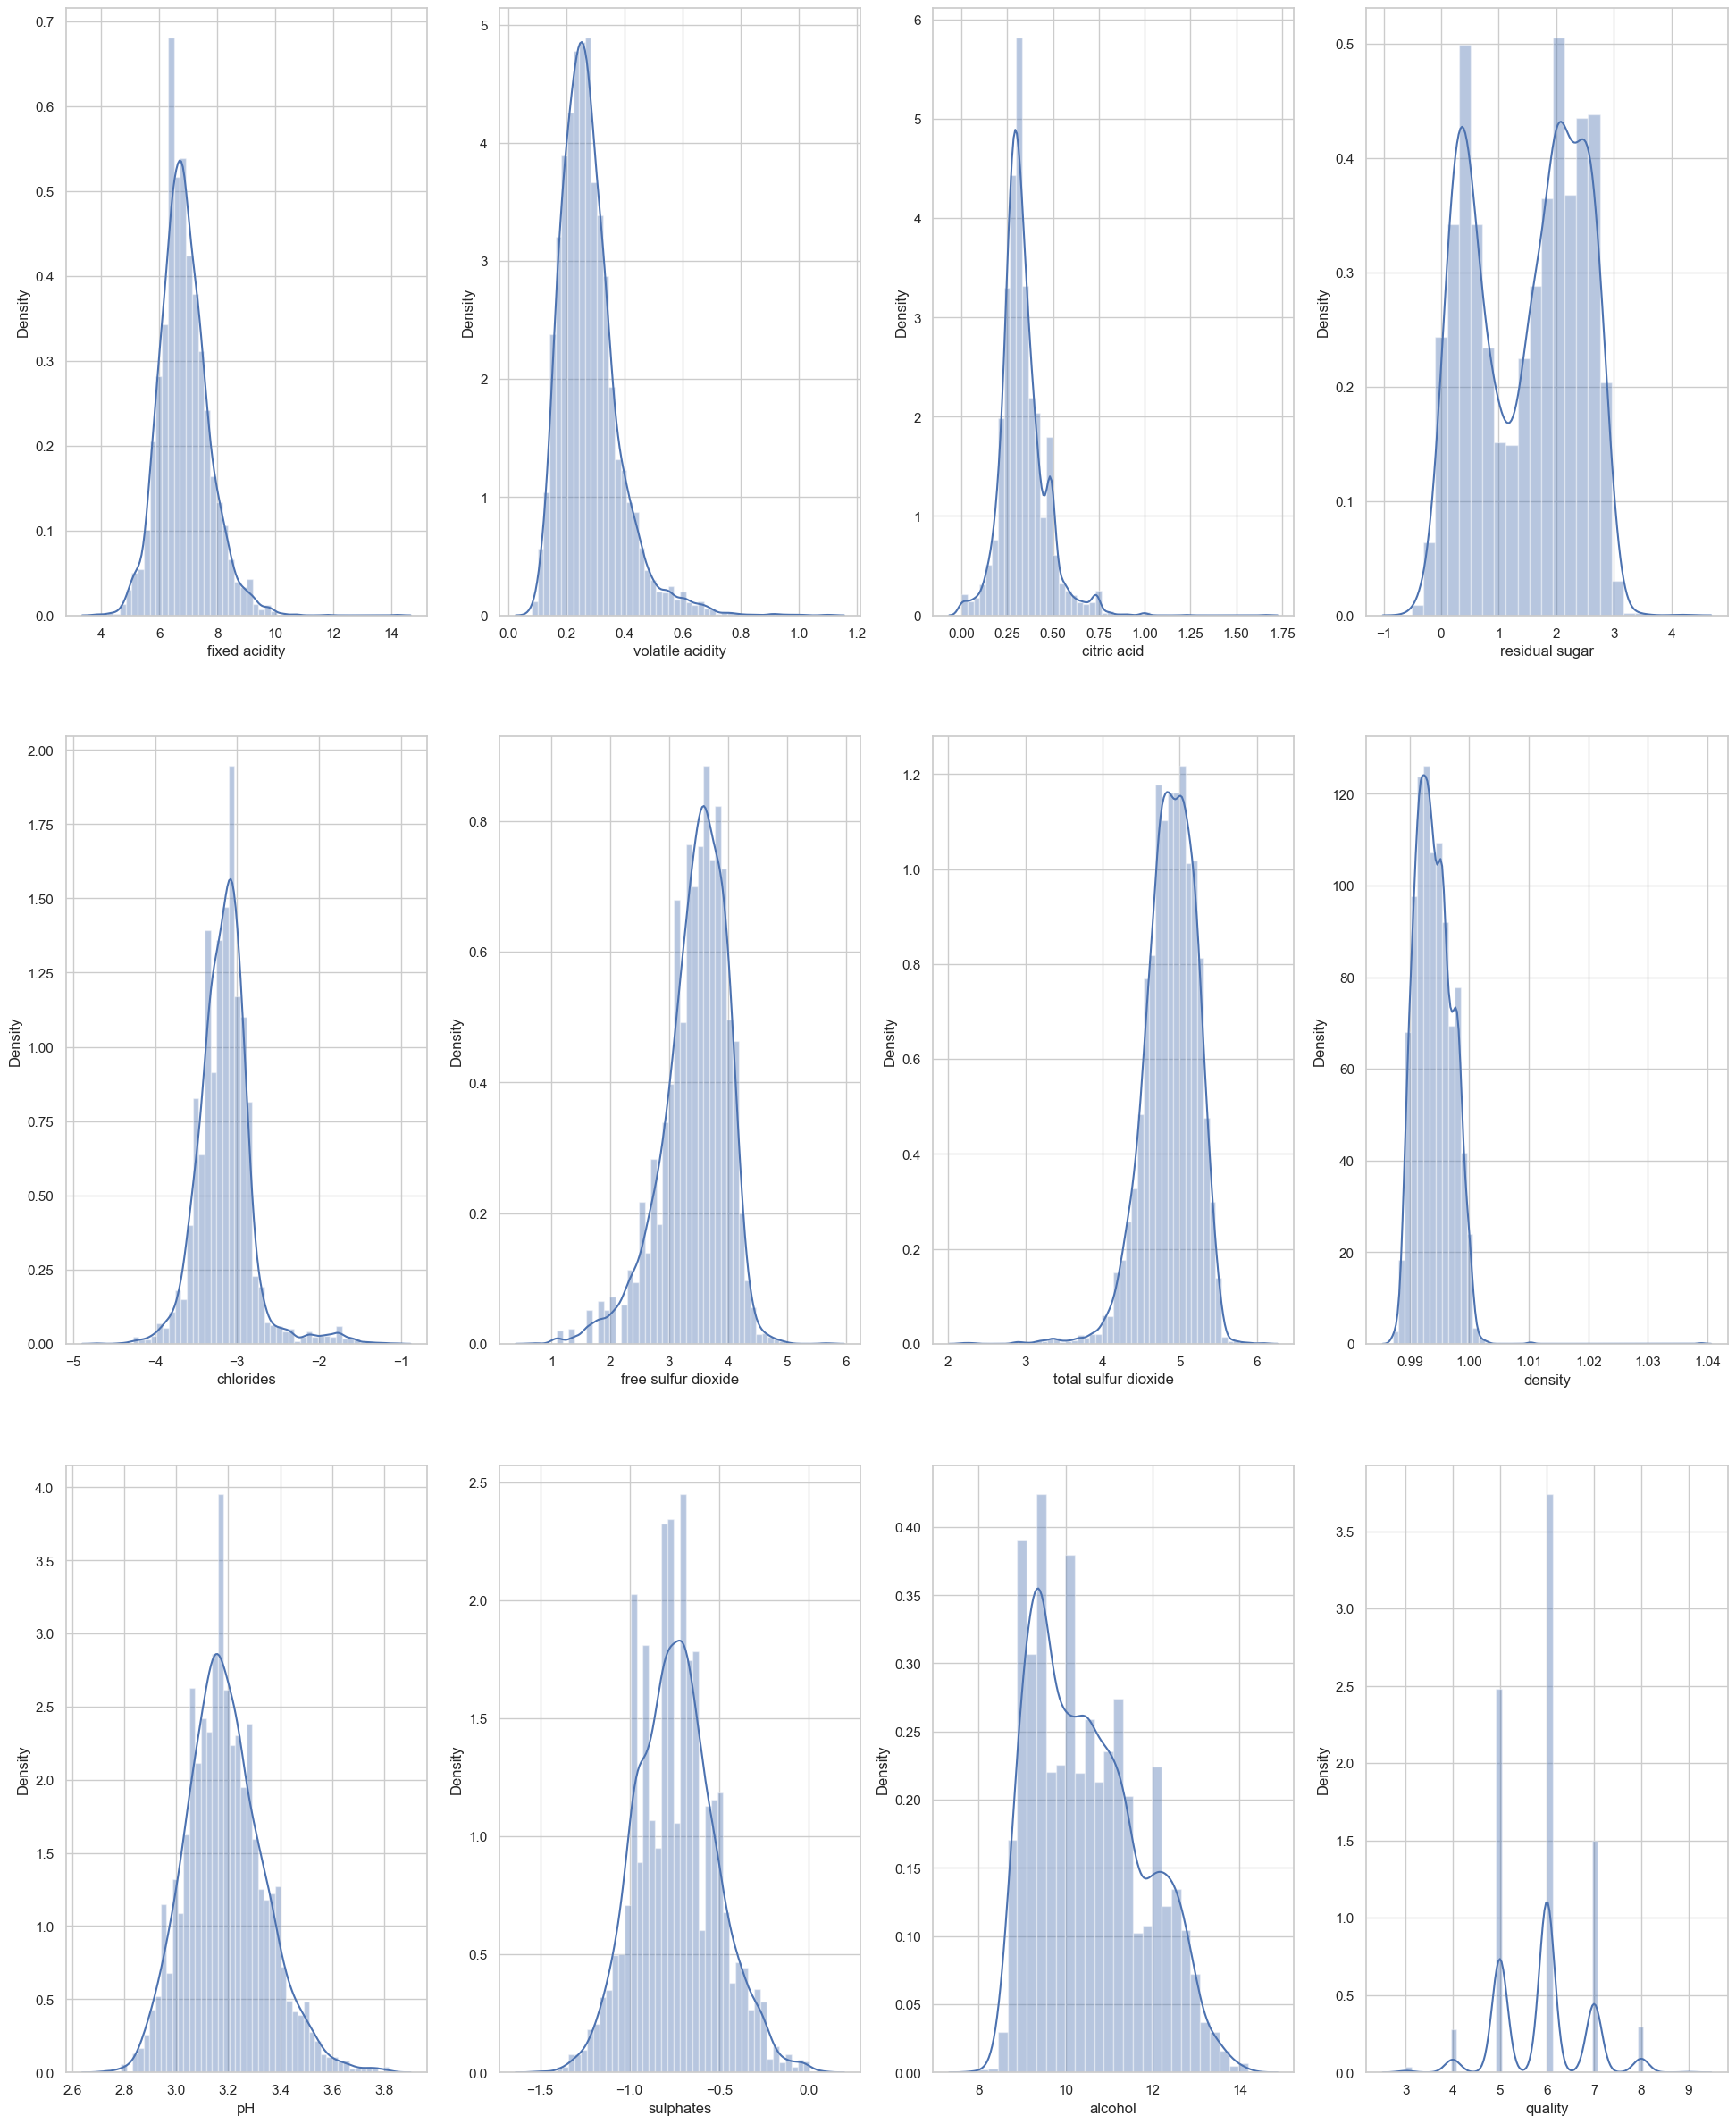

0       6
1       6
2       6
3       6
4       6
       ..
4893    6
4894    5
4895    6
4896    7
4897    6
Name: quality, Length: 4898, dtype: int64

In [723]:
logscalewhite = logtrans(whitewinedata)
logscalewhite['quality']=whitewinelabels

logscalered = logtrans(redwinedata)

color = sb.color_palette("pastel")

fig, ax1 = plt.subplots(3,4, figsize=(24,30))
k = 0
columns = list(logscalewhite.columns)
for i in range(3):
    for j in range(4):
            sb.distplot(logscalewhite[columns[k]], ax = ax1[i][j])
            k += 1
plt.show()

logscalewhite.pop('quality')

In [724]:
#Transform and scale our data and pull out labels

transredwinedata = redwinedataraw.copy()
transwhitewinedata = whitewinedataraw.copy()
whitewinelabels = transwhitewinedata.pop('quality')
redwinelabels = transredwinedata.pop('quality')

scaledred = pd.DataFrame(StandardScaler().fit_transform(transredwinedata), columns=transwhitewinedata.columns)
scaledwhite = pd.DataFrame(StandardScaler().fit_transform(transwhitewinedata), columns=transredwinedata.columns)


logscalereddata = logscalered.copy()
logscalewhitedata = logscalewhite.copy()
logscalereddf = pd.DataFrame(StandardScaler().fit_transform(logscalereddata), columns=logscalereddata.columns)
logscalewhitedf = pd.DataFrame(StandardScaler().fit_transform(logscalewhitedata), columns=logscalewhitedata.columns)

We'll be defining classes for each ML algorithm in the next couple sections:

1. Random Forest Classifier: https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html#sklearn.ensemble.RandomForestClassifier
2. Support Vector Machine
    1. Linear: https://scikit-learn.org/stable/modules/generated/sklearn.svm.LinearSVC.html#sklearn.svm.LinearSVC
    2. Classic: https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html#sklearn.svm.SVC
3. KNeighbor Classifier: https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html#sklearn.neighbors.KNeighborsClassifier
4. SGD Classifier: https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.SGDClassifier.html#sklearn.linear_model.SGDClassifier
5. Neural Network: https://scikit-learn.org/stable/modules/classes.html#module-sklearn.neural_network

In [725]:
#Set up initial classifications 
def classify(data,labels):
    data, labels = make_classification(n_features=11,n_classes = 7, random_state=0)

In [726]:
#Make an empty pandas dataframe in which to store model performance data:
performance_scores = pd.DataFrame(columns=['Model_Type',
                                           'Wine_Type', 
                                           'Training_Score', 
                                           'Test_Score',
                                           'Data_Scale'])

display(performance_scores)

Empty DataFrame
Columns: [Model_Type, Wine_Type, Training_Score, Test_Score, Data_Scale]
Index: []

In [727]:
#Define a standard function for ML training using a Linear SVM
#Unless otherwise indicated, we stick with default hyperparameters from sklearn
def rfc(data,labels,winetype,scale):
    X_train, X_test, y_train, y_test = train_test_split(data, labels, train_size=.8, shuffle=True, random_state=0)
    X_train.shape, X_test.shape
    rfc = RandomForestClassifier()
    rfc.fit(X_train, y_train)
    
    trainpred = rfc.predict(X_train)
    testpred = rfc.predict(X_test)
    
    trainacc = accuracy_score(trainpred, y_train)
    testacc = accuracy_score(testpred, y_test)
    #import scoring into dataframe
    performance_scores.loc[len(performance_scores)] = ['Random Forest', winetype, trainacc, testacc, scale]
         
    print("Accuracy of Random Forest", winetype, "training is: ", trainacc)
    print("Accuracy of Random Forest on", winetype, "test data is: ", testacc)

    winematrix = cm(y_test, testpred)
    labels = np.unique(np.concatenate((y_test,testpred),0))
    
    disp=showMatrix(winematrix, display_labels=labels)
    disp.plot()
    plt.grid(False)
    plt.show()
    
    return testacc

In [728]:
#Define a standard function for ML training using a Linear SVM
#Unless otherwise indicated, we stick with default hyperparameters from sklearn
def lin_svc(data,labels,winetype,scale):
    X_train, X_test, y_train, y_test = train_test_split(data, labels, train_size=.8, shuffle=True, random_state=0)
    X_train.shape, X_test.shape
    l_svc = LinearSVC(penalty='l2', dual=False, random_state=0, tol=1e-4, C=100, multi_class="ovr")
    l_svc.fit(X_train, y_train)
    
    trainpred = l_svc.predict(X_train)
    testpred = l_svc.predict(X_test)
    
    trainacc = accuracy_score(trainpred, y_train)
    testacc = accuracy_score(testpred, y_test)
    
    #import scoring into dataframe
    performance_scores.loc[len(performance_scores)] = ['Linear SVC', winetype, trainacc, testacc,scale]
         
    print("Accuracy of Linear SVC", winetype, "training is: ", trainacc)
    print("Accuracy of Linear SVC on", winetype, "test data is: ", testacc)

    winematrix = cm(y_test, testpred)
    labels = np.unique(np.concatenate((y_test,testpred),0))
    
    disp=showMatrix(winematrix, display_labels=labels)
    disp.plot()
    plt.grid(False)
    plt.show()
    
    return testacc
    

In [729]:
#Define a standard function for ML training using a Polynomial SVM
#Unless otherwise indicated, we stick with default hyperparameters from sklearn
def svmsvc(data,labels,winetype,scale):
    X_train, X_test, y_train, y_test = train_test_split(data, labels, train_size=.8, shuffle=True, random_state=0)
    X_train.shape, X_test.shape
    svmsvc = SVC(C=10, kernel='poly')
    svmsvc.fit(X_train, y_train)
    
    trainpred = svmsvc.predict(X_train)
    testpred = svmsvc.predict(X_test)
    
    trainacc = accuracy_score(trainpred, y_train)
    testacc = accuracy_score(testpred, y_test)

    #import scoring into dataframe
    performance_scores.loc[len(performance_scores)] = ['Polynomial SVC', winetype, trainacc, testacc,scale]
    
    print("Accuracy of Polynomial SVC", winetype, "training is:", trainacc)
    print("Accuracy of Polynomial SVC on", winetype, "test data is:", testacc)

    winematrix = cm(y_test, testpred)
    labels = np.unique(np.concatenate((y_test,testpred),0))
    
    disp=showMatrix(winematrix, display_labels=labels)
    disp.plot()
    plt.grid(False)
    plt.show()
    
    return testacc

In [730]:
#Define a standard function for ML training using a K-Nearest Neighbor Model
#Unless otherwise indicated, we stick with default hyperparameters from sklearn
def knn(data,labels,winetype,scale):
    X_train, X_test, y_train, y_test = train_test_split(data, labels, train_size=.8, shuffle=True, random_state=0)
    X_train.shape, X_test.shape
    kneighbor = KNeighborsClassifier(n_neighbors=10, weights='distance') #Default knn = 5
    kneighbor.fit(X_train, y_train)
    
    trainpred = kneighbor.predict(X_train)
    testpred = kneighbor.predict(X_test)
    
    trainacc = accuracy_score(trainpred, y_train)
    testacc = accuracy_score(testpred, y_test)
    
    #import scoring into dataframe
    performance_scores.loc[len(performance_scores)] = ['K-Nearest Neighbor', winetype, trainacc, testacc,scale]
    
    print("Accuracy of KNN on", winetype, "training is:", trainacc)
    print("Accuracy of KNN on", winetype, "test data is:", testacc)

    winematrix = cm(y_test, testpred)
    labels = np.unique(np.concatenate((y_test,testpred),0))
    
    disp=showMatrix(winematrix, display_labels=labels)
    disp.plot()
    plt.grid(False)
    plt.show()
    
    return testacc

In [731]:
#Define a standard function for ML training using a Stochastic Gradient Descent Classifier
#Unless otherwise indicated, we stick with default hyperparameters from sklearn
def sgd(data,labels,winetype,scale):
    X_train, X_test, y_train, y_test = train_test_split(data, labels, train_size=.8, shuffle=True, random_state=0)
    X_train.shape, X_test.shape
    sgdclass = SGDClassifier(loss='log_loss') 
    sgdclass.fit(X_train, y_train)
    
    trainpred = sgdclass.predict(X_train)
    testpred = sgdclass.predict(X_test)
    
    trainacc = accuracy_score(trainpred, y_train)
    testacc = accuracy_score(testpred, y_test)
    
    #import scoring into dataframe
    performance_scores.loc[len(performance_scores)] = ['SGD Classifier', winetype, trainacc, testacc,scale]
    
    print("Accuracy SGD Classifier on", winetype, "training is:", trainacc)
    print("Accuracy of SGD Classifier on", winetype, "test data is:", testacc)

    winematrix = cm(y_test, testpred)
    labels = np.unique(np.concatenate((y_test,testpred),0))
    
    disp=showMatrix(winematrix, display_labels=labels)
    disp.plot()
    plt.grid(False)
    plt.show()
    
    return testacc

In [732]:
#Define a standard function for ML training using a Multilayer Perceptron Classifier
#Unless otherwise indicated, we stick with default hyperparameters from sklearn
def mlp(data,labels,winetype,scale):
    X_train, X_test, y_train, y_test = train_test_split(data, labels, train_size=.8, shuffle=True, random_state=0)
    X_train.shape, X_test.shape
    mlpc = MLPClassifier(learning_rate='adaptive', max_iter=1000, early_stopping=True) 
    mlpc.fit(X_train, y_train)
    trainpred = mlpc.predict(X_train)
    testpred = mlpc.predict(X_test)
    
    trainacc = accuracy_score(trainpred, y_train)
    testacc = accuracy_score(testpred, y_test)
    
    #import scoring into dataframe
    performance_scores.loc[len(performance_scores)] = ['MultiLayer Perceptron', winetype, trainacc, testacc,scale]
    
    print("Accuracy MLP NN Classifier on", winetype, "training is:", trainacc)
    print("Accuracy of MLP NN Classifier on", winetype, "test data is:", testacc)

    winematrix = cm(y_test, testpred)
    labels = np.unique(np.concatenate((y_test,testpred),0))
    
    disp=showMatrix(winematrix, display_labels=labels)
    disp.plot()
    plt.grid(False)
    plt.show()
    
    return testacc

Accuracy of Random Forest white training is:  1.0
Accuracy of Random Forest on white test data is:  0.6510204081632653


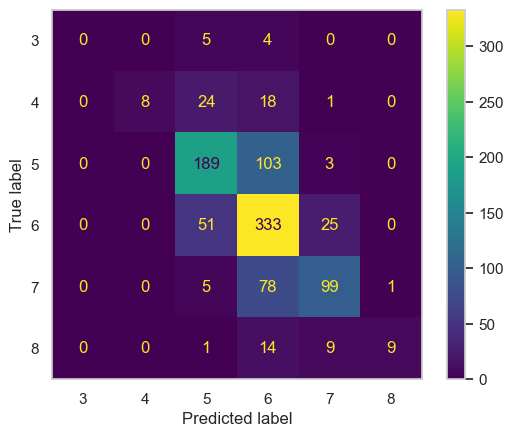

Accuracy of Random Forest white training is:  1.0
Accuracy of Random Forest on white test data is:  0.6489795918367347


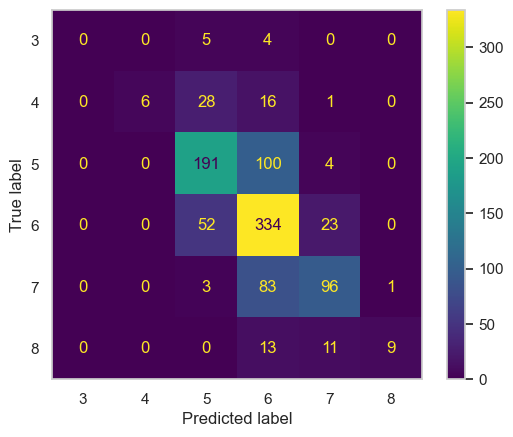

Accuracy of Random Forest white training is:  1.0
Accuracy of Random Forest on white test data is:  0.6520408163265307


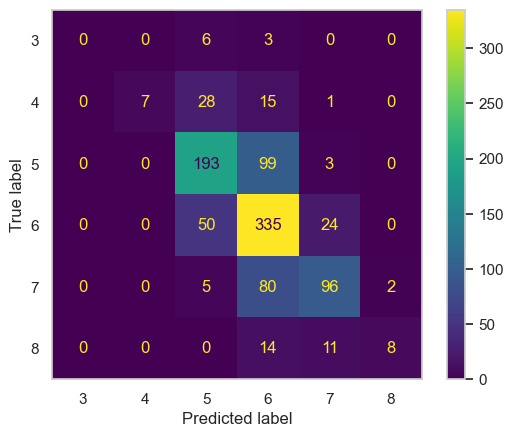

Accuracy of Random Forest white training is:  1.0
Accuracy of Random Forest on white test data is:  0.6561224489795918


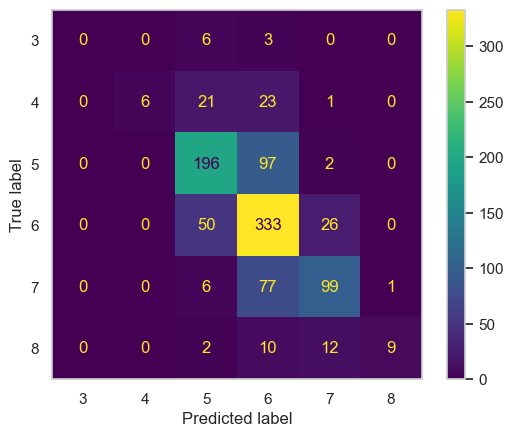

Accuracy of Random Forest white training is:  1.0
Accuracy of Random Forest on white test data is:  0.65


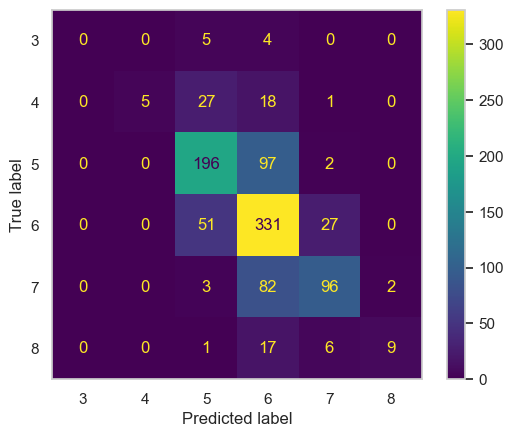

Accuracy of Random Forest white training is:  1.0
Accuracy of Random Forest on white test data is:  0.6551020408163265


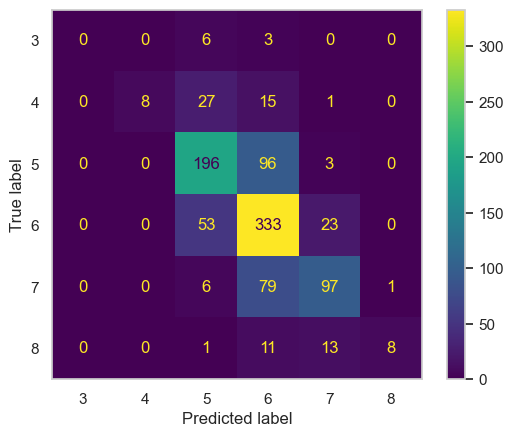

Accuracy of Random Forest white training is:  1.0
Accuracy of Random Forest on white test data is:  0.6571428571428571


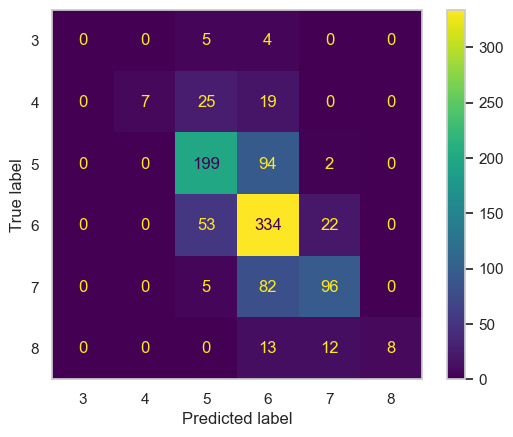

Accuracy of Random Forest white training is:  1.0
Accuracy of Random Forest on white test data is:  0.6551020408163265


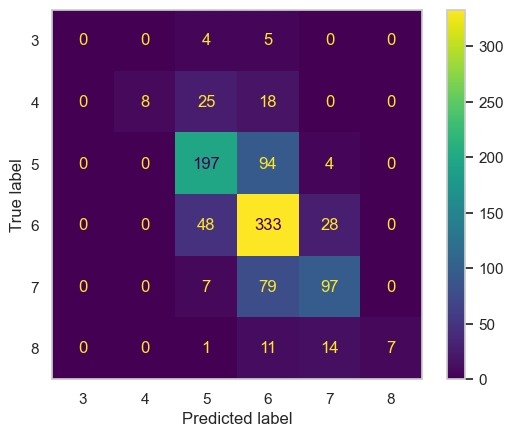

Accuracy of Random Forest white training is:  1.0
Accuracy of Random Forest on white test data is:  0.6612244897959184


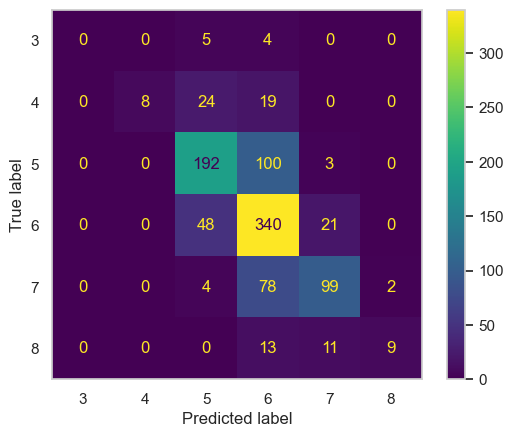

Accuracy of Random Forest white training is:  1.0
Accuracy of Random Forest on white test data is:  0.6551020408163265


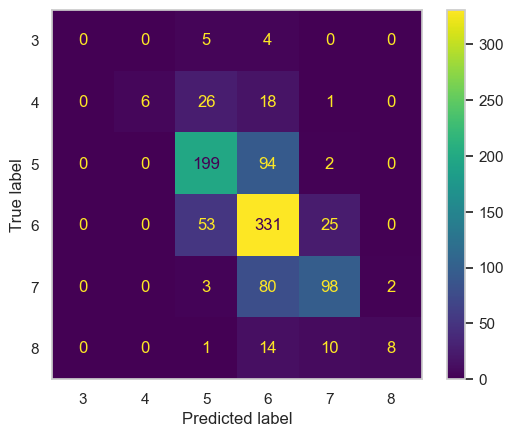

Accuracy of Random Forest white training is:  1.0
Accuracy of Random Forest on white test data is:  0.65


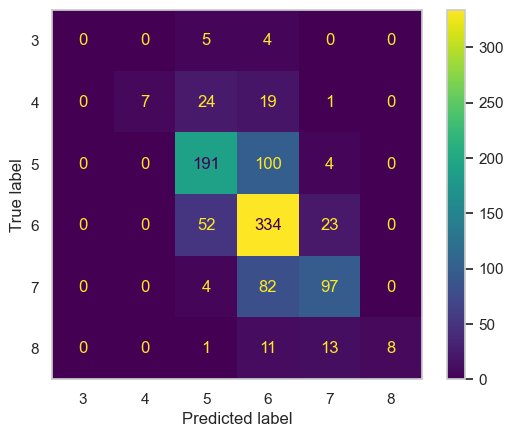

Accuracy of Random Forest white training is:  1.0
Accuracy of Random Forest on white test data is:  0.6591836734693878


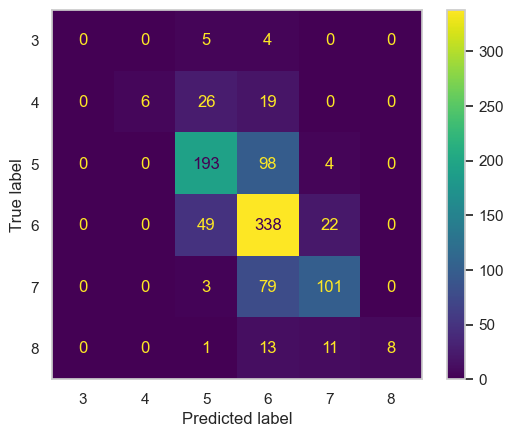

Accuracy of Random Forest white training is:  1.0
Accuracy of Random Forest on white test data is:  0.6459183673469387


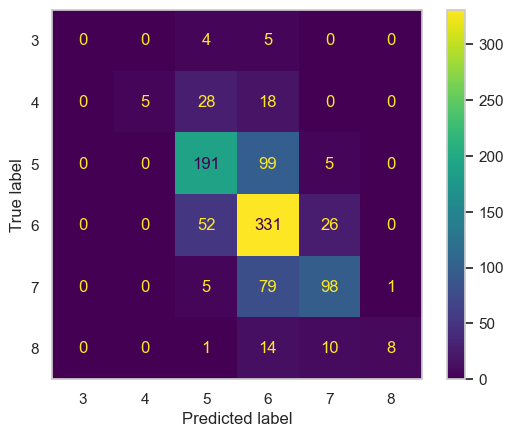

Accuracy of Random Forest white training is:  0.9997447677386422
Accuracy of Random Forest on white test data is:  0.6551020408163265


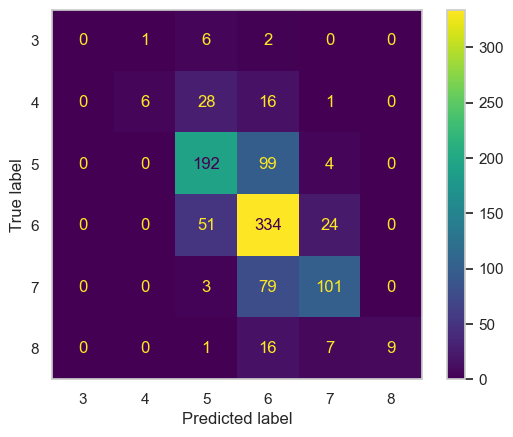

Accuracy of Random Forest white training is:  1.0
Accuracy of Random Forest on white test data is:  0.6602040816326531


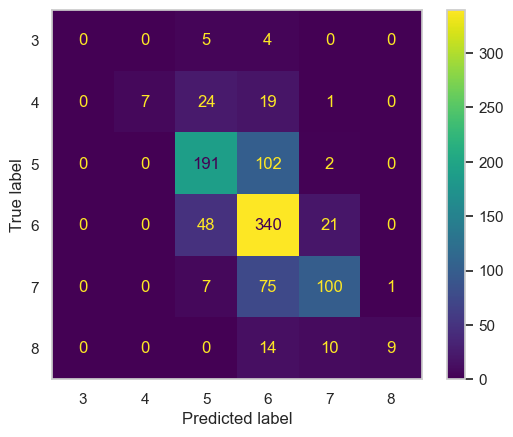

Accuracy of Random Forest white training is:  1.0
Accuracy of Random Forest on white test data is:  0.6510204081632653


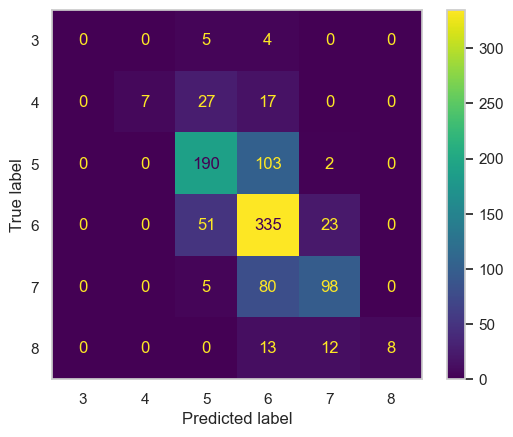

Accuracy of Random Forest white training is:  1.0
Accuracy of Random Forest on white test data is:  0.6489795918367347


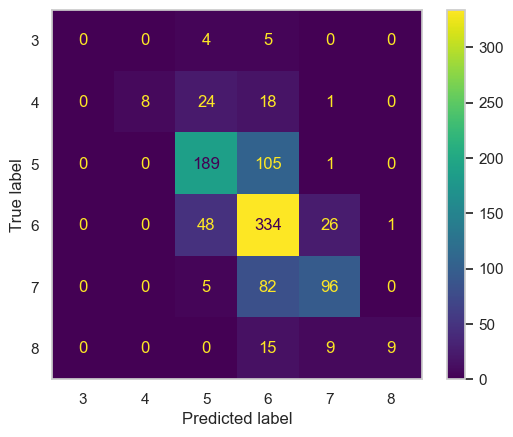

Accuracy of Random Forest white training is:  1.0
Accuracy of Random Forest on white test data is:  0.6612244897959184


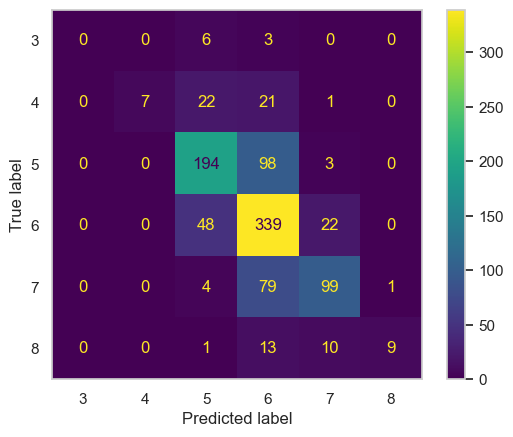

Accuracy of Random Forest white training is:  1.0
Accuracy of Random Forest on white test data is:  0.65


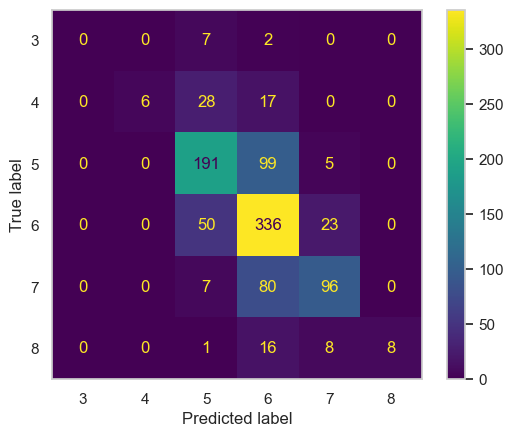

Accuracy of Random Forest white training is:  1.0
Accuracy of Random Forest on white test data is:  0.6489795918367347


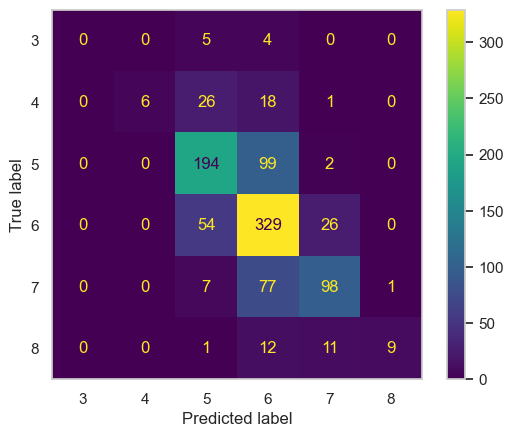

In [733]:
for i in range(5): 
    rfc(whitewinedata, whitewinelabels, "white", "none")
for i in range(5): 
    rfc(scaledwhite, whitewinelabels, "white", "standard")
for i in range(5): 
    rfc(logscalewhite, whitewinelabels, "white", "log")
for i in range(5): 
    rfc(logscalewhitedf, whitewinelabels, "white", "logstd")


Accuracy of Random Forest red training is:  1.0
Accuracy of Random Forest on red test data is:  0.734375


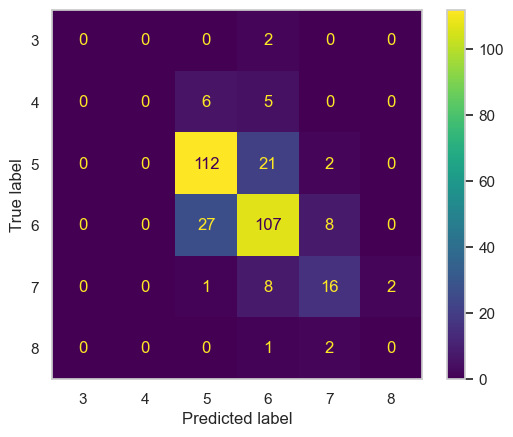

Accuracy of Random Forest red training is:  1.0
Accuracy of Random Forest on red test data is:  0.715625


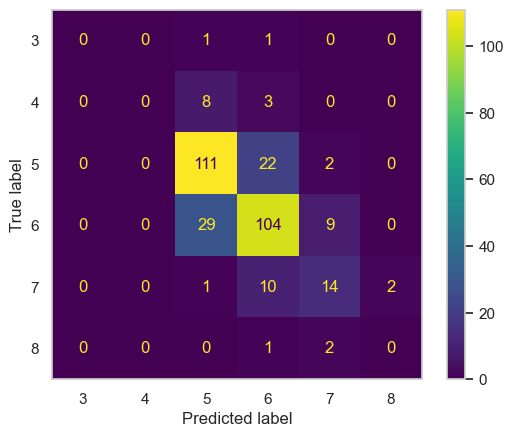

Accuracy of Random Forest red training is:  1.0
Accuracy of Random Forest on red test data is:  0.721875


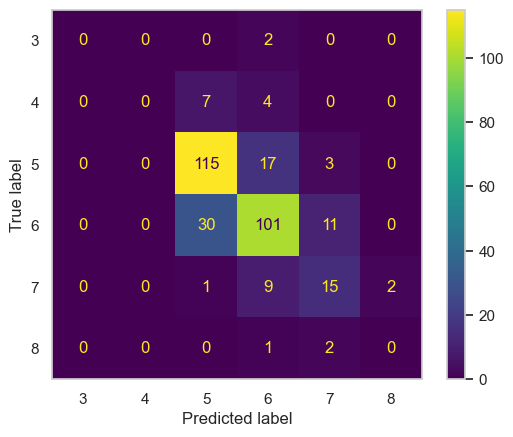

Accuracy of Random Forest red training is:  1.0
Accuracy of Random Forest on red test data is:  0.721875


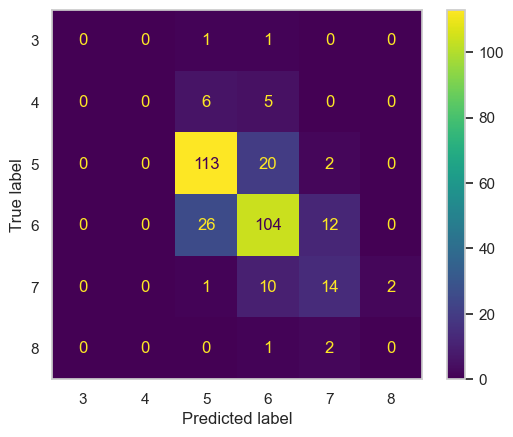

Accuracy of Random Forest red training is:  1.0
Accuracy of Random Forest on red test data is:  0.728125


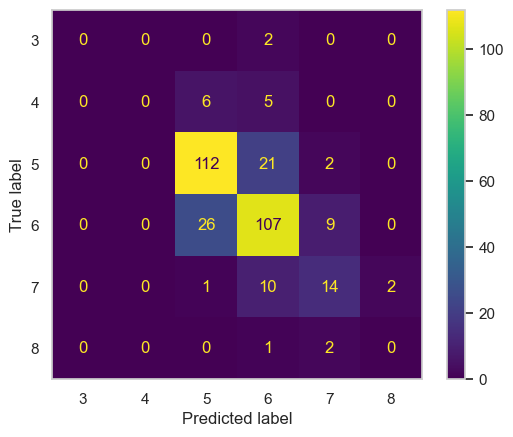

Accuracy of Random Forest red training is:  1.0
Accuracy of Random Forest on red test data is:  0.73125


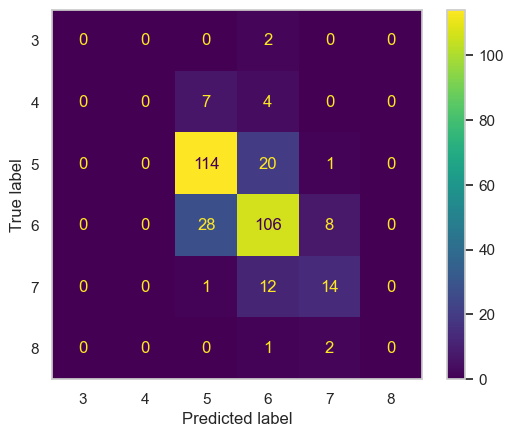

Accuracy of Random Forest red training is:  1.0
Accuracy of Random Forest on red test data is:  0.703125


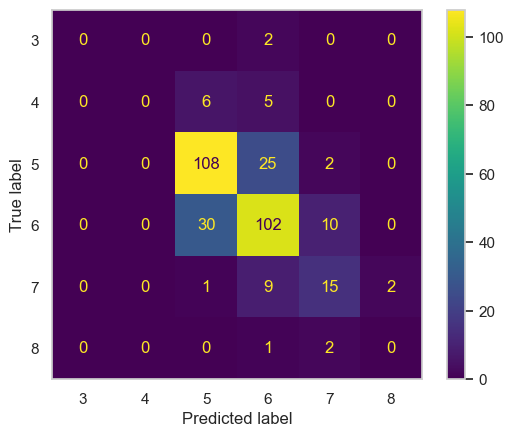

Accuracy of Random Forest red training is:  1.0
Accuracy of Random Forest on red test data is:  0.71875


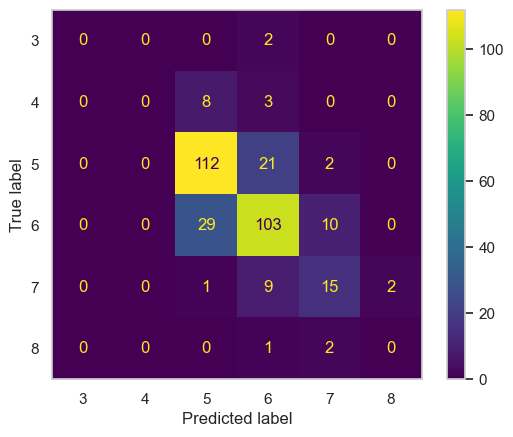

Accuracy of Random Forest red training is:  1.0
Accuracy of Random Forest on red test data is:  0.71875


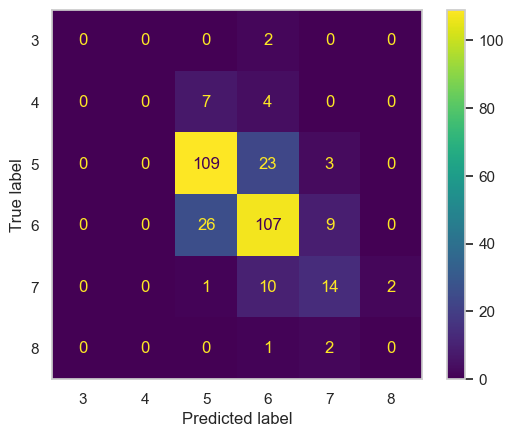

Accuracy of Random Forest red training is:  1.0
Accuracy of Random Forest on red test data is:  0.70625


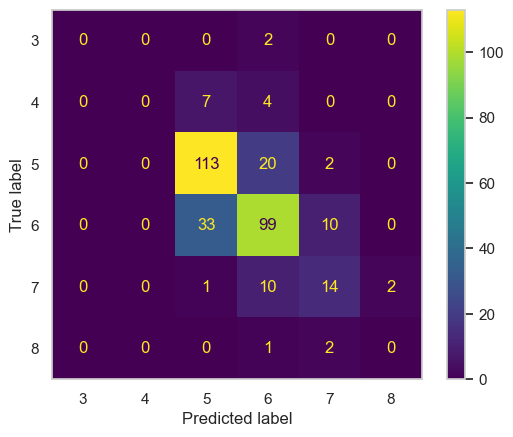

Accuracy of Random Forest red training is:  1.0
Accuracy of Random Forest on red test data is:  0.721875


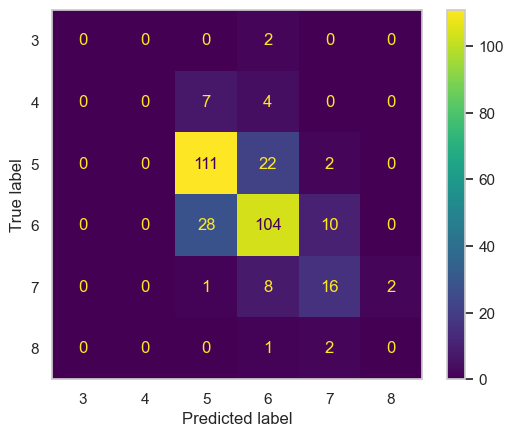

Accuracy of Random Forest red training is:  1.0
Accuracy of Random Forest on red test data is:  0.7125


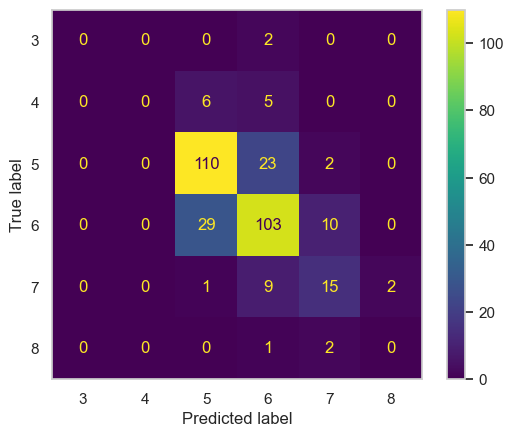

Accuracy of Random Forest red training is:  1.0
Accuracy of Random Forest on red test data is:  0.71875


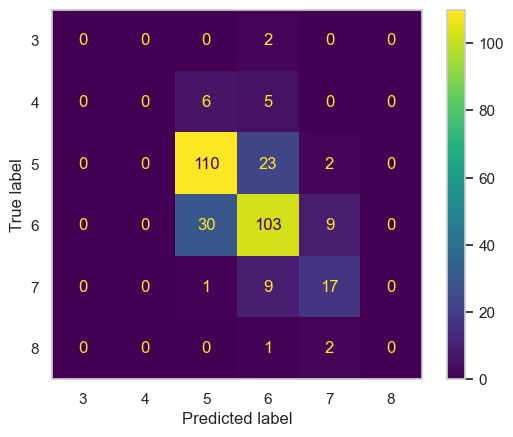

Accuracy of Random Forest red training is:  1.0
Accuracy of Random Forest on red test data is:  0.7125


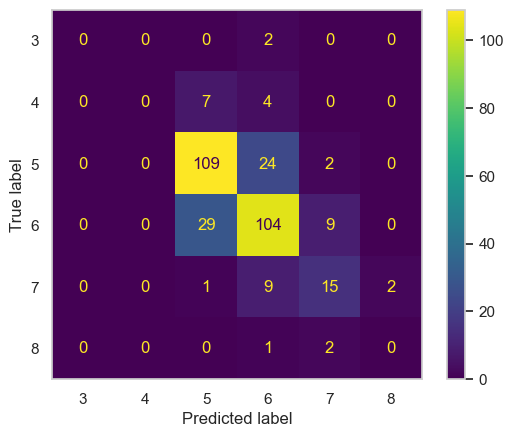

Accuracy of Random Forest red training is:  1.0
Accuracy of Random Forest on red test data is:  0.734375


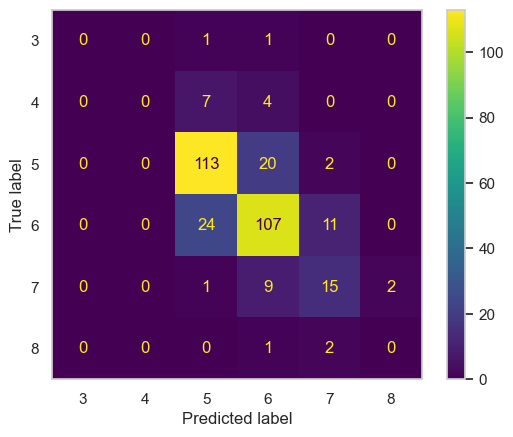

Accuracy of Random Forest red training is:  1.0
Accuracy of Random Forest on red test data is:  0.71875


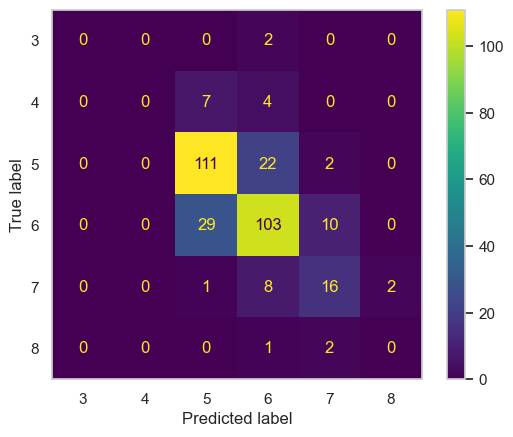

Accuracy of Random Forest red training is:  1.0
Accuracy of Random Forest on red test data is:  0.725


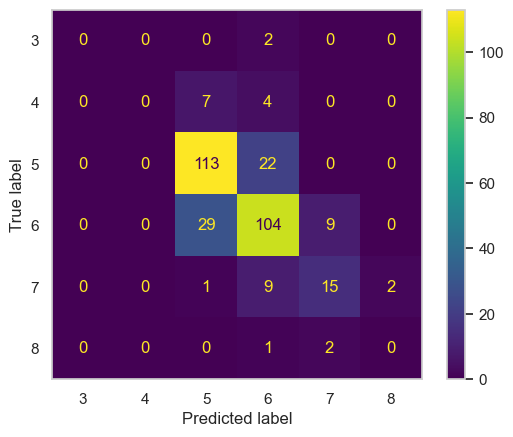

Accuracy of Random Forest red training is:  1.0
Accuracy of Random Forest on red test data is:  0.715625


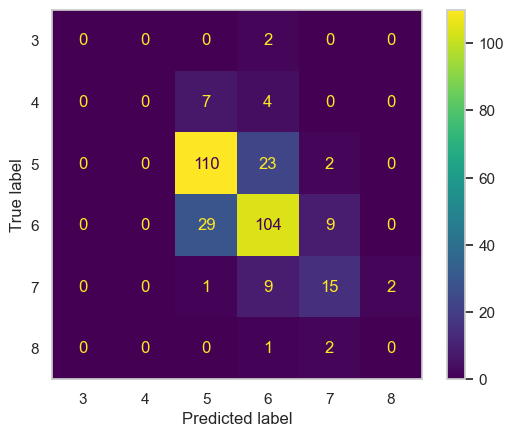

Accuracy of Random Forest red training is:  1.0
Accuracy of Random Forest on red test data is:  0.703125


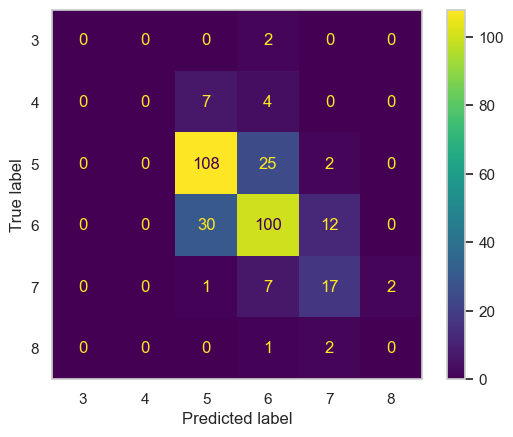

Accuracy of Random Forest red training is:  1.0
Accuracy of Random Forest on red test data is:  0.7375


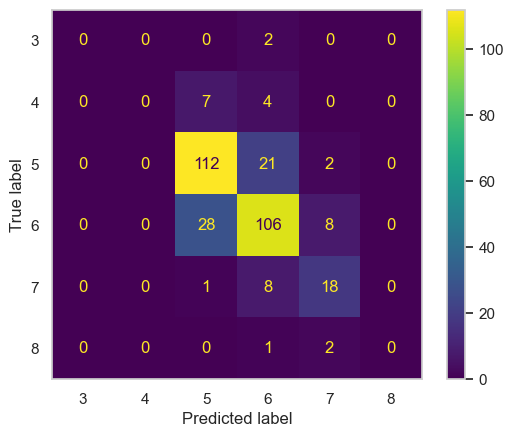

In [734]:
for i in range(5):
    rfc(redwinedata, redwinelabels, "red", "none")
for i in range(5): 
    rfc(scaledred, redwinelabels, "red", "standard")
for i in range(5): 
    rfc(logscalered, redwinelabels, "red", "log")
for i in range(5): 
    rfc(logscalereddf, redwinelabels, "red", "logstd")

Accuracy of Linear SVC white training is:  0.5380296069423175
Accuracy of Linear SVC on white test data is:  0.49183673469387756


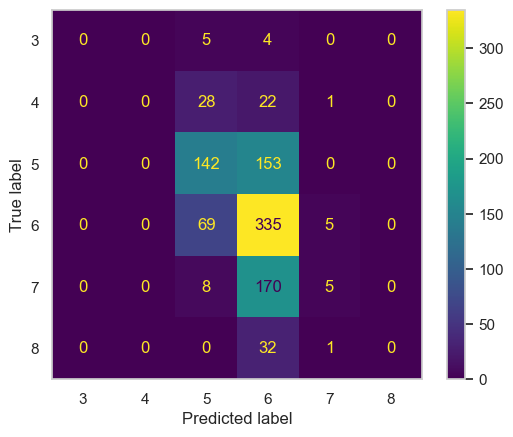

Accuracy of Linear SVC white training is:  0.5380296069423175
Accuracy of Linear SVC on white test data is:  0.49183673469387756


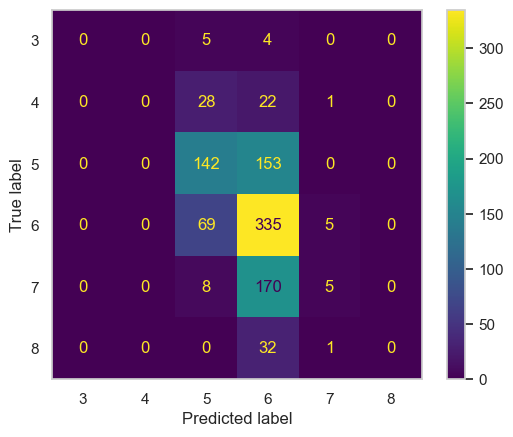

Accuracy of Linear SVC white training is:  0.5380296069423175
Accuracy of Linear SVC on white test data is:  0.49183673469387756


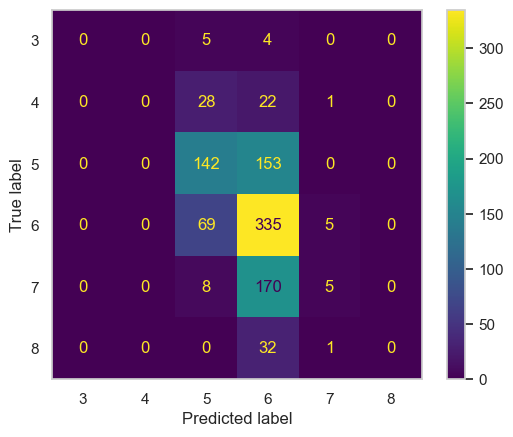

Accuracy of Linear SVC white training is:  0.5380296069423175
Accuracy of Linear SVC on white test data is:  0.49183673469387756


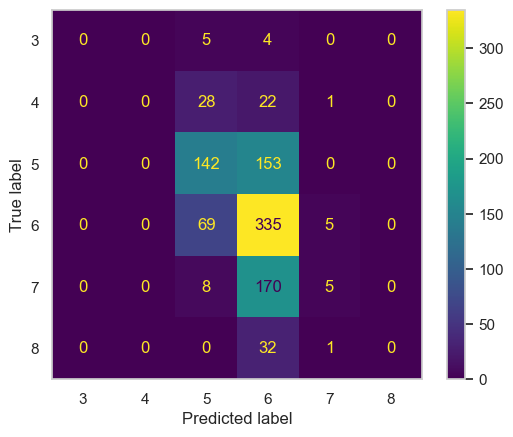

Accuracy of Linear SVC white training is:  0.5380296069423175
Accuracy of Linear SVC on white test data is:  0.49183673469387756


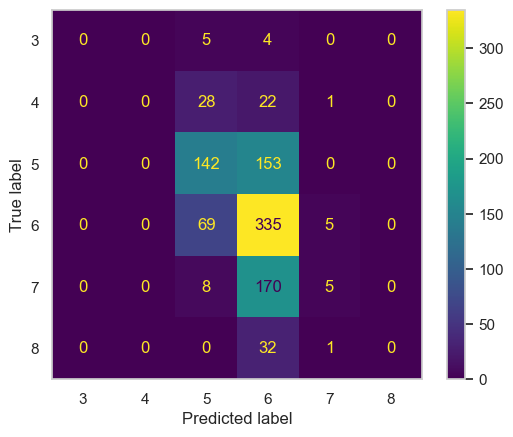

Accuracy of Linear SVC white training is:  0.537263910158244
Accuracy of Linear SVC on white test data is:  0.49387755102040815


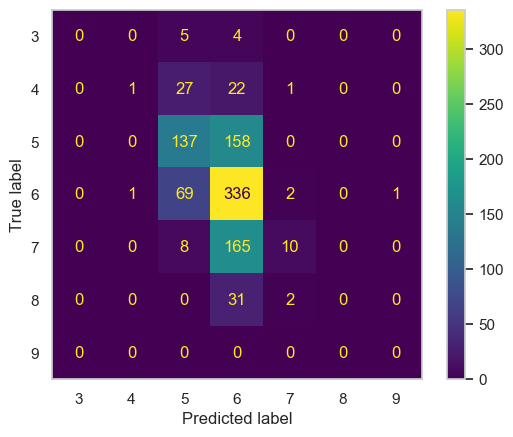

Accuracy of Linear SVC white training is:  0.537263910158244
Accuracy of Linear SVC on white test data is:  0.49387755102040815


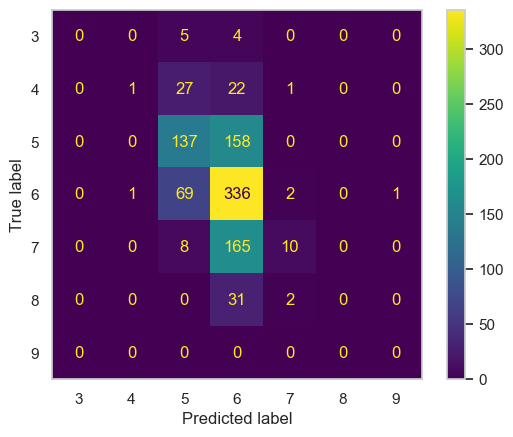

Accuracy of Linear SVC white training is:  0.537263910158244
Accuracy of Linear SVC on white test data is:  0.49387755102040815


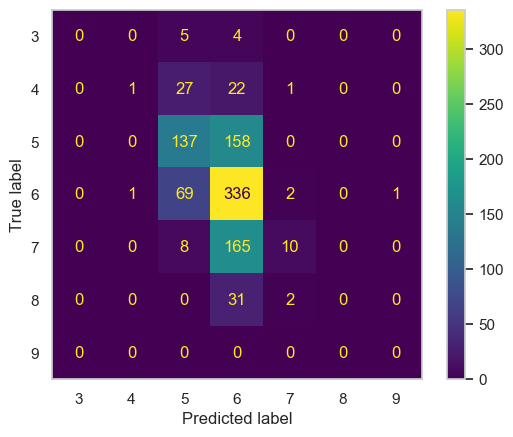

Accuracy of Linear SVC white training is:  0.537263910158244
Accuracy of Linear SVC on white test data is:  0.49387755102040815


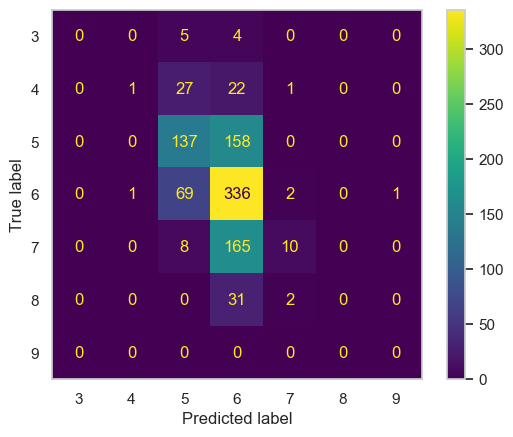

Accuracy of Linear SVC white training is:  0.537263910158244
Accuracy of Linear SVC on white test data is:  0.49387755102040815


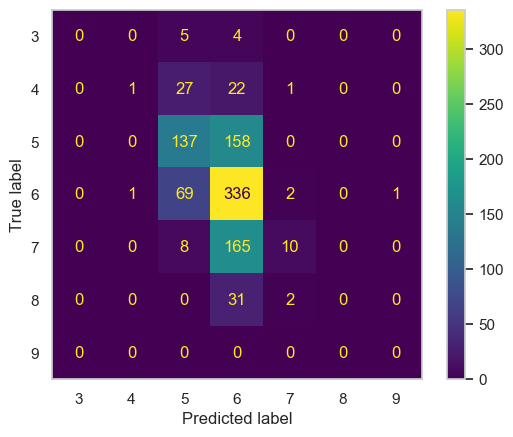

Accuracy of Linear SVC white training is:  0.5349668198060235
Accuracy of Linear SVC on white test data is:  0.49387755102040815


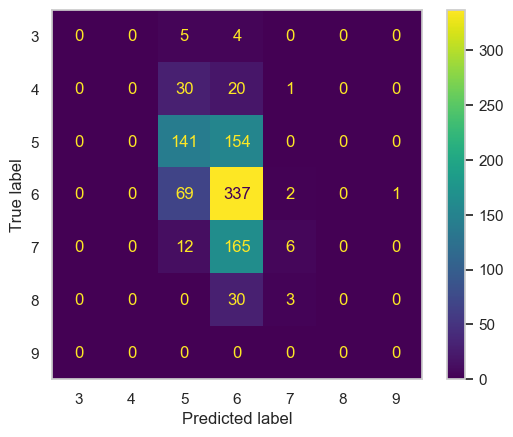

Accuracy of Linear SVC white training is:  0.5349668198060235
Accuracy of Linear SVC on white test data is:  0.49387755102040815


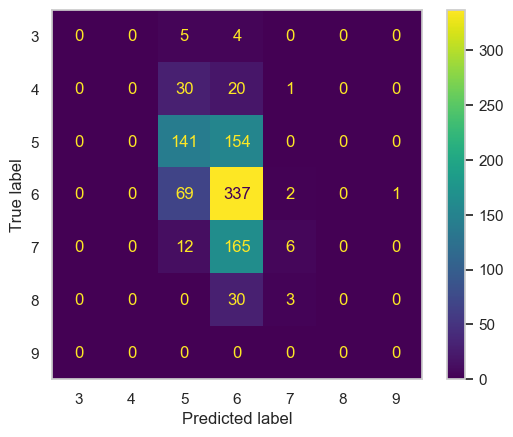

Accuracy of Linear SVC white training is:  0.5349668198060235
Accuracy of Linear SVC on white test data is:  0.49387755102040815


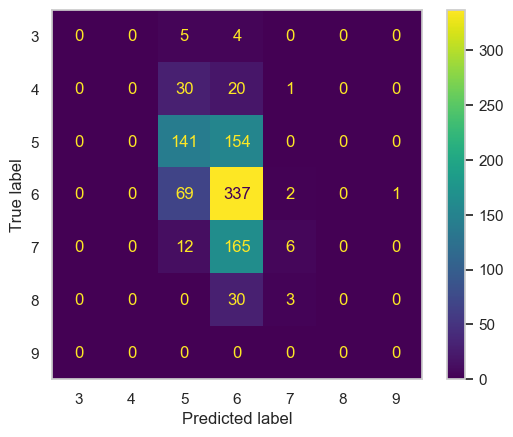

Accuracy of Linear SVC white training is:  0.5349668198060235
Accuracy of Linear SVC on white test data is:  0.49387755102040815


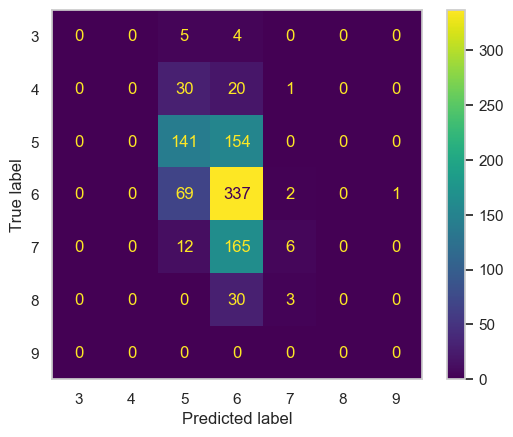

Accuracy of Linear SVC white training is:  0.5349668198060235
Accuracy of Linear SVC on white test data is:  0.49387755102040815


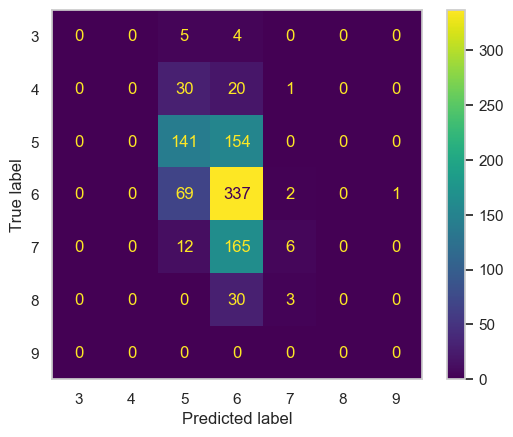

Accuracy of Linear SVC white training is:  0.535732516590097
Accuracy of Linear SVC on white test data is:  0.49489795918367346


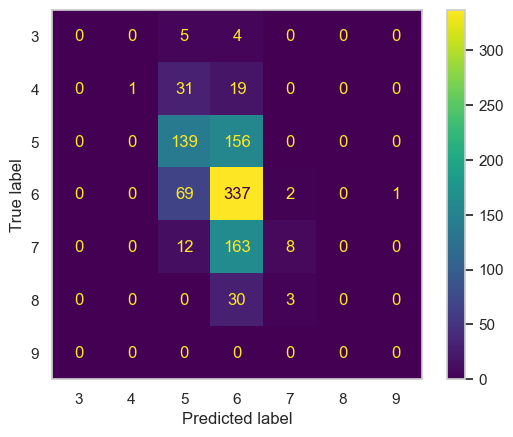

Accuracy of Linear SVC white training is:  0.535732516590097
Accuracy of Linear SVC on white test data is:  0.49489795918367346


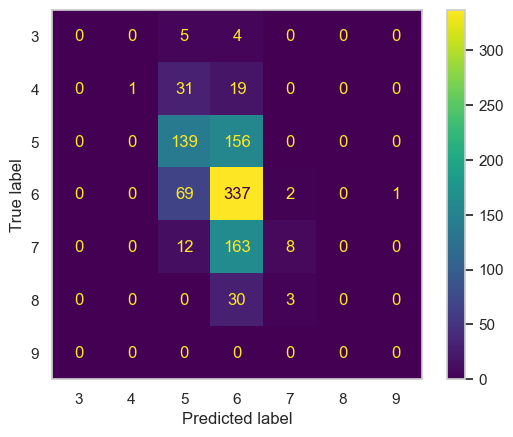

Accuracy of Linear SVC white training is:  0.535732516590097
Accuracy of Linear SVC on white test data is:  0.49489795918367346


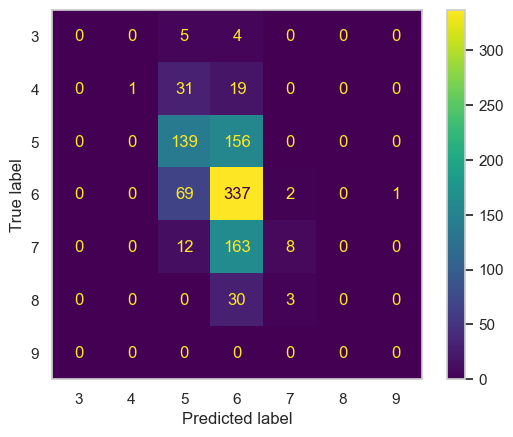

Accuracy of Linear SVC white training is:  0.535732516590097
Accuracy of Linear SVC on white test data is:  0.49489795918367346


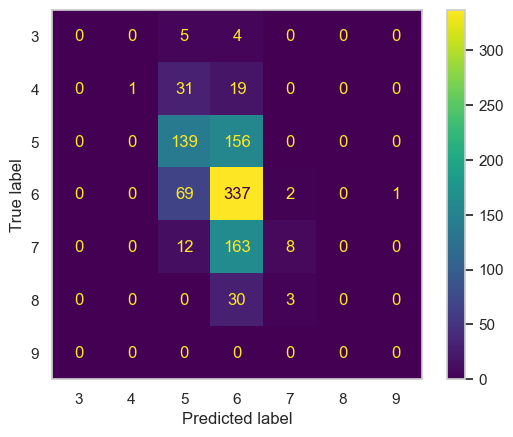

Accuracy of Linear SVC white training is:  0.535732516590097
Accuracy of Linear SVC on white test data is:  0.49489795918367346


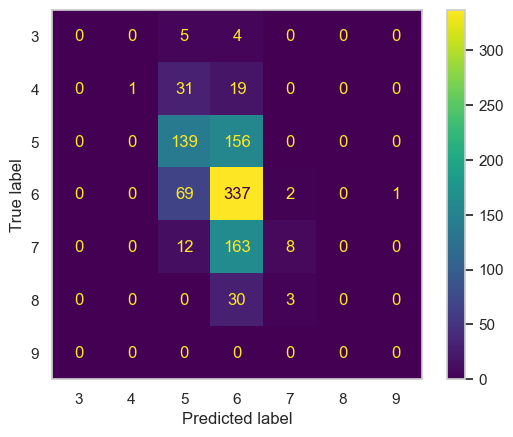

In [735]:
for i in range(5): 
    lin_svc(whitewinedata, whitewinelabels, "white", "none")
for i in range(5): 
    lin_svc(scaledwhite, whitewinelabels, "white", "standard")
for i in range(5): 
    lin_svc(logscalewhite, whitewinelabels, "white", "log")
for i in range(5): 
    lin_svc(logscalewhitedf, whitewinelabels, "white", "logstd")

Accuracy of Linear SVC red training is:  0.5801407349491791
Accuracy of Linear SVC on red test data is:  0.628125


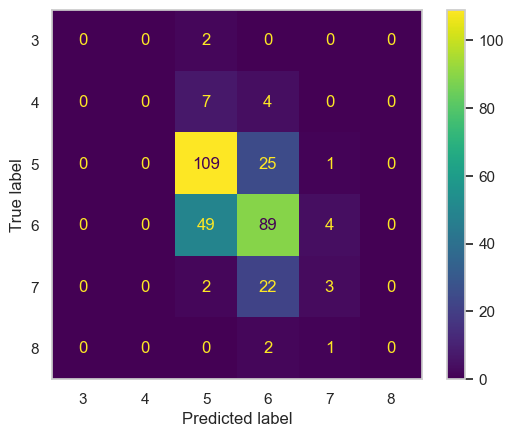

Accuracy of Linear SVC red training is:  0.5801407349491791
Accuracy of Linear SVC on red test data is:  0.628125


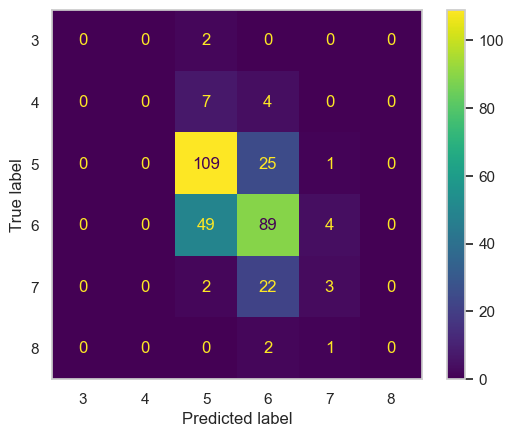

Accuracy of Linear SVC red training is:  0.5801407349491791
Accuracy of Linear SVC on red test data is:  0.628125


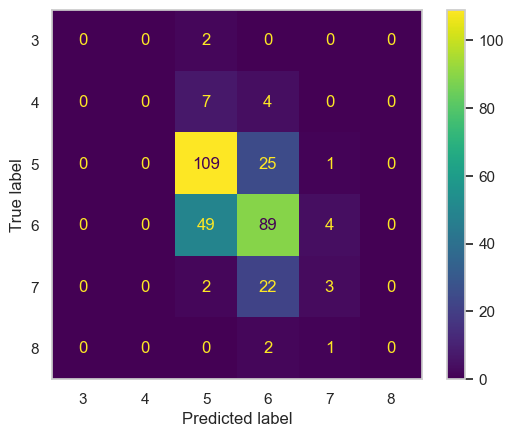

Accuracy of Linear SVC red training is:  0.5801407349491791
Accuracy of Linear SVC on red test data is:  0.628125


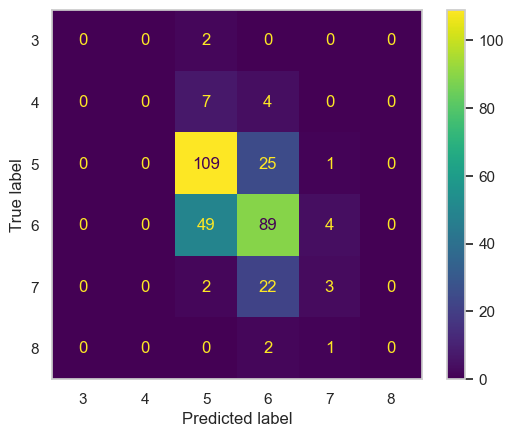

Accuracy of Linear SVC red training is:  0.5801407349491791
Accuracy of Linear SVC on red test data is:  0.628125


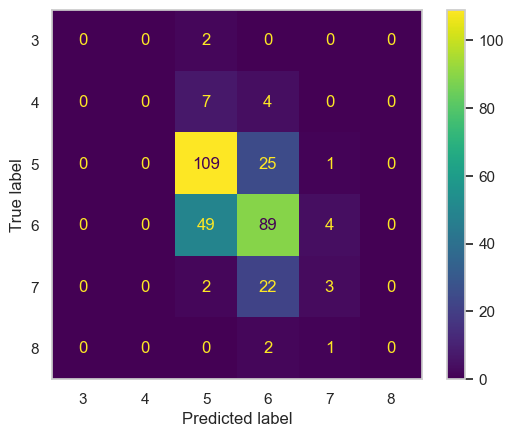

Accuracy of Linear SVC red training is:  0.5871774824081314
Accuracy of Linear SVC on red test data is:  0.63125


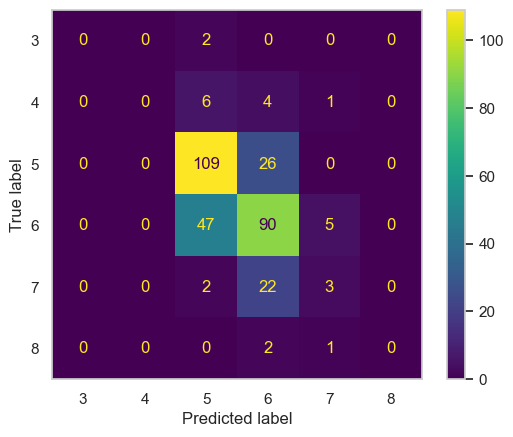

Accuracy of Linear SVC red training is:  0.5871774824081314
Accuracy of Linear SVC on red test data is:  0.63125


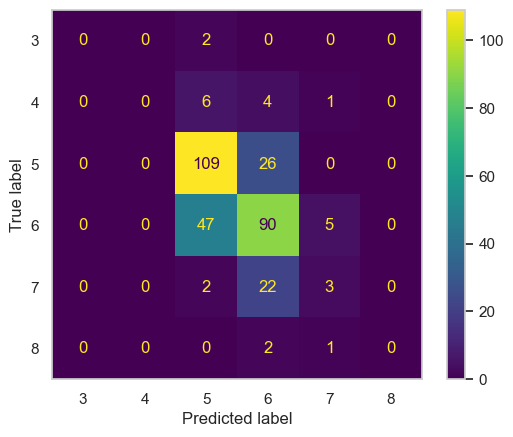

Accuracy of Linear SVC red training is:  0.5871774824081314
Accuracy of Linear SVC on red test data is:  0.63125


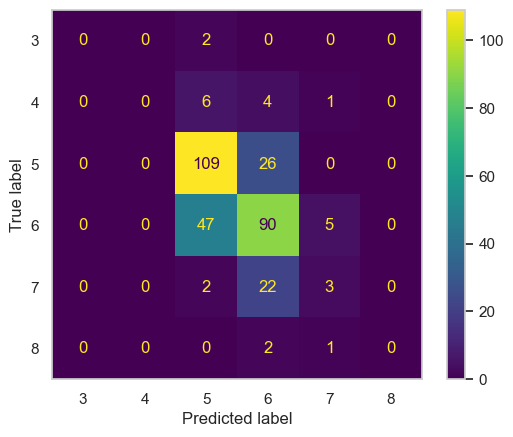

Accuracy of Linear SVC red training is:  0.5871774824081314
Accuracy of Linear SVC on red test data is:  0.63125


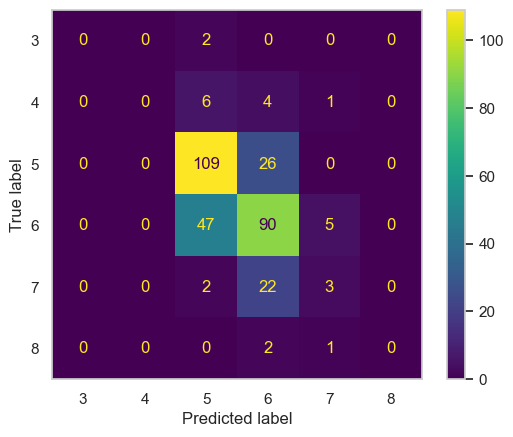

Accuracy of Linear SVC red training is:  0.5871774824081314
Accuracy of Linear SVC on red test data is:  0.63125


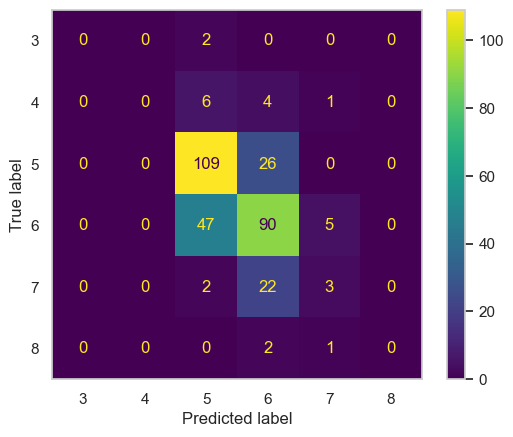

Accuracy of Linear SVC red training is:  0.5934323690383112
Accuracy of Linear SVC on red test data is:  0.63125


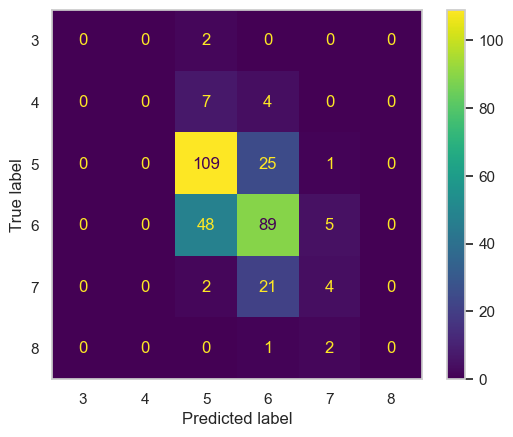

Accuracy of Linear SVC red training is:  0.5934323690383112
Accuracy of Linear SVC on red test data is:  0.63125


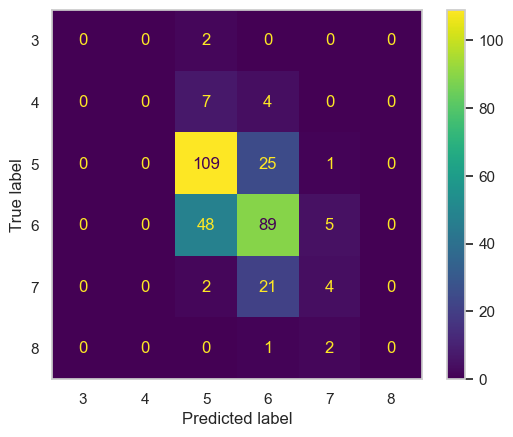

Accuracy of Linear SVC red training is:  0.5934323690383112
Accuracy of Linear SVC on red test data is:  0.63125


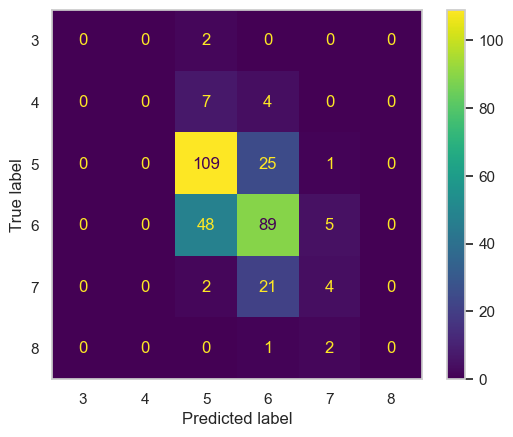

Accuracy of Linear SVC red training is:  0.5934323690383112
Accuracy of Linear SVC on red test data is:  0.63125


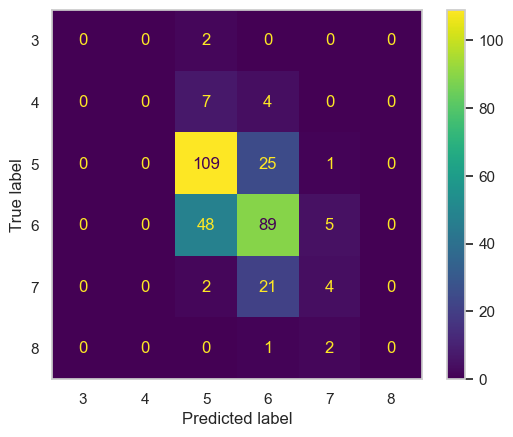

Accuracy of Linear SVC red training is:  0.5934323690383112
Accuracy of Linear SVC on red test data is:  0.63125


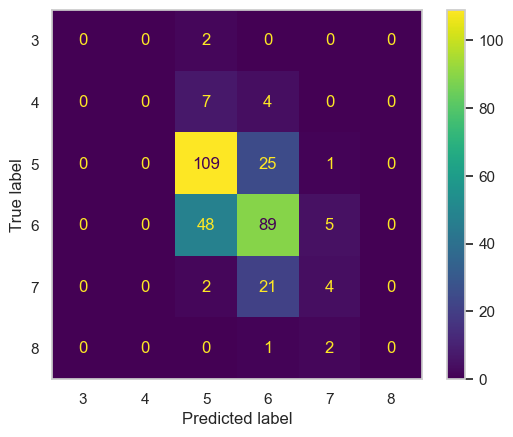

Accuracy of Linear SVC red training is:  0.5918686473807663
Accuracy of Linear SVC on red test data is:  0.625


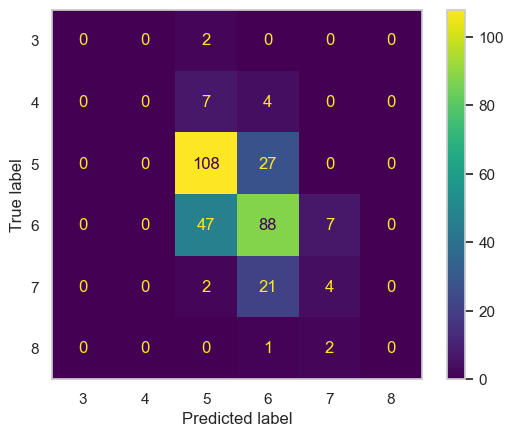

Accuracy of Linear SVC red training is:  0.5918686473807663
Accuracy of Linear SVC on red test data is:  0.625


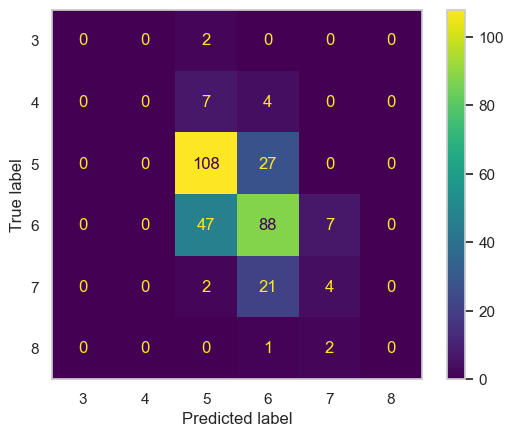

Accuracy of Linear SVC red training is:  0.5918686473807663
Accuracy of Linear SVC on red test data is:  0.625


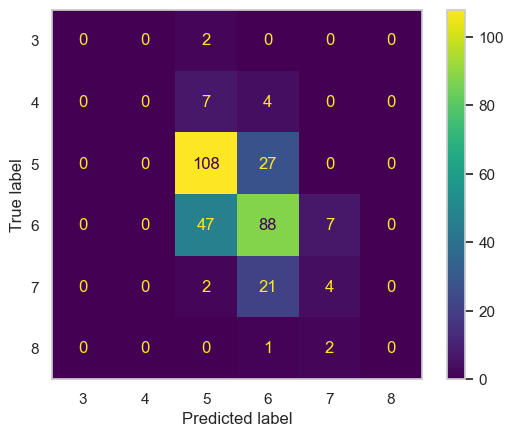

Accuracy of Linear SVC red training is:  0.5918686473807663
Accuracy of Linear SVC on red test data is:  0.625


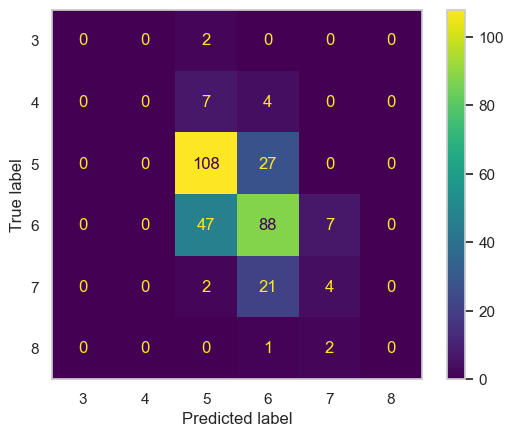

Accuracy of Linear SVC red training is:  0.5918686473807663
Accuracy of Linear SVC on red test data is:  0.625


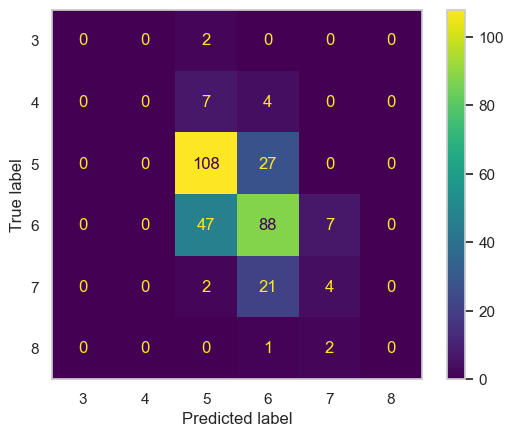

In [736]:
for i in range(5): 
    lin_svc(redwinedata, redwinelabels, "red", "none")
for i in range(5): 
    lin_svc(scaledred, redwinelabels, "red", "standard")
for i in range(5): 
    lin_svc(logscalered, redwinelabels, "red", "log")
for i in range(5): 
    lin_svc(logscalereddf, redwinelabels, "red", "logstd")

Accuracy of Polynomial SVC white training is: 0.4650331801939765
Accuracy of Polynomial SVC on white test data is: 0.4316326530612245


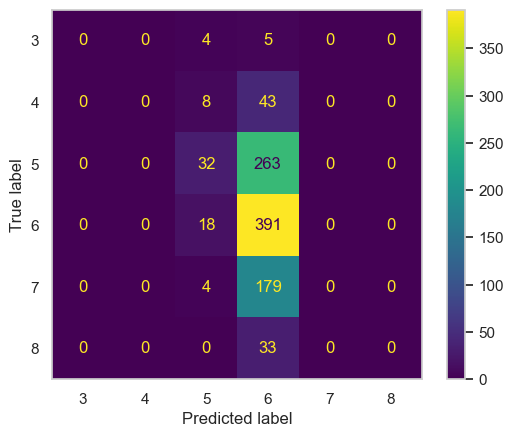

Accuracy of Polynomial SVC white training is: 0.4650331801939765
Accuracy of Polynomial SVC on white test data is: 0.4316326530612245


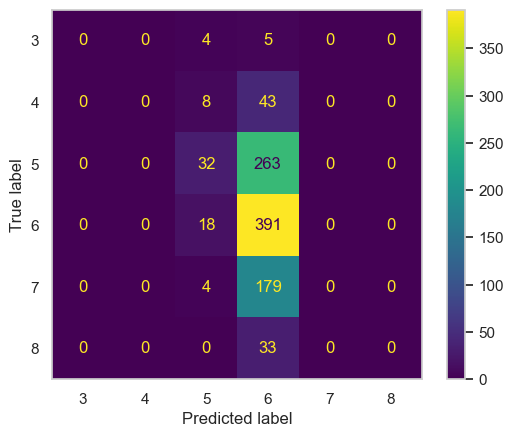

Accuracy of Polynomial SVC white training is: 0.4650331801939765
Accuracy of Polynomial SVC on white test data is: 0.4316326530612245


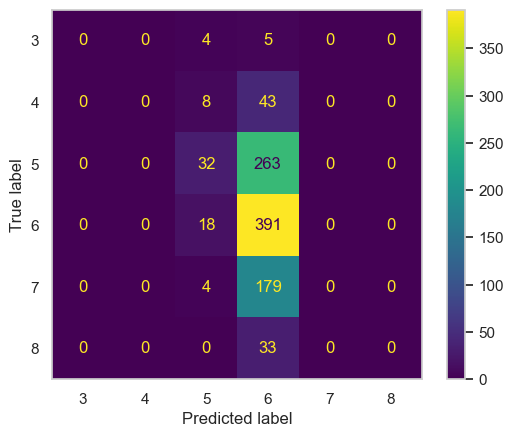

Accuracy of Polynomial SVC white training is: 0.4650331801939765
Accuracy of Polynomial SVC on white test data is: 0.4316326530612245


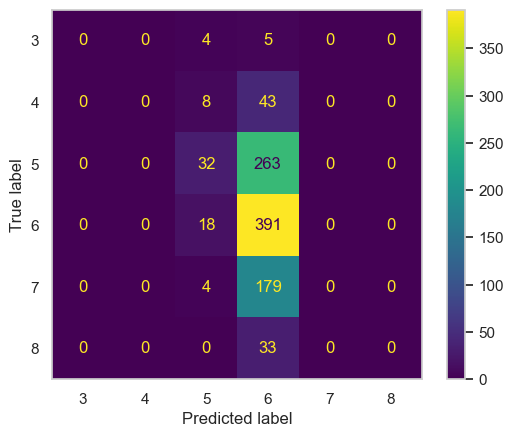

Accuracy of Polynomial SVC white training is: 0.4650331801939765
Accuracy of Polynomial SVC on white test data is: 0.4316326530612245


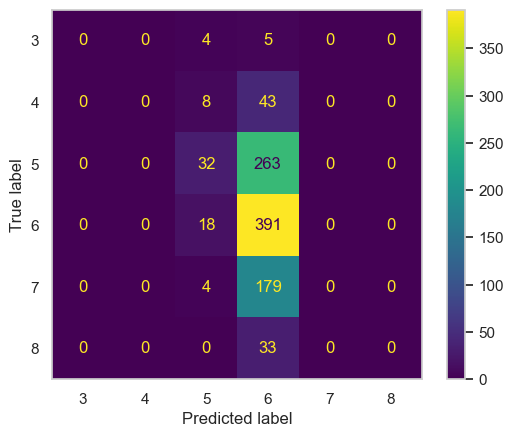

Accuracy of Polynomial SVC white training is: 0.6314446145992854
Accuracy of Polynomial SVC on white test data is: 0.5224489795918368


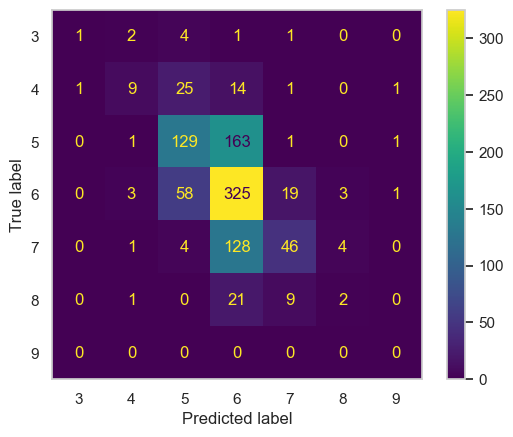

Accuracy of Polynomial SVC white training is: 0.6314446145992854
Accuracy of Polynomial SVC on white test data is: 0.5224489795918368


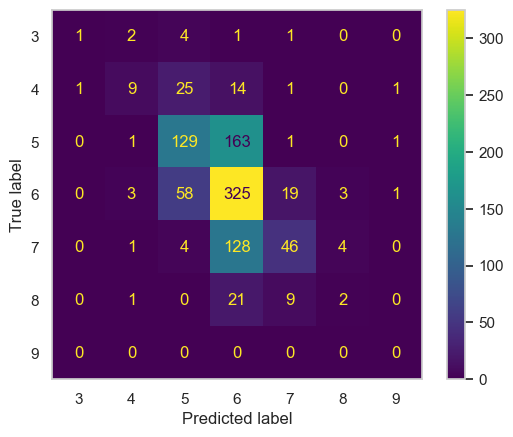

Accuracy of Polynomial SVC white training is: 0.6314446145992854
Accuracy of Polynomial SVC on white test data is: 0.5224489795918368


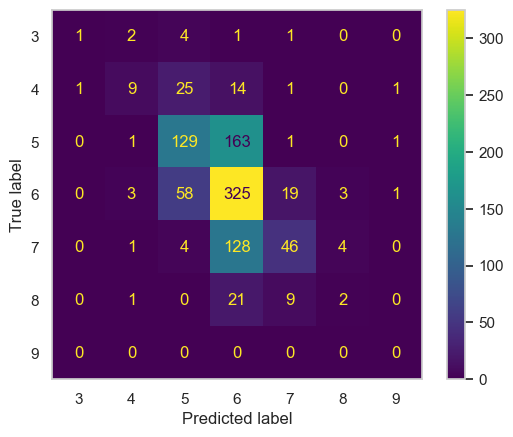

Accuracy of Polynomial SVC white training is: 0.6314446145992854
Accuracy of Polynomial SVC on white test data is: 0.5224489795918368


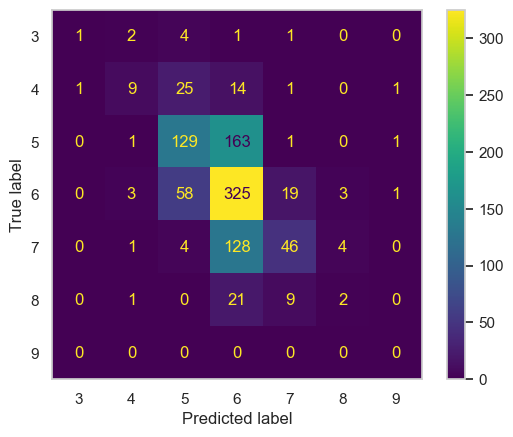

Accuracy of Polynomial SVC white training is: 0.6314446145992854
Accuracy of Polynomial SVC on white test data is: 0.5224489795918368


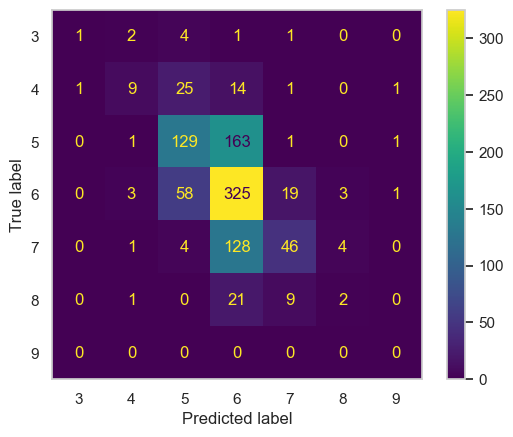

Accuracy of Polynomial SVC white training is: 0.5390505359877489
Accuracy of Polynomial SVC on white test data is: 0.4887755102040816


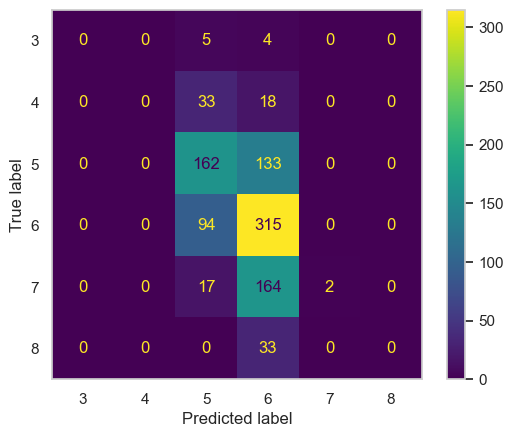

Accuracy of Polynomial SVC white training is: 0.5390505359877489
Accuracy of Polynomial SVC on white test data is: 0.4887755102040816


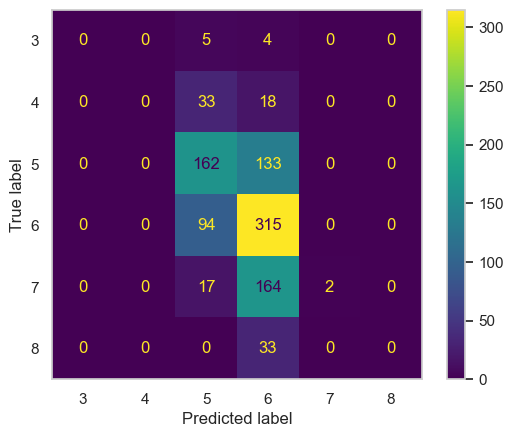

Accuracy of Polynomial SVC white training is: 0.5390505359877489
Accuracy of Polynomial SVC on white test data is: 0.4887755102040816


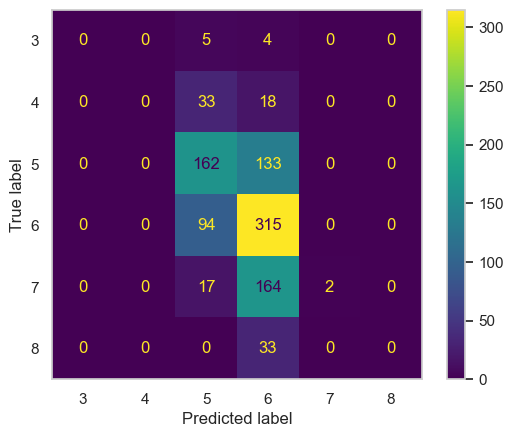

Accuracy of Polynomial SVC white training is: 0.5390505359877489
Accuracy of Polynomial SVC on white test data is: 0.4887755102040816


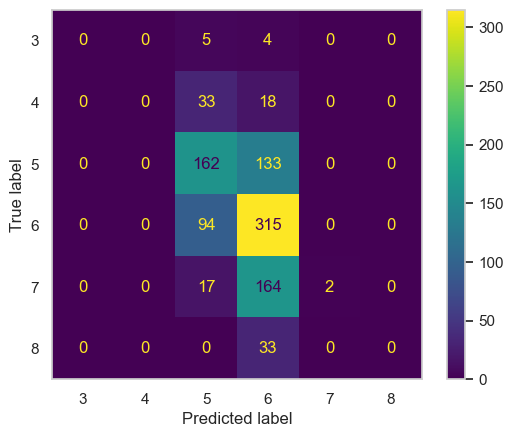

Accuracy of Polynomial SVC white training is: 0.5390505359877489
Accuracy of Polynomial SVC on white test data is: 0.4887755102040816


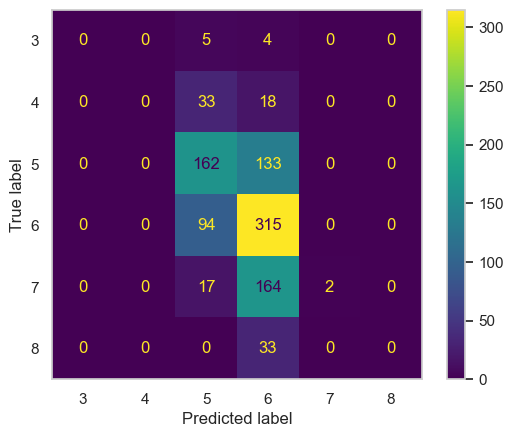

Accuracy of Polynomial SVC white training is: 0.6406329760081675
Accuracy of Polynomial SVC on white test data is: 0.5020408163265306


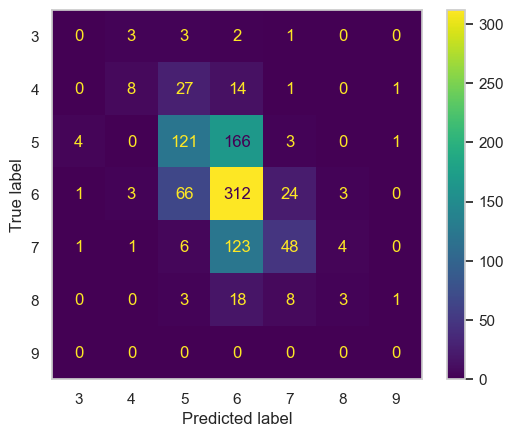

Accuracy of Polynomial SVC white training is: 0.6406329760081675
Accuracy of Polynomial SVC on white test data is: 0.5020408163265306


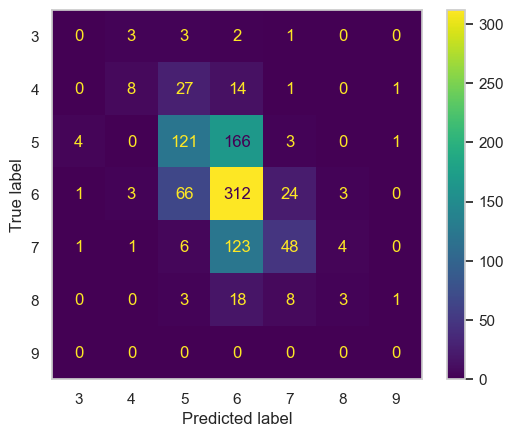

Accuracy of Polynomial SVC white training is: 0.6406329760081675
Accuracy of Polynomial SVC on white test data is: 0.5020408163265306


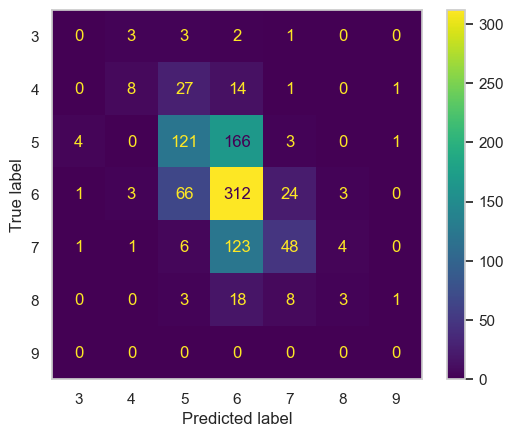

Accuracy of Polynomial SVC white training is: 0.6406329760081675
Accuracy of Polynomial SVC on white test data is: 0.5020408163265306


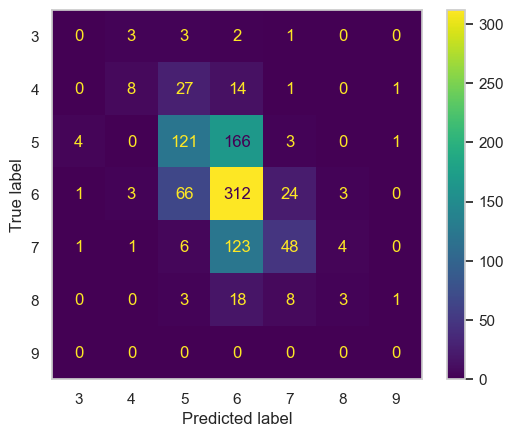

Accuracy of Polynomial SVC white training is: 0.6406329760081675
Accuracy of Polynomial SVC on white test data is: 0.5020408163265306


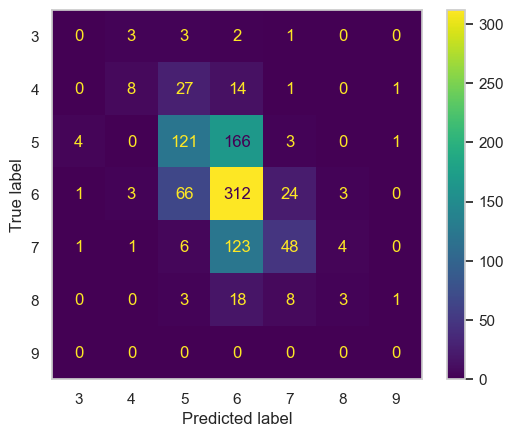

In [737]:
for i in range(5): 
    svmsvc(whitewinedata, whitewinelabels, "white", "none")
for i in range(5): 
    svmsvc(scaledwhite, whitewinelabels, "white", "standard")
for i in range(5): 
    svmsvc(logscalewhite, whitewinelabels, "white", "log")
for i in range(5): 
    svmsvc(logscalewhitedf, whitewinelabels, "white", "logstd")

Accuracy of Polynomial SVC red training is: 0.509773260359656
Accuracy of Polynomial SVC on red test data is: 0.528125


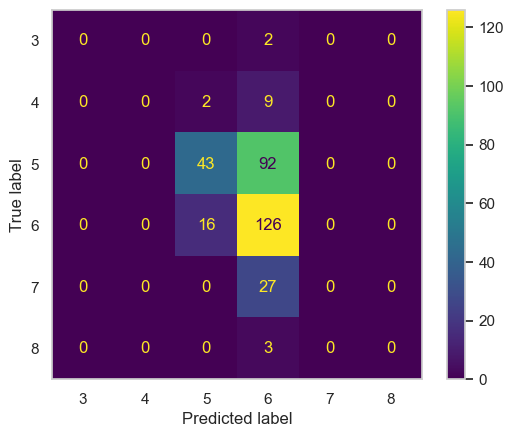

Accuracy of Polynomial SVC red training is: 0.509773260359656
Accuracy of Polynomial SVC on red test data is: 0.528125


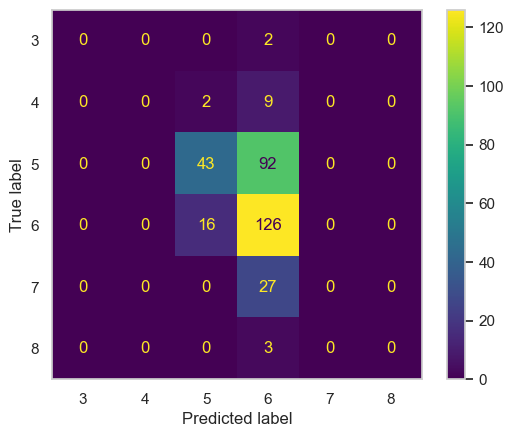

Accuracy of Polynomial SVC red training is: 0.509773260359656
Accuracy of Polynomial SVC on red test data is: 0.528125


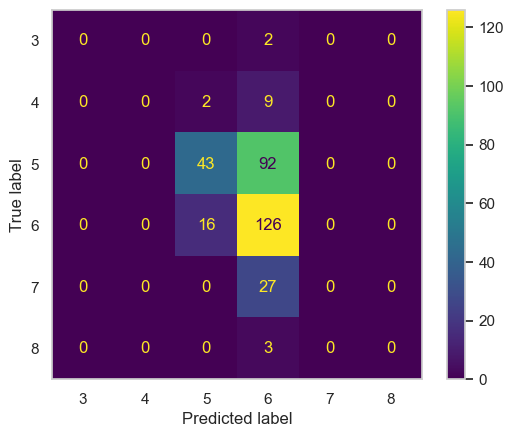

Accuracy of Polynomial SVC red training is: 0.509773260359656
Accuracy of Polynomial SVC on red test data is: 0.528125


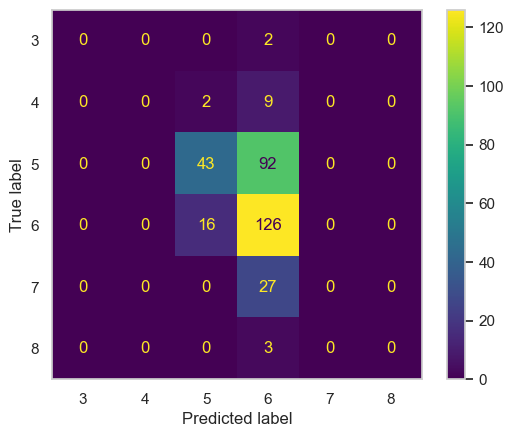

Accuracy of Polynomial SVC red training is: 0.509773260359656
Accuracy of Polynomial SVC on red test data is: 0.528125


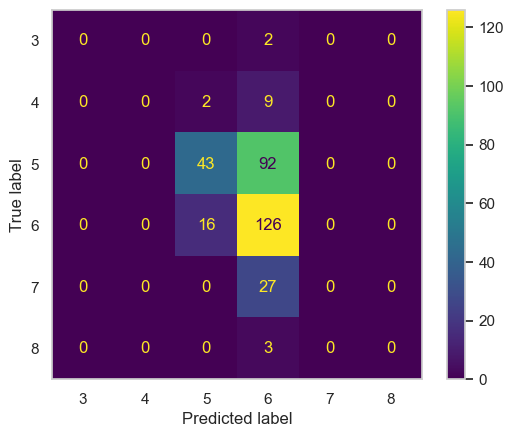

Accuracy of Polynomial SVC red training is: 0.7412040656763096
Accuracy of Polynomial SVC on red test data is: 0.628125


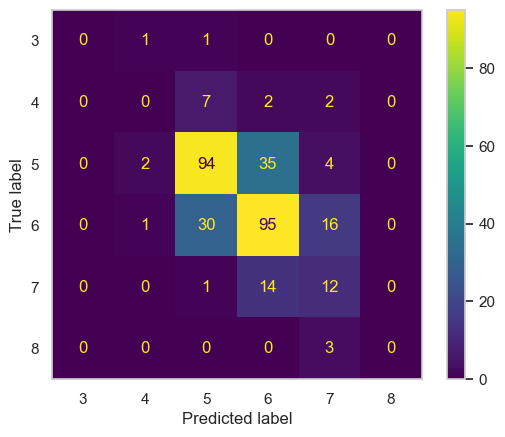

Accuracy of Polynomial SVC red training is: 0.7412040656763096
Accuracy of Polynomial SVC on red test data is: 0.628125


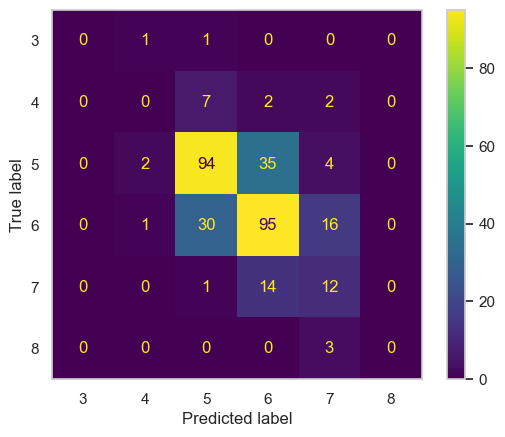

Accuracy of Polynomial SVC red training is: 0.7412040656763096
Accuracy of Polynomial SVC on red test data is: 0.628125


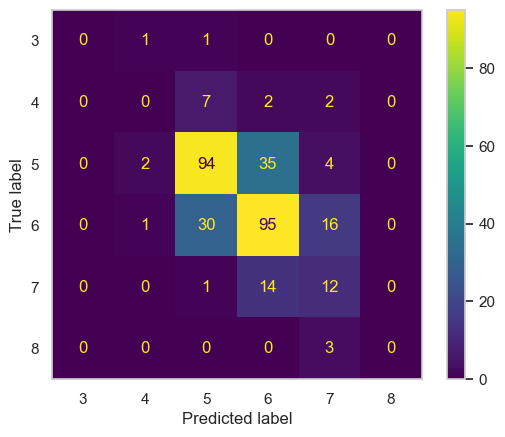

Accuracy of Polynomial SVC red training is: 0.7412040656763096
Accuracy of Polynomial SVC on red test data is: 0.628125


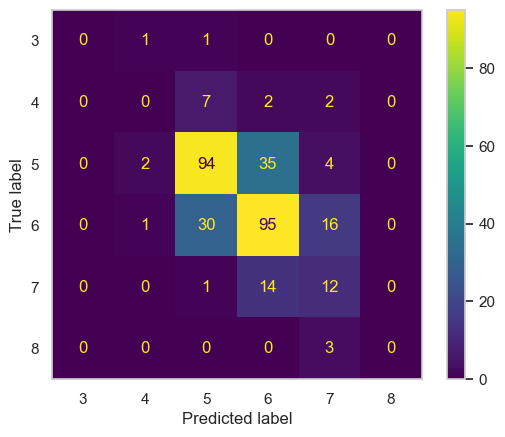

Accuracy of Polynomial SVC red training is: 0.7412040656763096
Accuracy of Polynomial SVC on red test data is: 0.628125


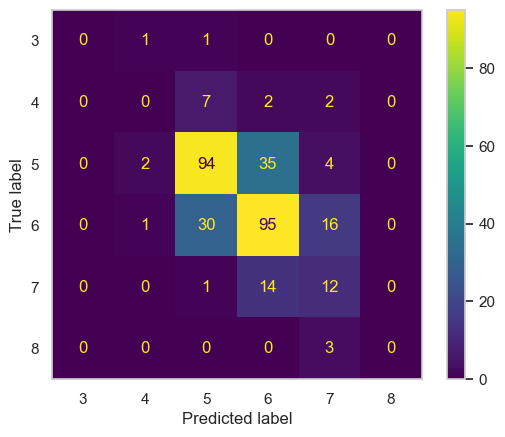

Accuracy of Polynomial SVC red training is: 0.5887412040656763
Accuracy of Polynomial SVC on red test data is: 0.621875


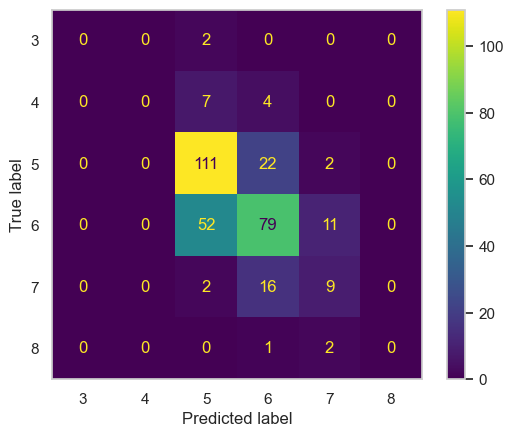

Accuracy of Polynomial SVC red training is: 0.5887412040656763
Accuracy of Polynomial SVC on red test data is: 0.621875


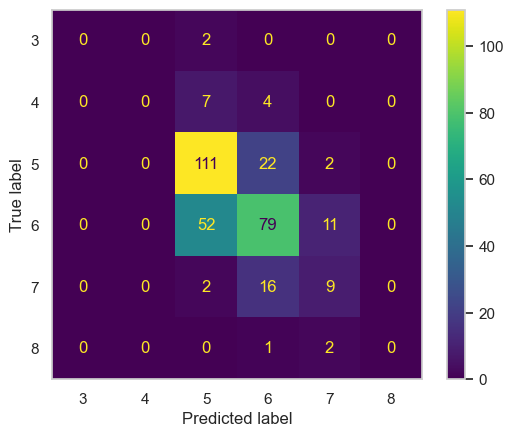

Accuracy of Polynomial SVC red training is: 0.5887412040656763
Accuracy of Polynomial SVC on red test data is: 0.621875


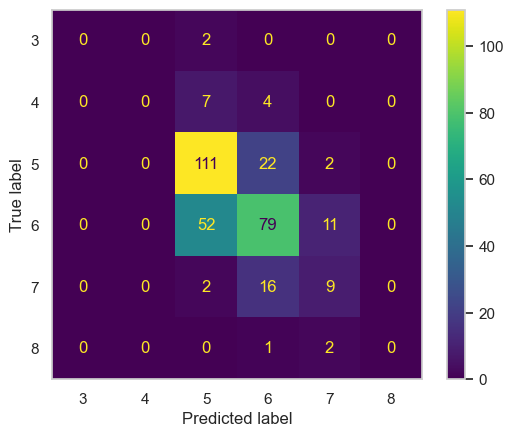

Accuracy of Polynomial SVC red training is: 0.5887412040656763
Accuracy of Polynomial SVC on red test data is: 0.621875


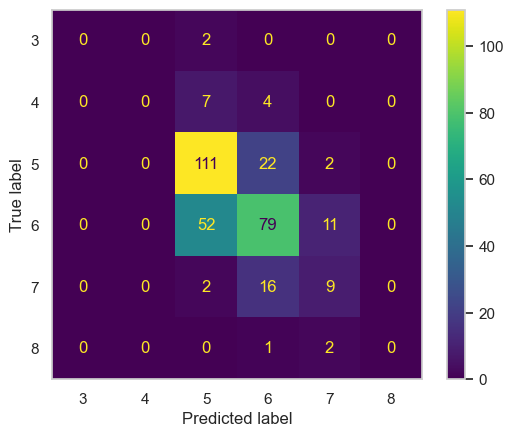

Accuracy of Polynomial SVC red training is: 0.5887412040656763
Accuracy of Polynomial SVC on red test data is: 0.621875


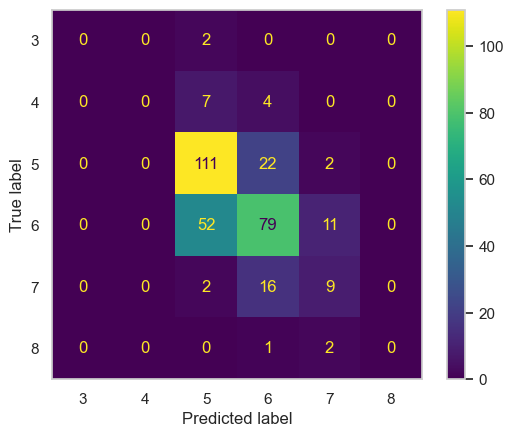

Accuracy of Polynomial SVC red training is: 0.764659890539484
Accuracy of Polynomial SVC on red test data is: 0.61875


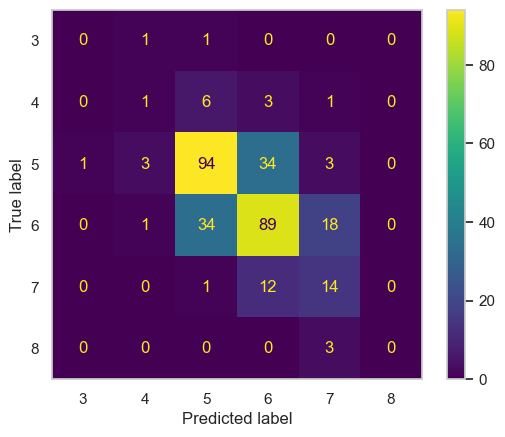

Accuracy of Polynomial SVC red training is: 0.764659890539484
Accuracy of Polynomial SVC on red test data is: 0.61875


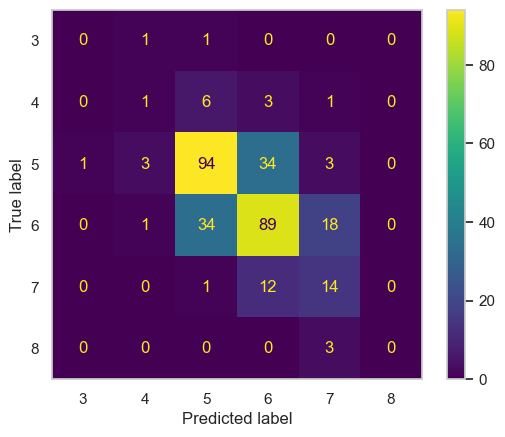

Accuracy of Polynomial SVC red training is: 0.764659890539484
Accuracy of Polynomial SVC on red test data is: 0.61875


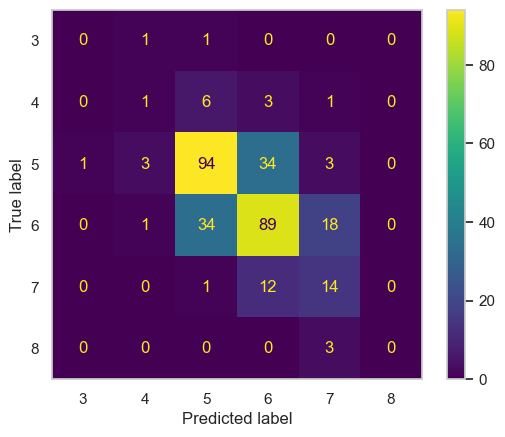

Accuracy of Polynomial SVC red training is: 0.764659890539484
Accuracy of Polynomial SVC on red test data is: 0.61875


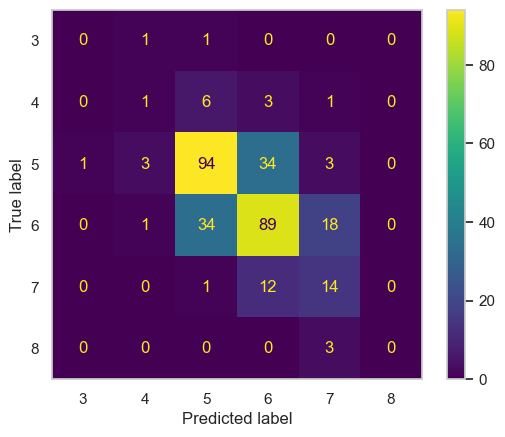

Accuracy of Polynomial SVC red training is: 0.764659890539484
Accuracy of Polynomial SVC on red test data is: 0.61875


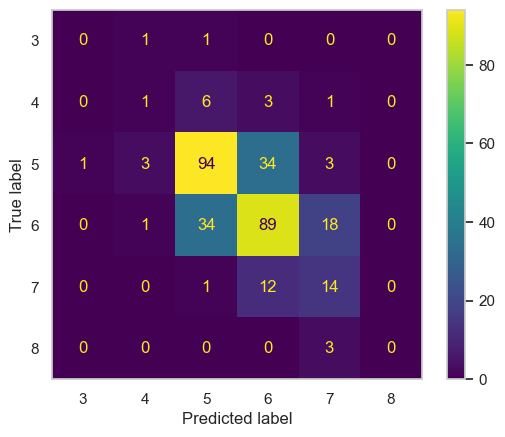

In [738]:
for i in range(5): 
    svmsvc(redwinedata, redwinelabels, "red", "none")
for i in range(5): 
    svmsvc(scaledred, redwinelabels, "red", "standard")
for i in range(5): 
    svmsvc(logscalered, redwinelabels, "red", "log")
for i in range(5): 
    svmsvc(logscalereddf, redwinelabels, "red", "logstd")

Accuracy of KNN on red training is: 1.0
Accuracy of KNN on red test data is: 0.5806122448979592


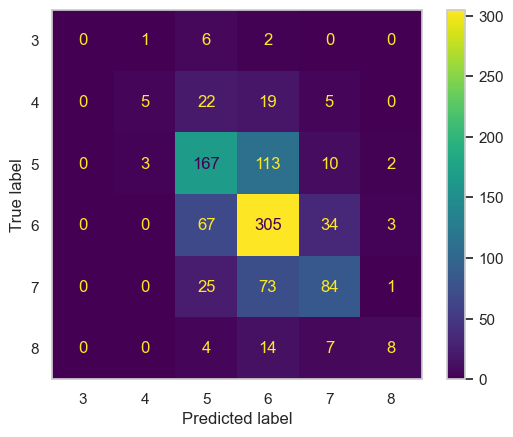

Accuracy of KNN on red training is: 1.0
Accuracy of KNN on red test data is: 0.5806122448979592


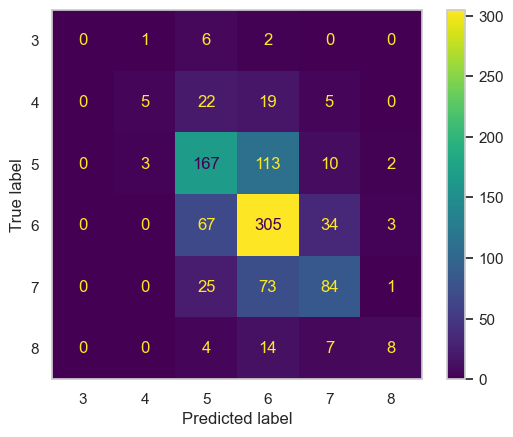

Accuracy of KNN on red training is: 1.0
Accuracy of KNN on red test data is: 0.5806122448979592


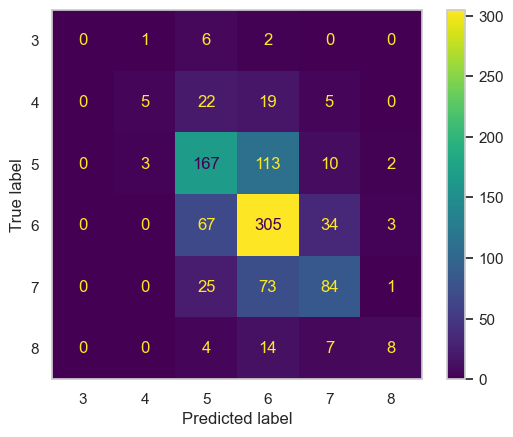

Accuracy of KNN on red training is: 1.0
Accuracy of KNN on red test data is: 0.5806122448979592


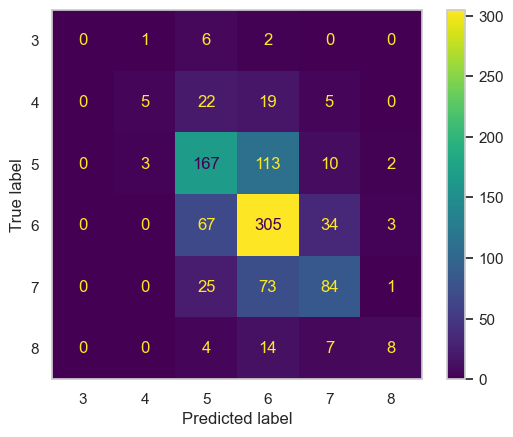

Accuracy of KNN on red training is: 1.0
Accuracy of KNN on red test data is: 0.5806122448979592


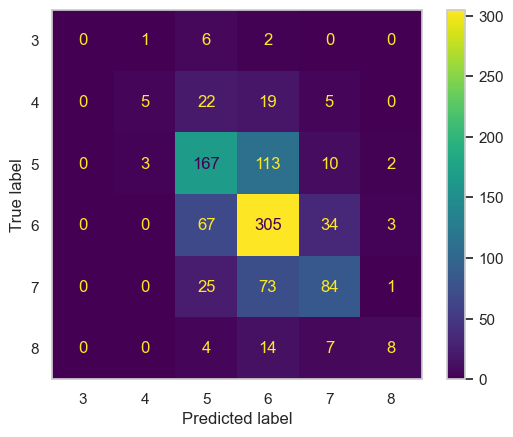

Accuracy of KNN on white training is: 1.0
Accuracy of KNN on white test data is: 0.6418367346938776


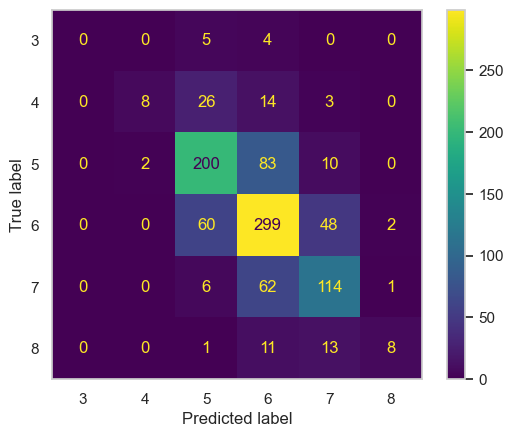

Accuracy of KNN on white training is: 1.0
Accuracy of KNN on white test data is: 0.6418367346938776


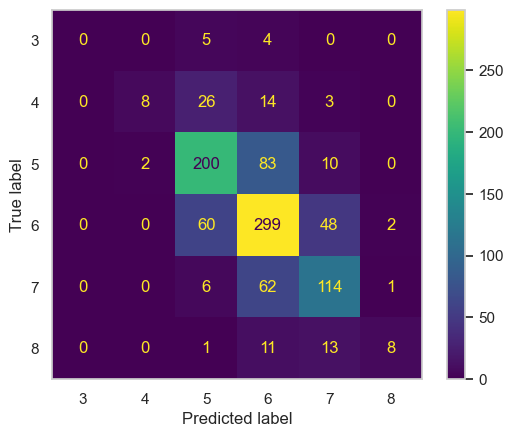

Accuracy of KNN on white training is: 1.0
Accuracy of KNN on white test data is: 0.6418367346938776


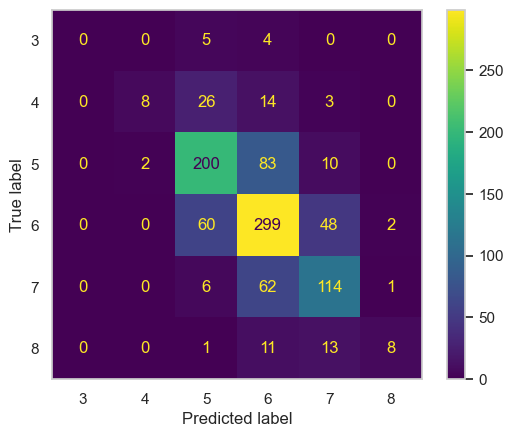

Accuracy of KNN on white training is: 1.0
Accuracy of KNN on white test data is: 0.6418367346938776


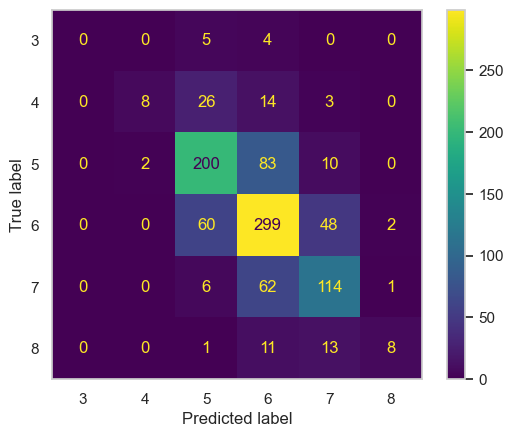

Accuracy of KNN on white training is: 1.0
Accuracy of KNN on white test data is: 0.6418367346938776


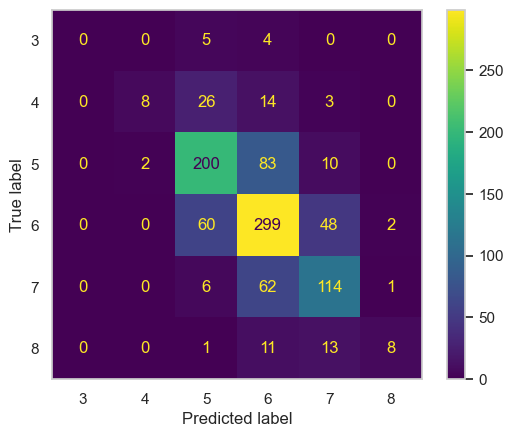

Accuracy of KNN on white training is: 1.0
Accuracy of KNN on white test data is: 0.6040816326530613


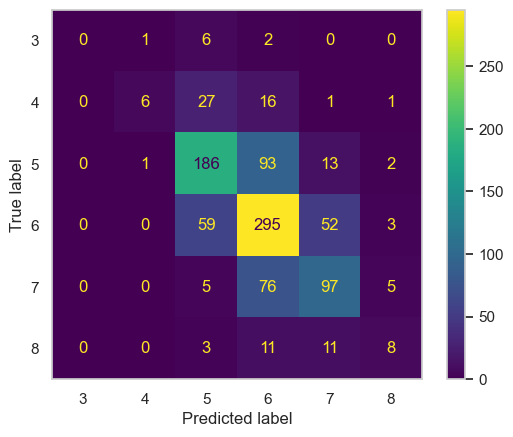

Accuracy of KNN on white training is: 1.0
Accuracy of KNN on white test data is: 0.6040816326530613


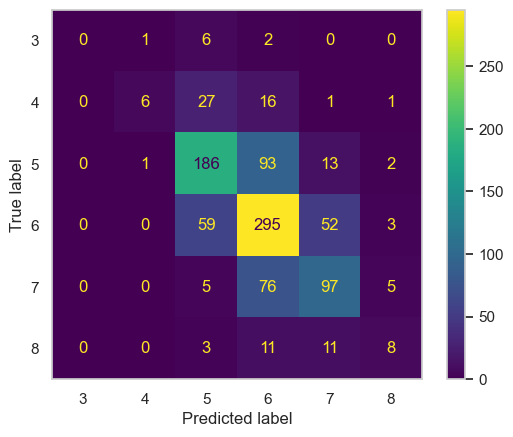

Accuracy of KNN on white training is: 1.0
Accuracy of KNN on white test data is: 0.6040816326530613


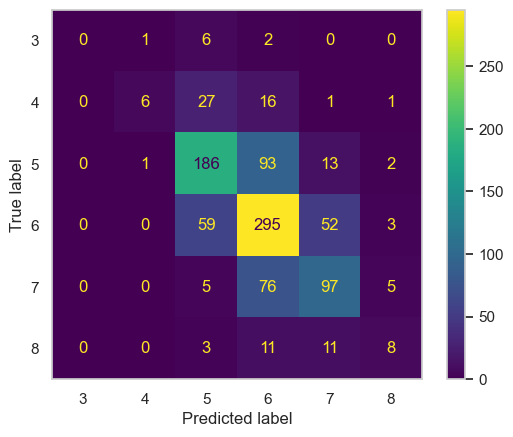

Accuracy of KNN on white training is: 1.0
Accuracy of KNN on white test data is: 0.6040816326530613


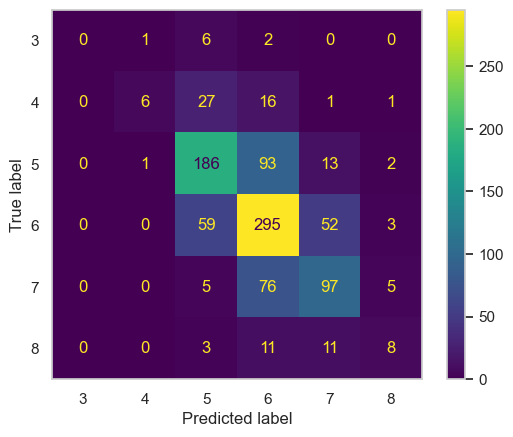

Accuracy of KNN on white training is: 1.0
Accuracy of KNN on white test data is: 0.6040816326530613


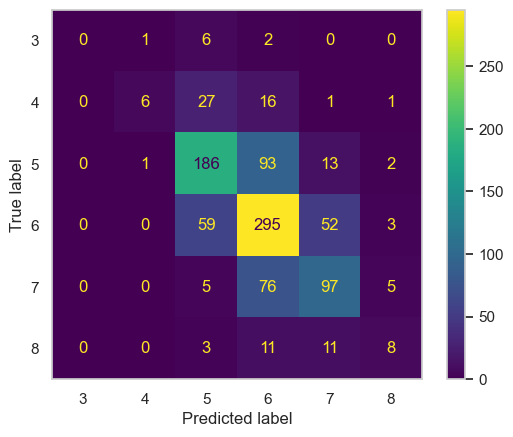

Accuracy of KNN on white training is: 1.0
Accuracy of KNN on white test data is: 0.6357142857142857


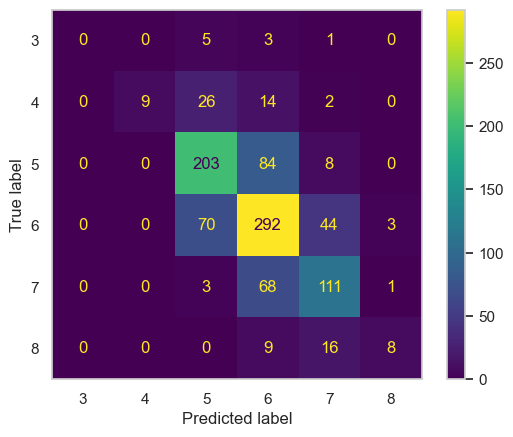

Accuracy of KNN on white training is: 1.0
Accuracy of KNN on white test data is: 0.6357142857142857


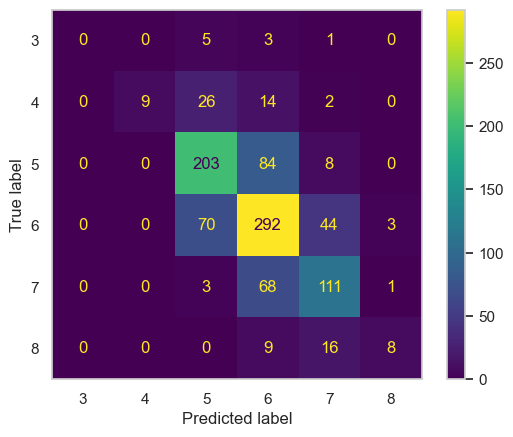

Accuracy of KNN on white training is: 1.0
Accuracy of KNN on white test data is: 0.6357142857142857


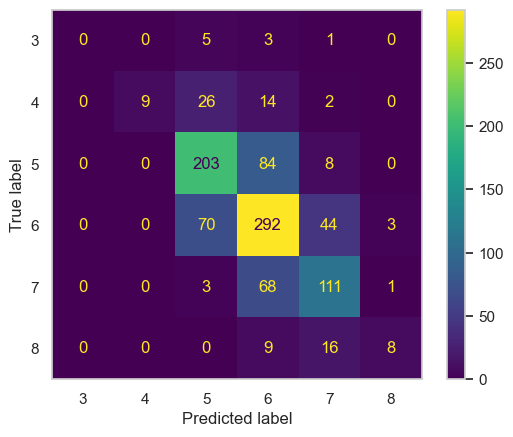

Accuracy of KNN on white training is: 1.0
Accuracy of KNN on white test data is: 0.6357142857142857


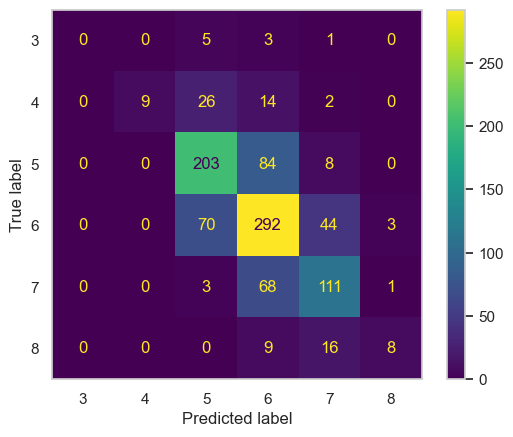

Accuracy of KNN on white training is: 1.0
Accuracy of KNN on white test data is: 0.6357142857142857


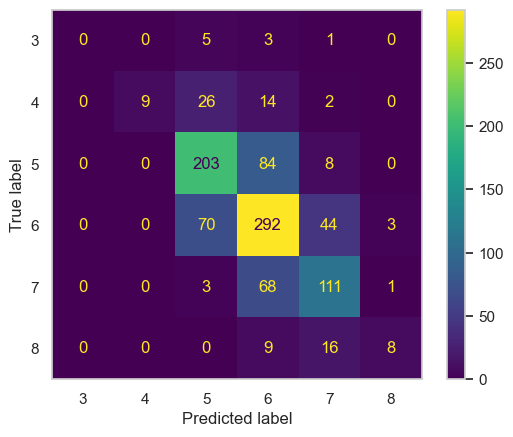

In [740]:
for i in range(5): 
    knn(whitewinedata, whitewinelabels, "red", "none")
for i in range(5): 
    knn(scaledwhite, whitewinelabels, "white", "standard")
for i in range(5): 
    knn(logscalewhite, whitewinelabels, "white", "log")
for i in range(5): 
    knn(logscalewhitedf, whitewinelabels, "white", "logstd")

Accuracy of KNN on red training is: 1.0
Accuracy of KNN on red test data is: 0.61875


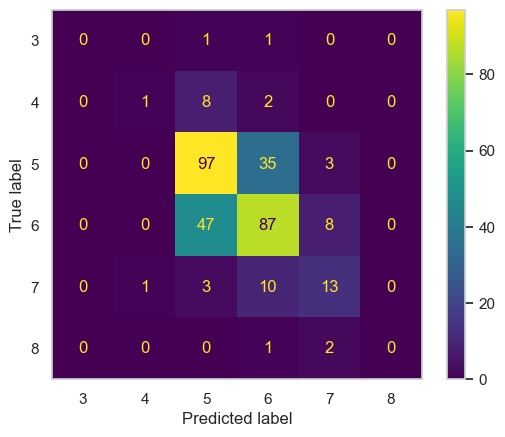

Accuracy of KNN on red training is: 1.0
Accuracy of KNN on red test data is: 0.61875


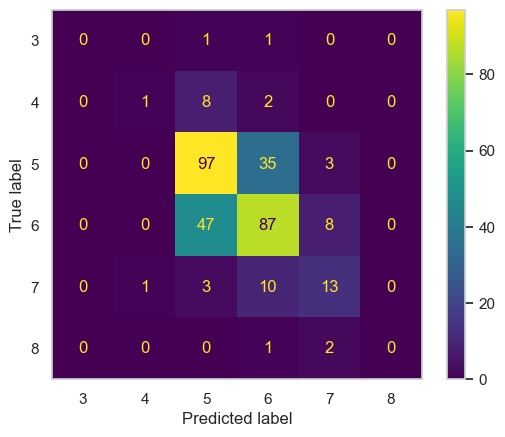

Accuracy of KNN on red training is: 1.0
Accuracy of KNN on red test data is: 0.61875


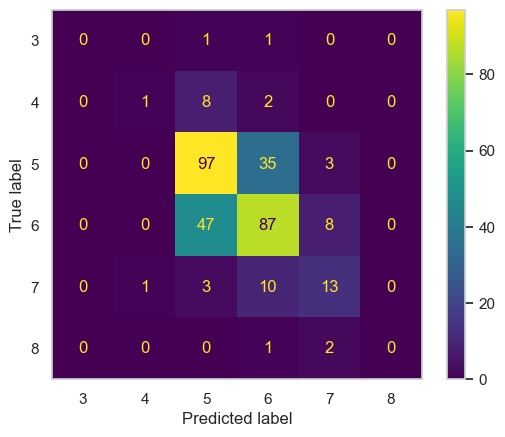

Accuracy of KNN on red training is: 1.0
Accuracy of KNN on red test data is: 0.61875


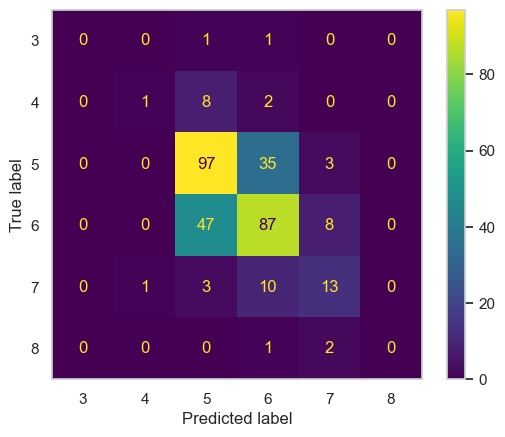

Accuracy of KNN on red training is: 1.0
Accuracy of KNN on red test data is: 0.61875


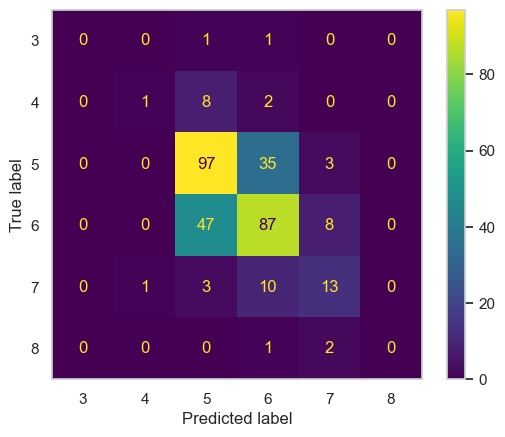

Accuracy of KNN on red training is: 1.0
Accuracy of KNN on red test data is: 0.675


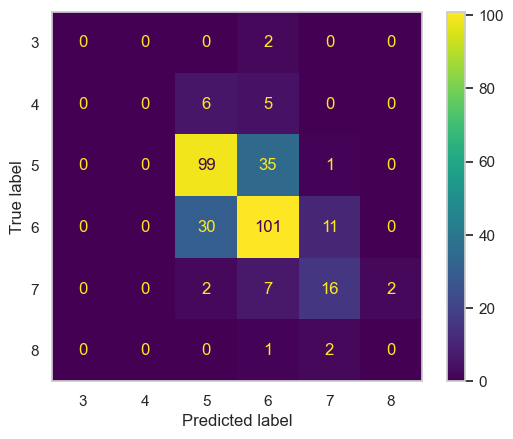

Accuracy of KNN on red training is: 1.0
Accuracy of KNN on red test data is: 0.675


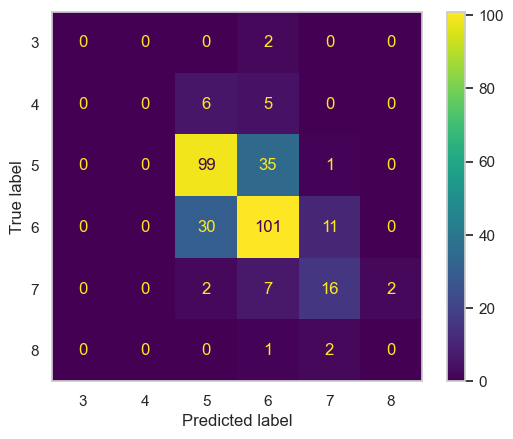

Accuracy of KNN on red training is: 1.0
Accuracy of KNN on red test data is: 0.675


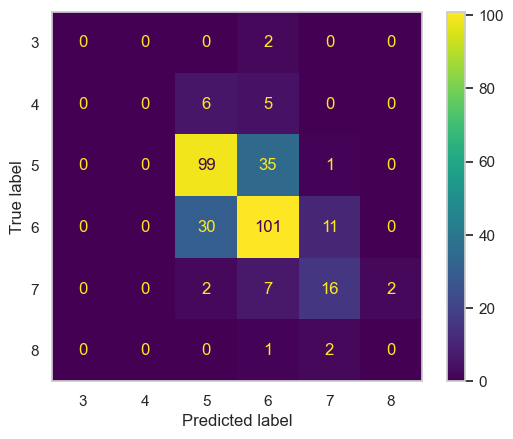

Accuracy of KNN on red training is: 1.0
Accuracy of KNN on red test data is: 0.675


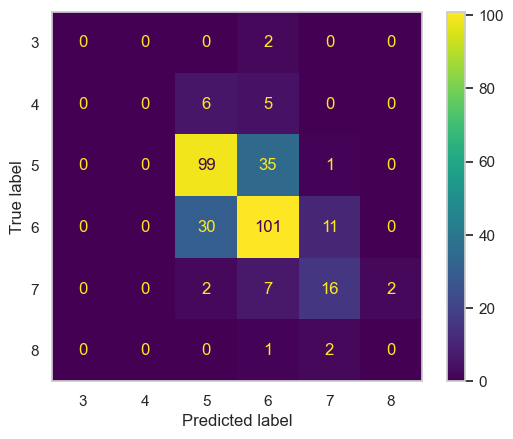

Accuracy of KNN on red training is: 1.0
Accuracy of KNN on red test data is: 0.675


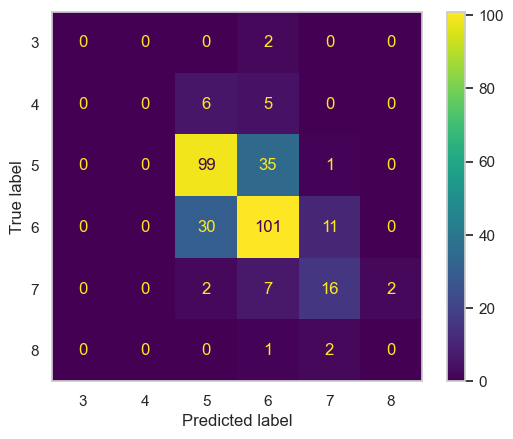

Accuracy of KNN on red training is: 1.0
Accuracy of KNN on red test data is: 0.696875


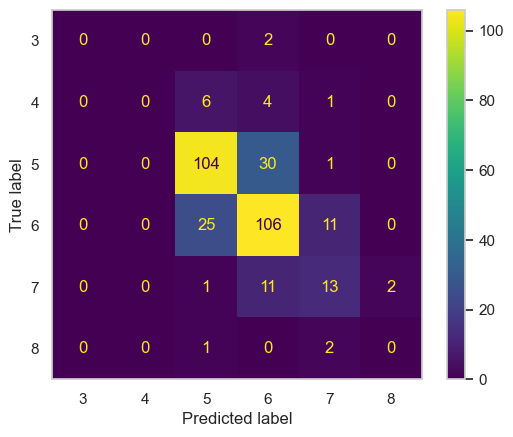

Accuracy of KNN on red training is: 1.0
Accuracy of KNN on red test data is: 0.696875


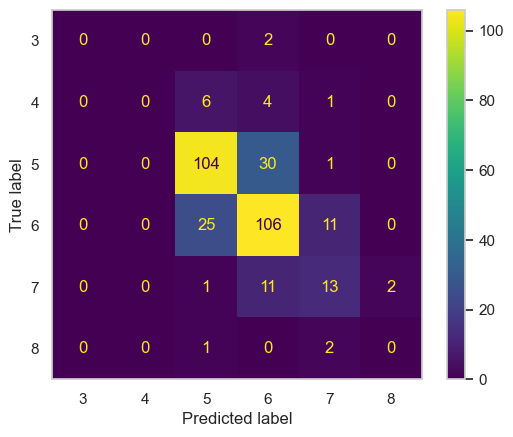

Accuracy of KNN on red training is: 1.0
Accuracy of KNN on red test data is: 0.696875


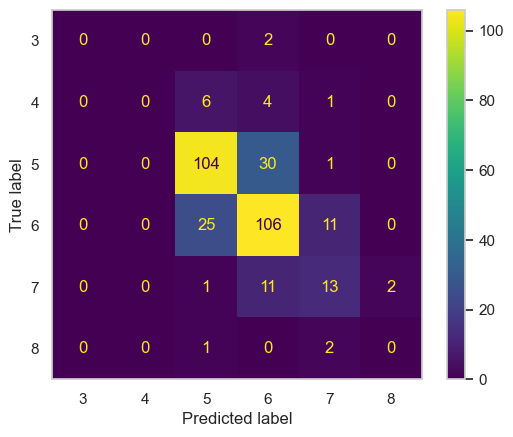

Accuracy of KNN on red training is: 1.0
Accuracy of KNN on red test data is: 0.696875


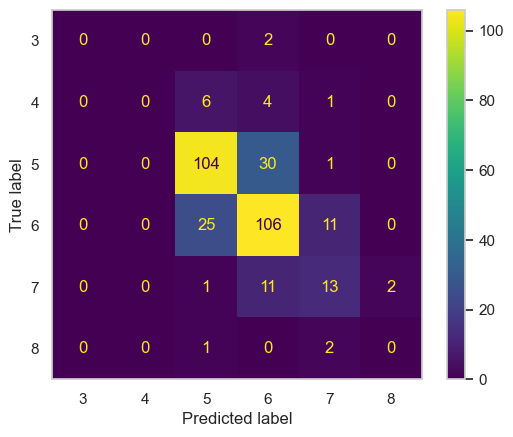

Accuracy of KNN on red training is: 1.0
Accuracy of KNN on red test data is: 0.696875


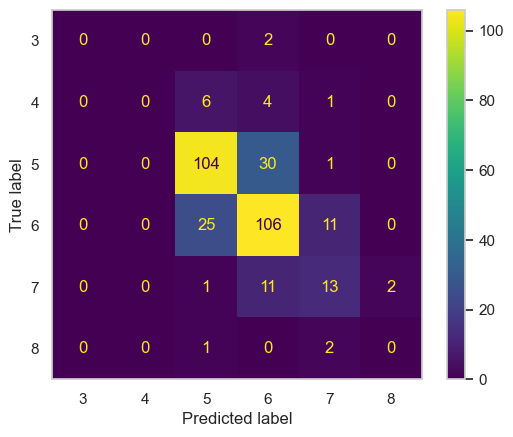

Accuracy of KNN on red training is: 1.0
Accuracy of KNN on red test data is: 0.671875


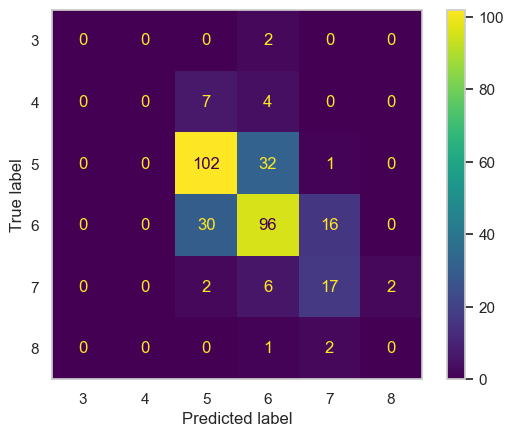

Accuracy of KNN on red training is: 1.0
Accuracy of KNN on red test data is: 0.671875


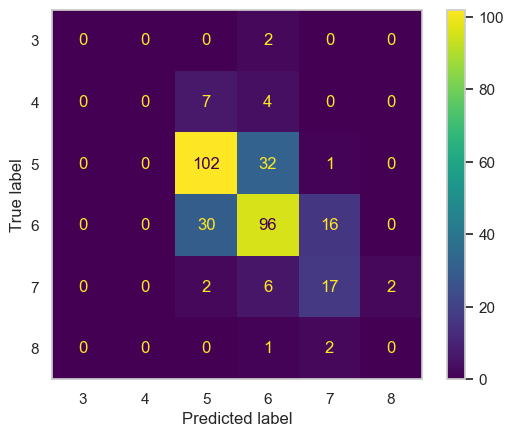

Accuracy of KNN on red training is: 1.0
Accuracy of KNN on red test data is: 0.671875


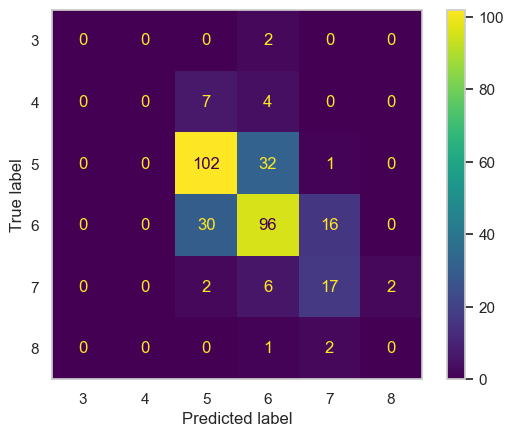

Accuracy of KNN on red training is: 1.0
Accuracy of KNN on red test data is: 0.671875


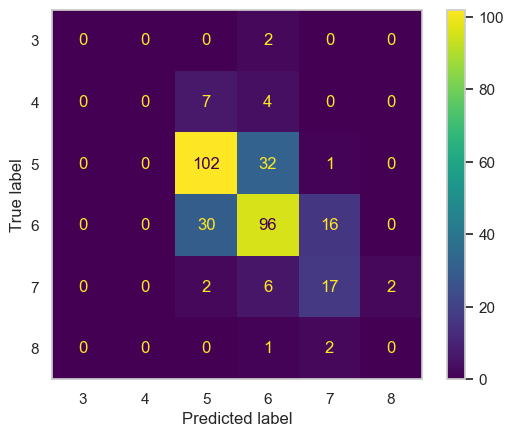

Accuracy of KNN on red training is: 1.0
Accuracy of KNN on red test data is: 0.671875


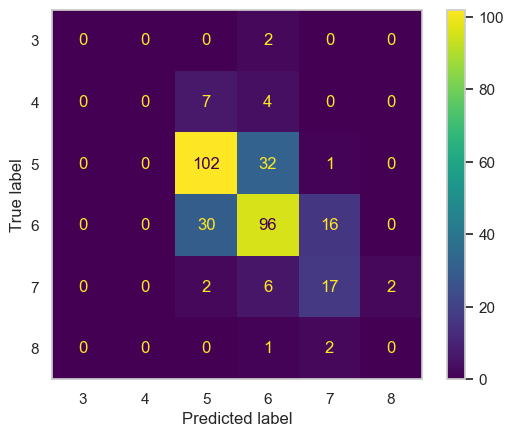

In [741]:
for i in range(5): 
    knn(redwinedata, redwinelabels, "red", "none")
for i in range(5): 
    knn(scaledred, redwinelabels, "red", "standard")
for i in range(5): 
    knn(logscalered, redwinelabels, "red", "log")
for i in range(5): 
    knn(logscalereddf, redwinelabels, "red", "logstd")

Accuracy SGD Classifier on white training is: 0.30398162327718226
Accuracy of SGD Classifier on white test data is: 0.3183673469387755


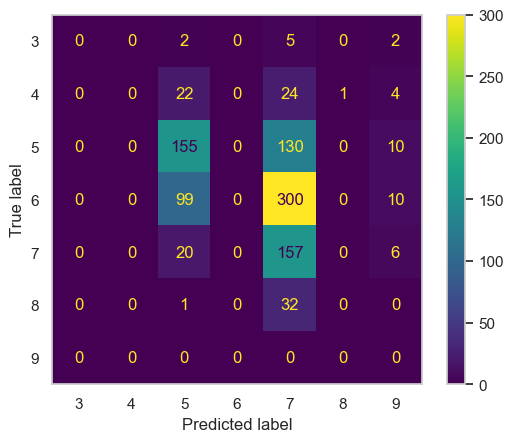

Accuracy SGD Classifier on white training is: 0.3708524757529352
Accuracy of SGD Classifier on white test data is: 0.38979591836734695


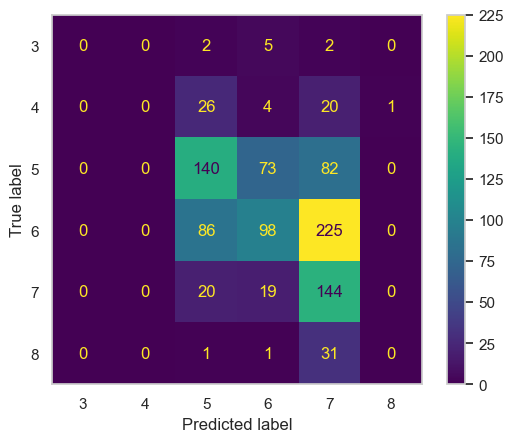

Accuracy SGD Classifier on white training is: 0.4793261868300153
Accuracy of SGD Classifier on white test data is: 0.46530612244897956


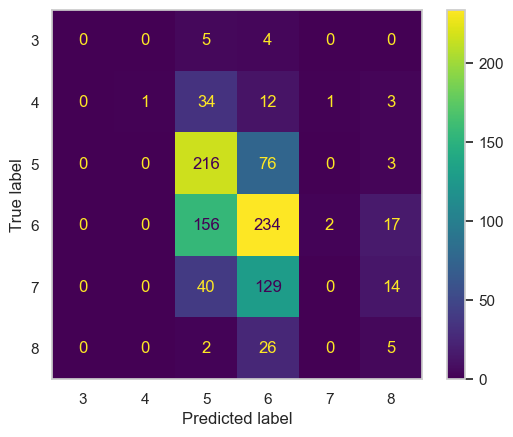

Accuracy SGD Classifier on white training is: 0.47881572230729963
Accuracy of SGD Classifier on white test data is: 0.4346938775510204


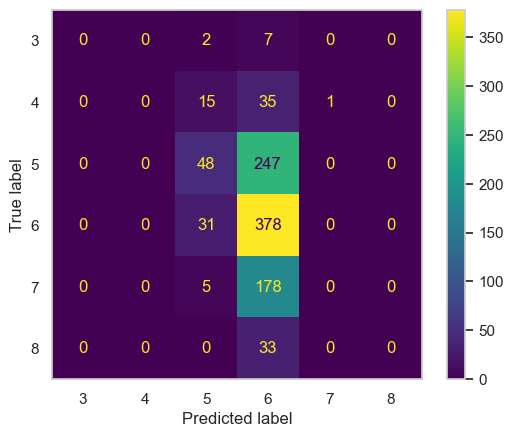

Accuracy SGD Classifier on white training is: 0.3460949464012251
Accuracy of SGD Classifier on white test data is: 0.35714285714285715


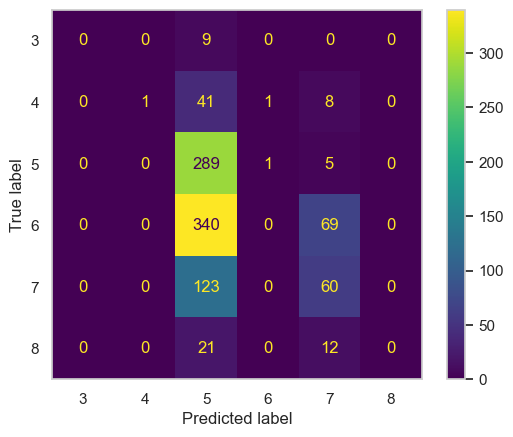

Accuracy SGD Classifier on white training is: 0.5306278713629403
Accuracy of SGD Classifier on white test data is: 0.47244897959183674


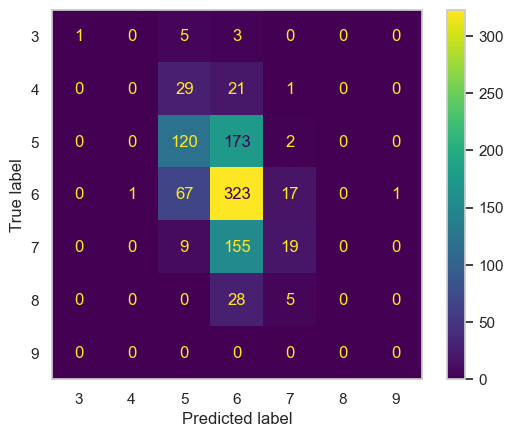

Accuracy SGD Classifier on white training is: 0.5298621745788668
Accuracy of SGD Classifier on white test data is: 0.4969387755102041


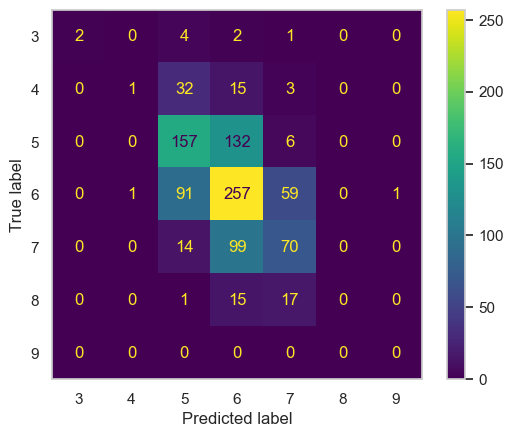

Accuracy SGD Classifier on white training is: 0.5367534456355283
Accuracy of SGD Classifier on white test data is: 0.5040816326530613


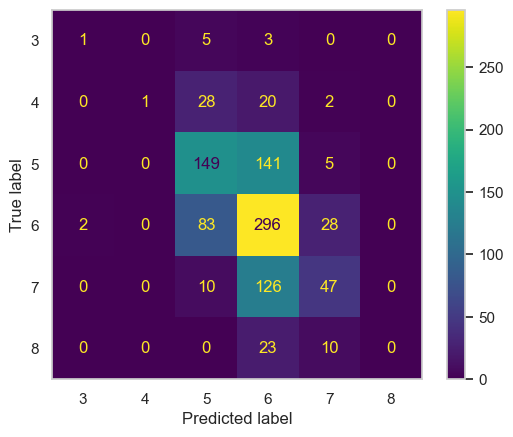

Accuracy SGD Classifier on white training is: 0.5301174068402246
Accuracy of SGD Classifier on white test data is: 0.4959183673469388


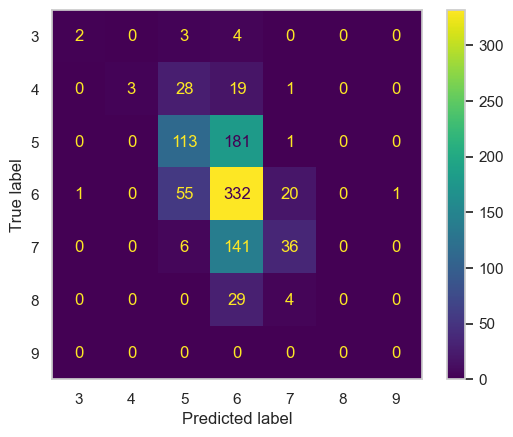

Accuracy SGD Classifier on white training is: 0.5234813680449208
Accuracy of SGD Classifier on white test data is: 0.48775510204081635


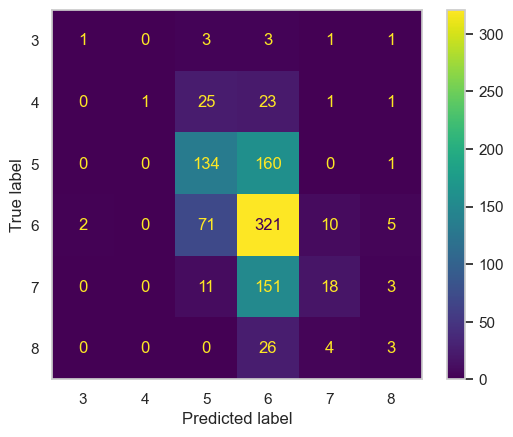

Accuracy SGD Classifier on white training is: 0.47447677386421644
Accuracy of SGD Classifier on white test data is: 0.4530612244897959


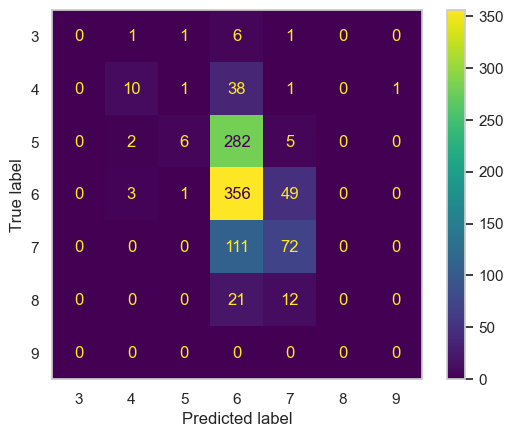

Accuracy SGD Classifier on white training is: 0.4857069933639612
Accuracy of SGD Classifier on white test data is: 0.4418367346938776


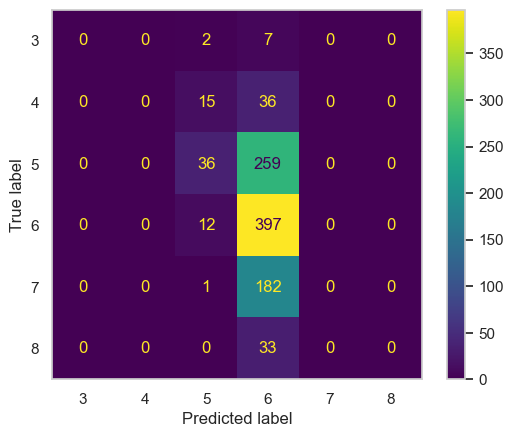

Accuracy SGD Classifier on white training is: 0.5117406840224604
Accuracy of SGD Classifier on white test data is: 0.4928571428571429


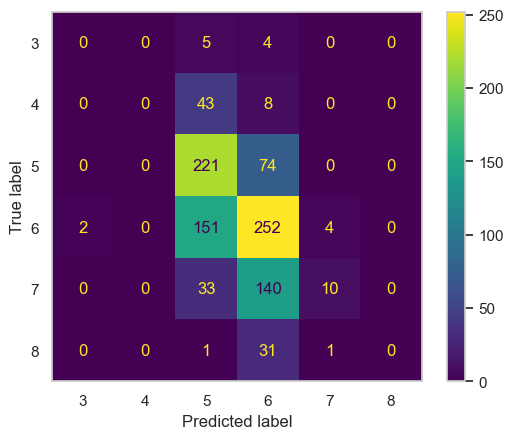

Accuracy SGD Classifier on white training is: 0.4721796835119959
Accuracy of SGD Classifier on white test data is: 0.42346938775510207


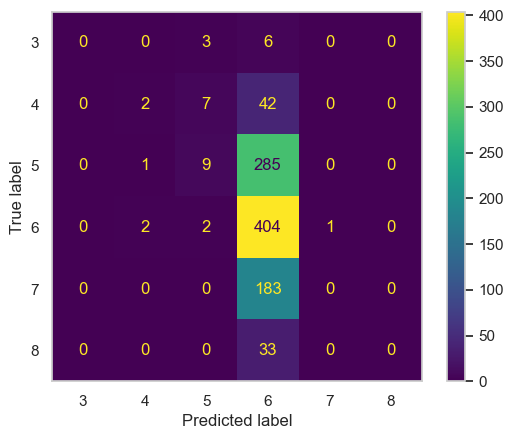

Accuracy SGD Classifier on white training is: 0.4017355793772333
Accuracy of SGD Classifier on white test data is: 0.4122448979591837


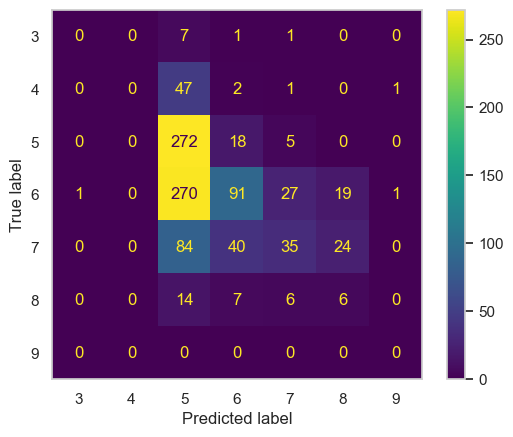

Accuracy SGD Classifier on white training is: 0.5017866258295048
Accuracy of SGD Classifier on white test data is: 0.49387755102040815


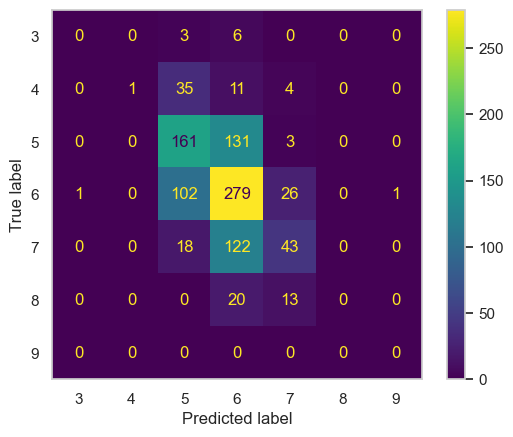

Accuracy SGD Classifier on white training is: 0.5038284839203675
Accuracy of SGD Classifier on white test data is: 0.4602040816326531


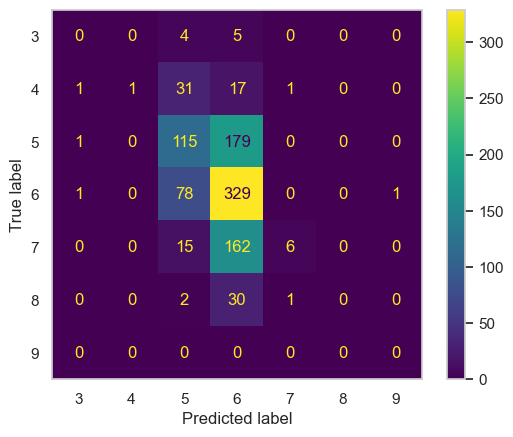

Accuracy SGD Classifier on white training is: 0.5145482388973966
Accuracy of SGD Classifier on white test data is: 0.4846938775510204


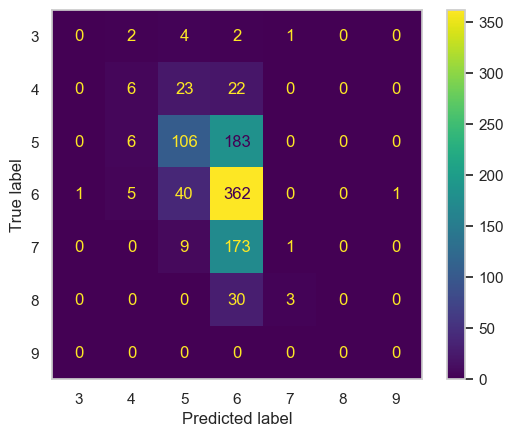

Accuracy SGD Classifier on white training is: 0.5181214905564063
Accuracy of SGD Classifier on white test data is: 0.4969387755102041


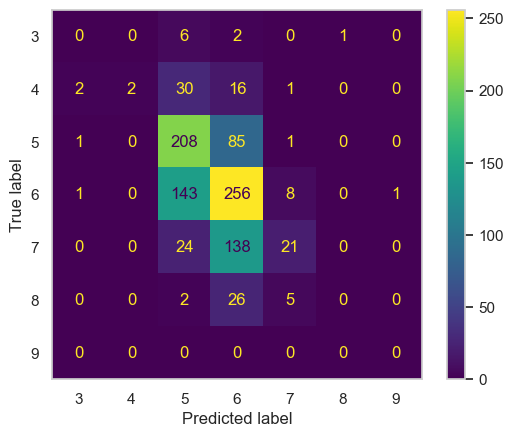

Accuracy SGD Classifier on white training is: 0.4928534966819806
Accuracy of SGD Classifier on white test data is: 0.4704081632653061


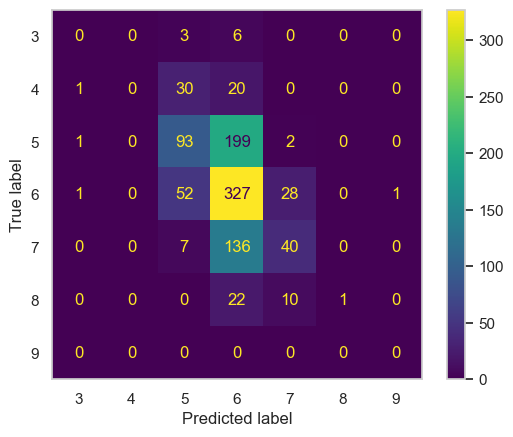

In [742]:
for i in range(5): 
    sgd(whitewinedata, whitewinelabels, "white", "none")
for i in range(5): 
    sgd(scaledwhite, whitewinelabels, "white", "standard")
for i in range(5): 
    sgd(logscalewhite, whitewinelabels, "white", "log")
for i in range(5): 
    sgd(logscalewhitedf, whitewinelabels, "white", "logstd")

Accuracy SGD Classifier on red training is: 0.41594996090695857
Accuracy of SGD Classifier on red test data is: 0.4


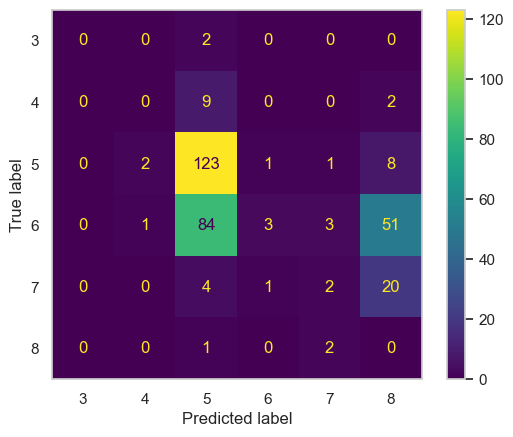

Accuracy SGD Classifier on red training is: 0.5019546520719312
Accuracy of SGD Classifier on red test data is: 0.50625


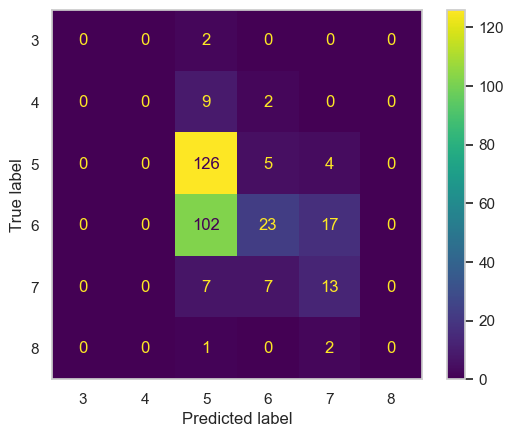

Accuracy SGD Classifier on red training is: 0.4949179046129789
Accuracy of SGD Classifier on red test data is: 0.515625


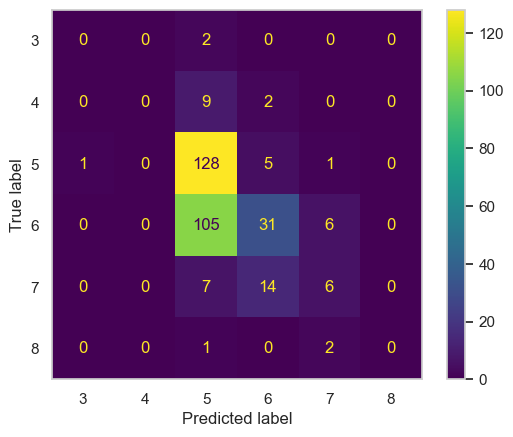

Accuracy SGD Classifier on red training is: 0.4550430023455825
Accuracy of SGD Classifier on red test data is: 0.45625


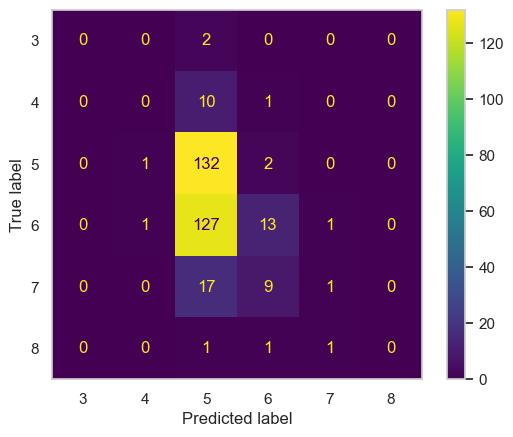

Accuracy SGD Classifier on red training is: 0.4808444096950743
Accuracy of SGD Classifier on red test data is: 0.49375


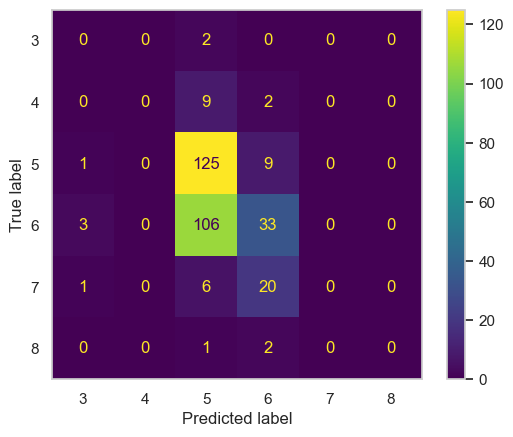

Accuracy SGD Classifier on red training is: 0.54573885848319
Accuracy of SGD Classifier on red test data is: 0.55


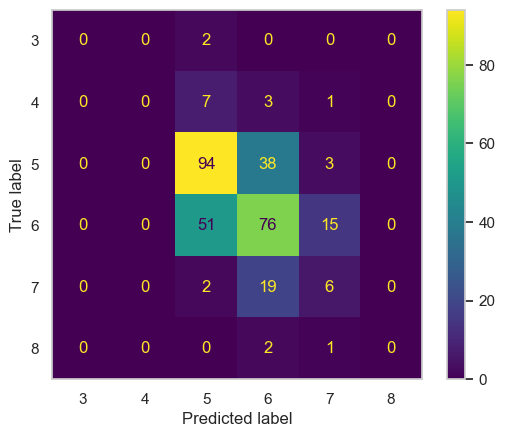

Accuracy SGD Classifier on red training is: 0.5582486317435497
Accuracy of SGD Classifier on red test data is: 0.56875


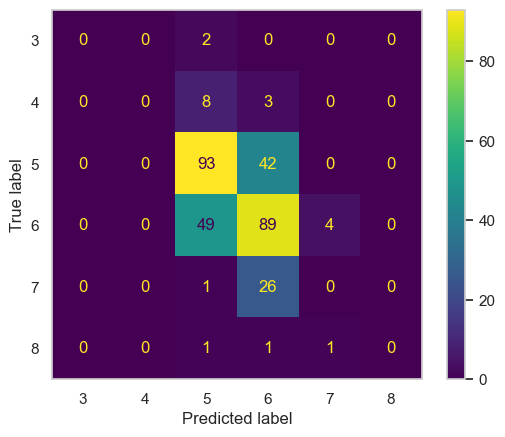

Accuracy SGD Classifier on red training is: 0.5465207193119624
Accuracy of SGD Classifier on red test data is: 0.55625


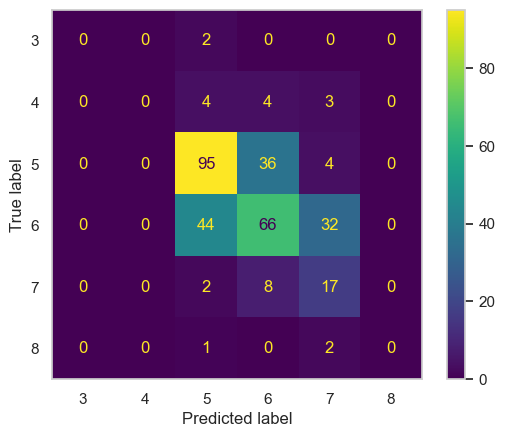

Accuracy SGD Classifier on red training is: 0.5926505082095387
Accuracy of SGD Classifier on red test data is: 0.55625


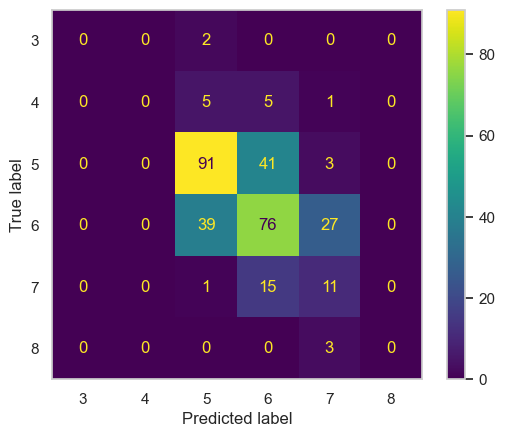

Accuracy SGD Classifier on red training is: 0.5738858483189992
Accuracy of SGD Classifier on red test data is: 0.584375


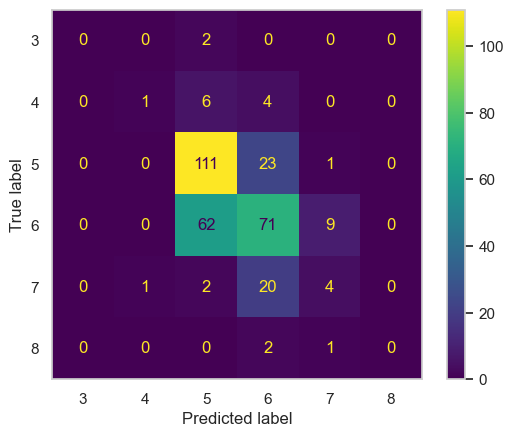

Accuracy SGD Classifier on red training is: 0.5222830336200156
Accuracy of SGD Classifier on red test data is: 0.471875


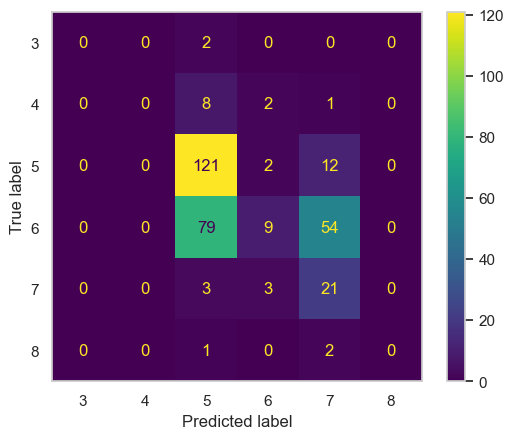

Accuracy SGD Classifier on red training is: 0.38076622361219703
Accuracy of SGD Classifier on red test data is: 0.31875


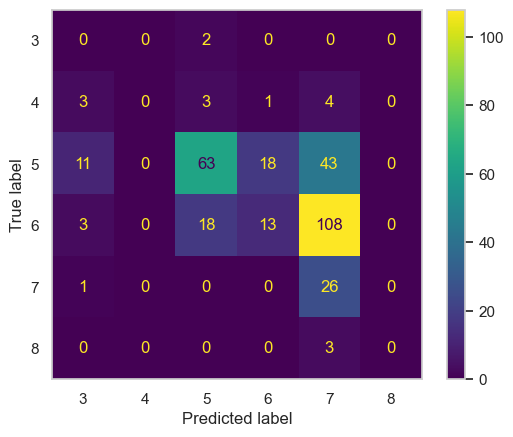

Accuracy SGD Classifier on red training is: 0.508209538702111
Accuracy of SGD Classifier on red test data is: 0.521875


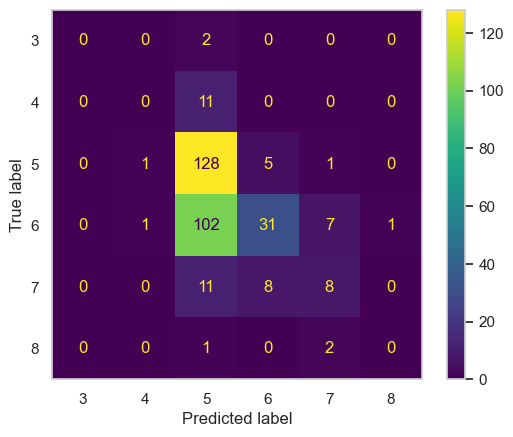

Accuracy SGD Classifier on red training is: 0.5003909304143862
Accuracy of SGD Classifier on red test data is: 0.45625


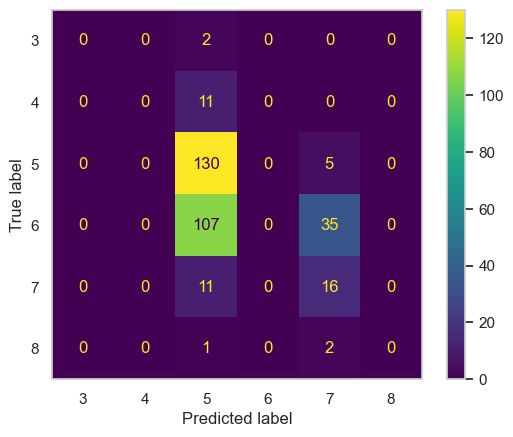

Accuracy SGD Classifier on red training is: 0.4847537138389367
Accuracy of SGD Classifier on red test data is: 0.521875


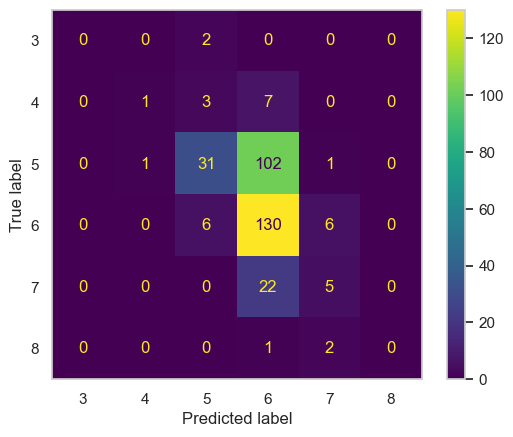

Accuracy SGD Classifier on red training is: 0.5418295543393276
Accuracy of SGD Classifier on red test data is: 0.525


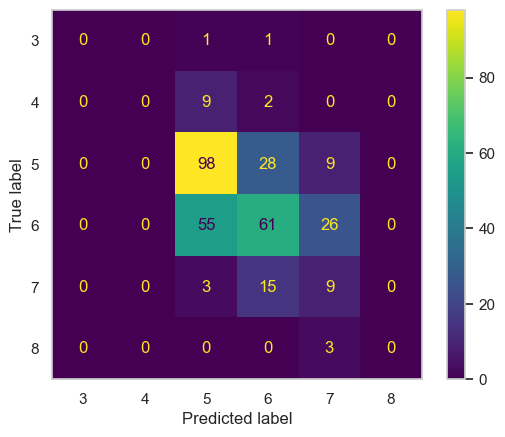

Accuracy SGD Classifier on red training is: 0.5762314308053167
Accuracy of SGD Classifier on red test data is: 0.559375


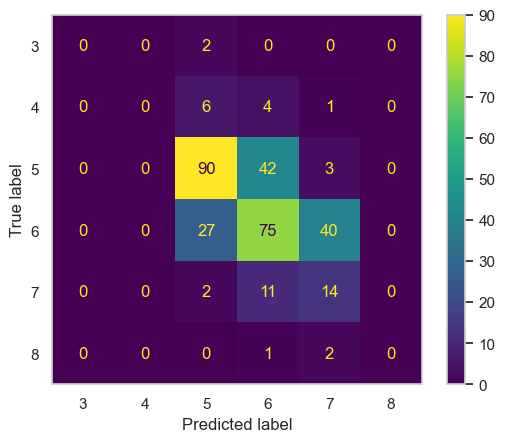

Accuracy SGD Classifier on red training is: 0.5496481626270524
Accuracy of SGD Classifier on red test data is: 0.621875


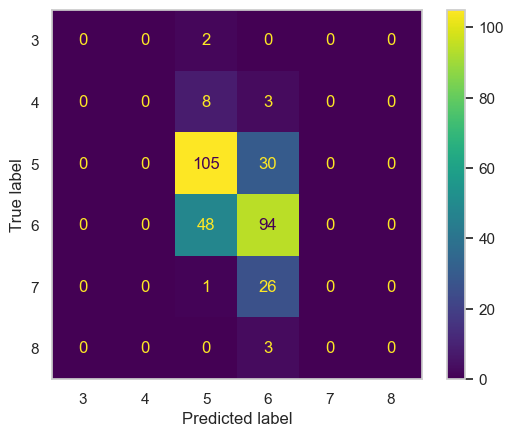

Accuracy SGD Classifier on red training is: 0.5684128225175918
Accuracy of SGD Classifier on red test data is: 0.571875


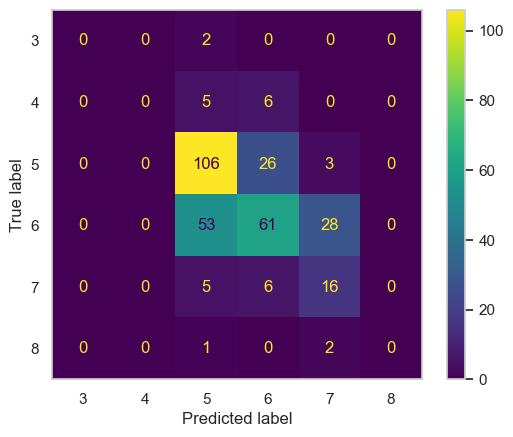

Accuracy SGD Classifier on red training is: 0.5949960906958561
Accuracy of SGD Classifier on red test data is: 0.58125


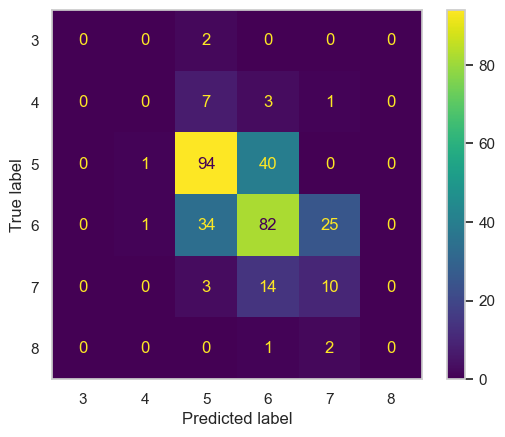

In [743]:
for i in range(5): 
    sgd(redwinedata, redwinelabels, "red", "none")
for i in range(5): 
    sgd(scaledred, redwinelabels, "red", "standard")
for i in range(5): 
    sgd(logscalered, redwinelabels, "red", "log")
for i in range(5): 
    sgd(logscalereddf, redwinelabels, "red", "logstd")

Accuracy MLP NN Classifier on white training is: 0.4675855028075549
Accuracy of MLP NN Classifier on white test data is: 0.41836734693877553


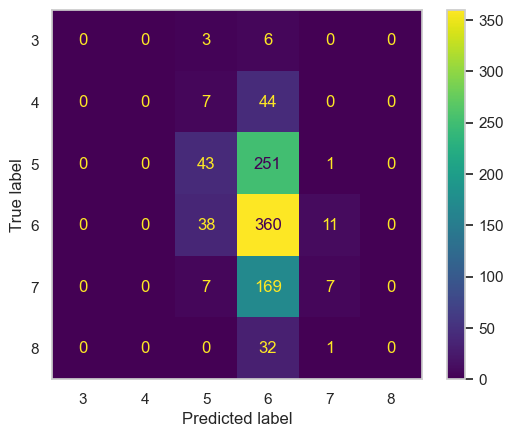

Accuracy MLP NN Classifier on white training is: 0.4905564063297601
Accuracy of MLP NN Classifier on white test data is: 0.44693877551020406


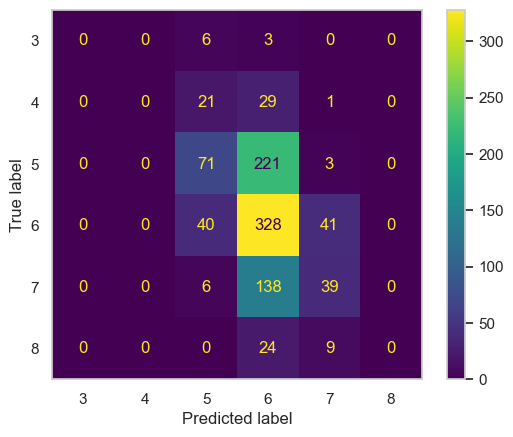

Accuracy MLP NN Classifier on white training is: 0.4880040837161817
Accuracy of MLP NN Classifier on white test data is: 0.4275510204081633


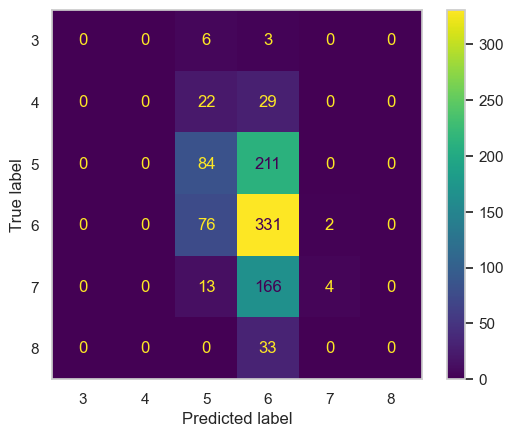

Accuracy MLP NN Classifier on white training is: 0.484430832057172
Accuracy of MLP NN Classifier on white test data is: 0.4459183673469388


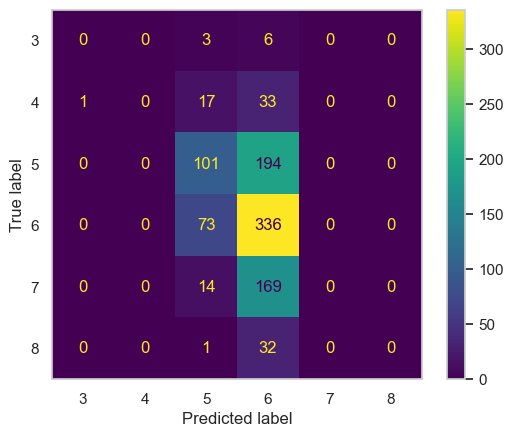

Accuracy MLP NN Classifier on white training is: 0.482899438489025
Accuracy of MLP NN Classifier on white test data is: 0.4377551020408163


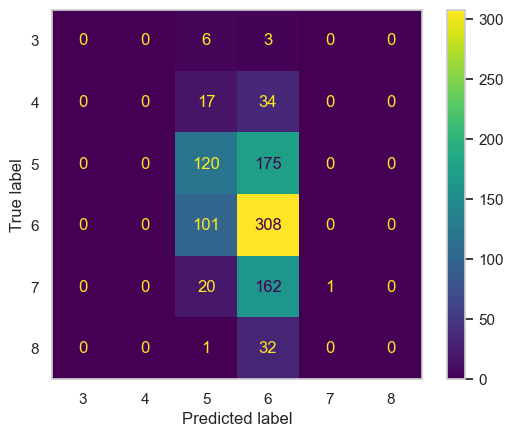

Accuracy MLP NN Classifier on white training is: 0.5834609494640123
Accuracy of MLP NN Classifier on white test data is: 0.5204081632653061


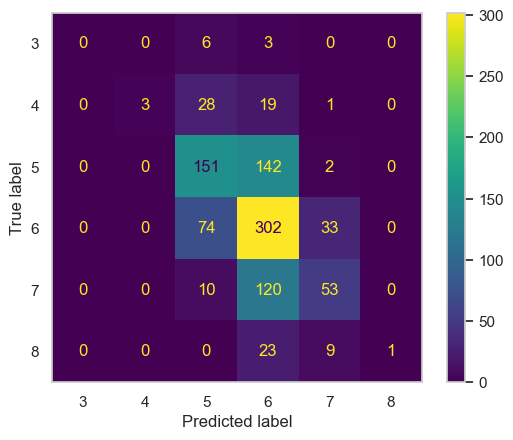

Accuracy MLP NN Classifier on white training is: 0.5655946911689638
Accuracy of MLP NN Classifier on white test data is: 0.513265306122449


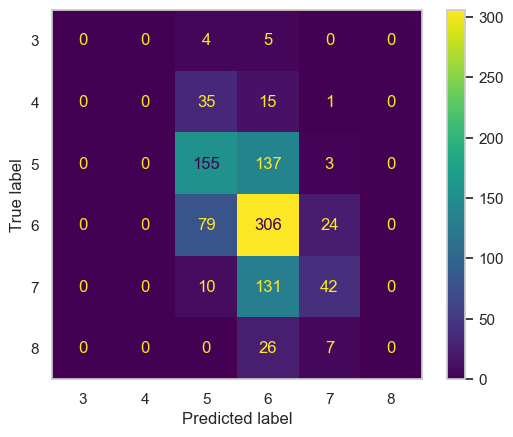

Accuracy MLP NN Classifier on white training is: 0.5632976008167432
Accuracy of MLP NN Classifier on white test data is: 0.5244897959183673


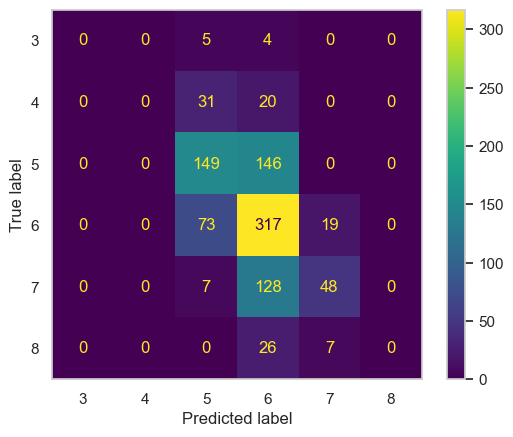

Accuracy MLP NN Classifier on white training is: 0.5934150076569679
Accuracy of MLP NN Classifier on white test data is: 0.5336734693877551


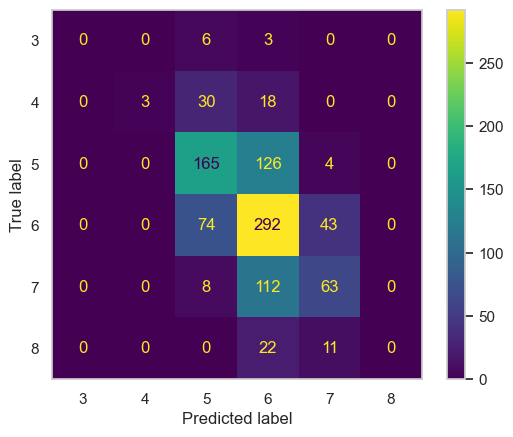

Accuracy MLP NN Classifier on white training is: 0.5967330270546197
Accuracy of MLP NN Classifier on white test data is: 0.5408163265306123


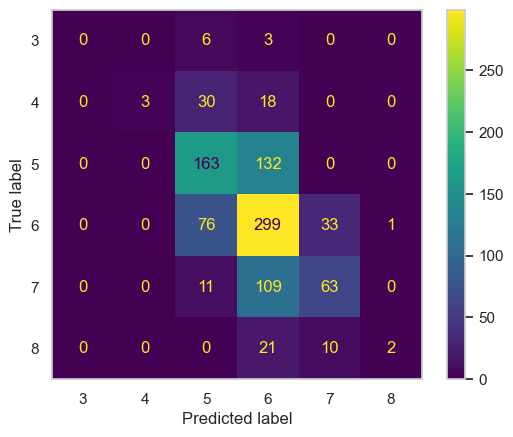

Accuracy MLP NN Classifier on white training is: 0.498468606431853
Accuracy of MLP NN Classifier on white test data is: 0.46938775510204084


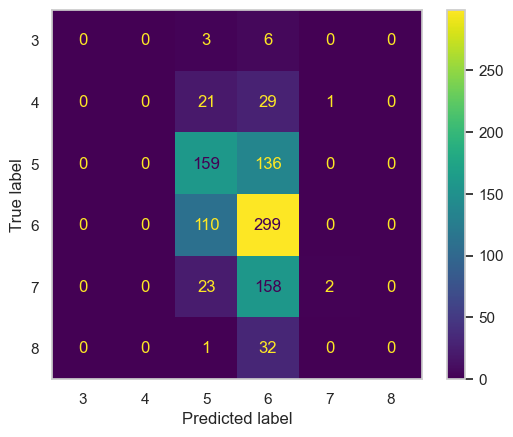

Accuracy MLP NN Classifier on white training is: 0.5165900969882593
Accuracy of MLP NN Classifier on white test data is: 0.47653061224489796


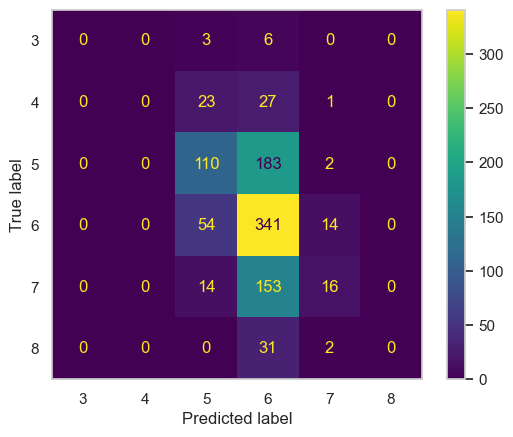

Accuracy MLP NN Classifier on white training is: 0.4946401225114854
Accuracy of MLP NN Classifier on white test data is: 0.45


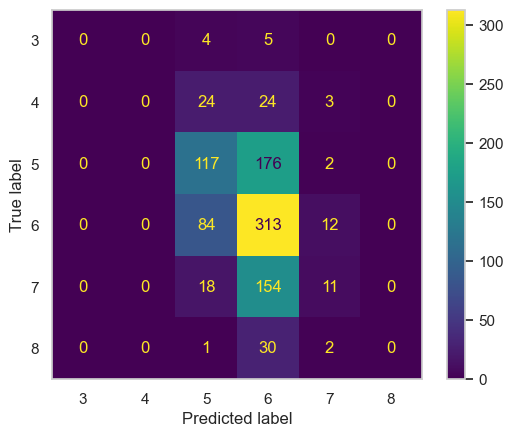

Accuracy MLP NN Classifier on white training is: 0.5454313425216948
Accuracy of MLP NN Classifier on white test data is: 0.503061224489796


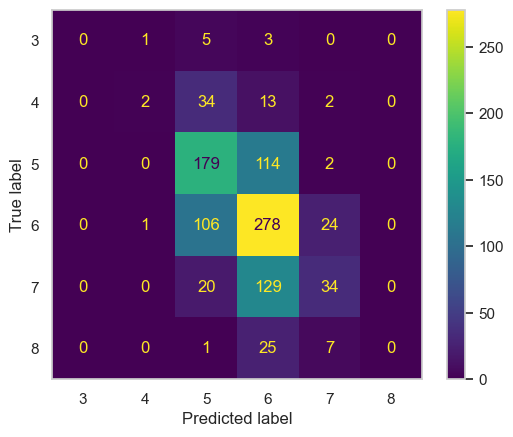

Accuracy MLP NN Classifier on white training is: 0.5168453292496171
Accuracy of MLP NN Classifier on white test data is: 0.4897959183673469


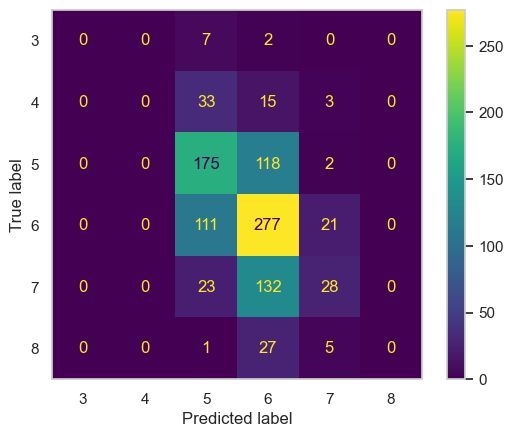

Accuracy MLP NN Classifier on white training is: 0.541858090862685
Accuracy of MLP NN Classifier on white test data is: 0.49489795918367346


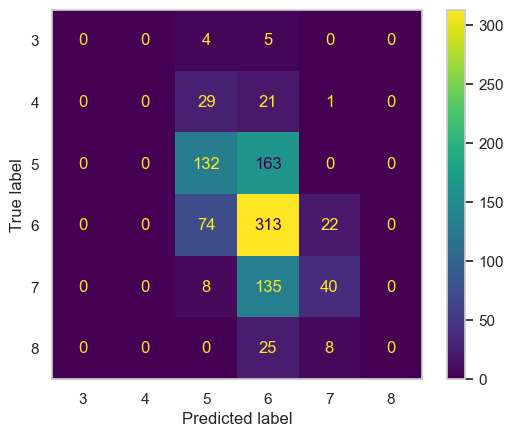

Accuracy MLP NN Classifier on white training is: 0.5735068912710567
Accuracy of MLP NN Classifier on white test data is: 0.5163265306122449


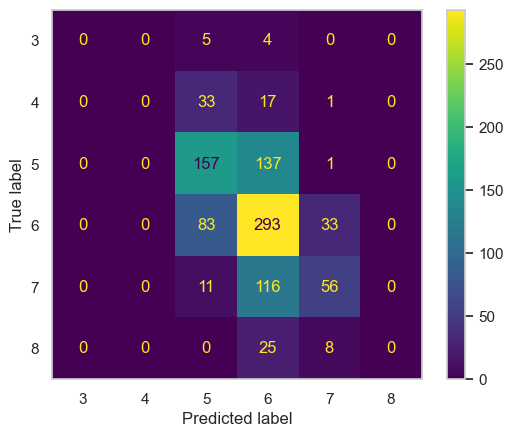

Accuracy MLP NN Classifier on white training is: 0.5842266462480857
Accuracy of MLP NN Classifier on white test data is: 0.5265306122448979


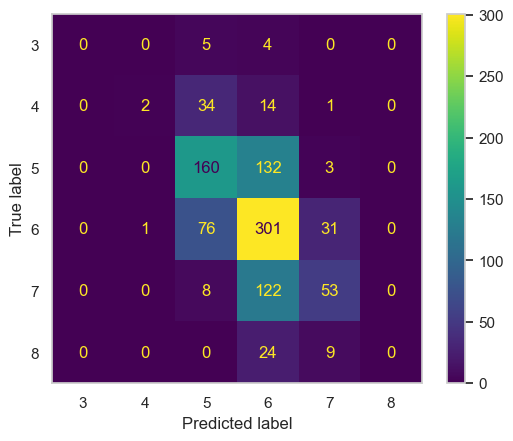

Accuracy MLP NN Classifier on white training is: 0.599540581929556
Accuracy of MLP NN Classifier on white test data is: 0.539795918367347


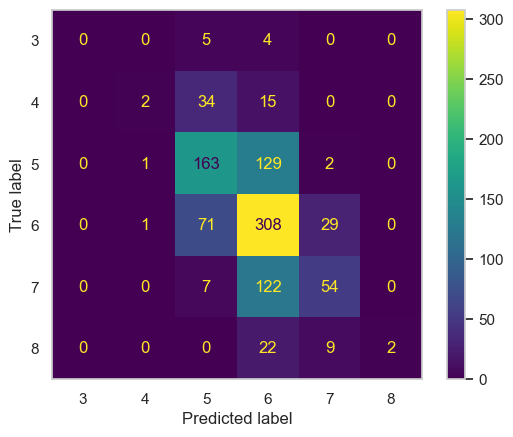

Accuracy MLP NN Classifier on white training is: 0.5982644206227667
Accuracy of MLP NN Classifier on white test data is: 0.5336734693877551


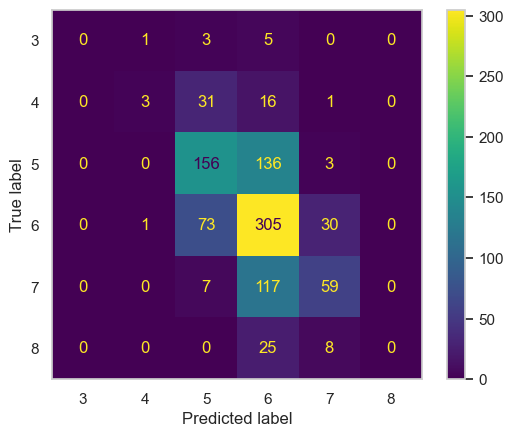

In [744]:
for i in range(5): 
    mlp(whitewinedata, whitewinelabels, "white", "none")
for i in range(5): 
    mlp(scaledwhite, whitewinelabels, "white", "standard")
for i in range(5): 
    mlp(logscalewhite, whitewinelabels, "white", "log")
for i in range(5): 
    mlp(logscalewhitedf, whitewinelabels, "white", "logstd")

Accuracy MLP NN Classifier on red training is: 0.48631743549648165
Accuracy of MLP NN Classifier on red test data is: 0.534375


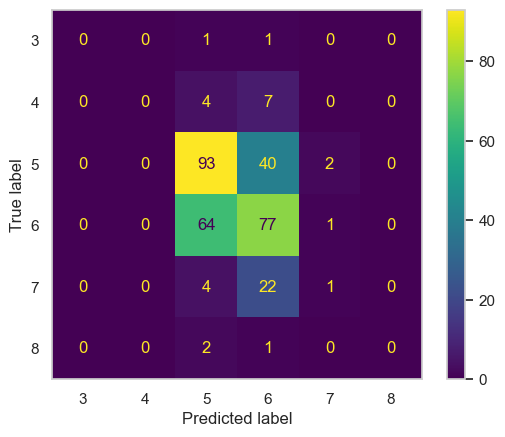

Accuracy MLP NN Classifier on red training is: 0.5027365129007036
Accuracy of MLP NN Classifier on red test data is: 0.525


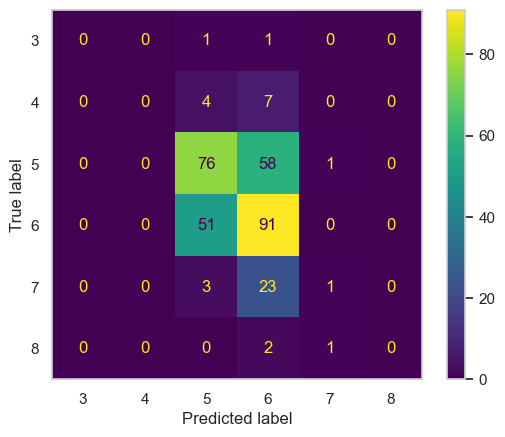

Accuracy MLP NN Classifier on red training is: 0.4769351055512119
Accuracy of MLP NN Classifier on red test data is: 0.478125


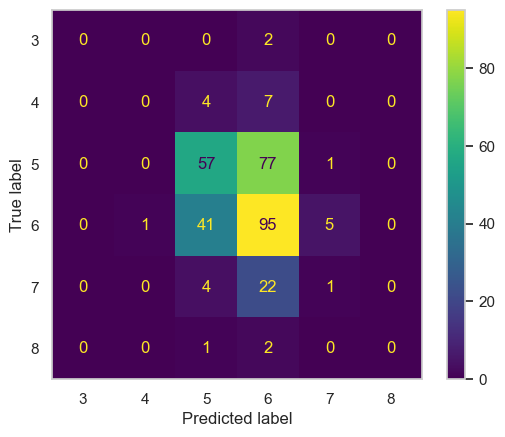

Accuracy MLP NN Classifier on red training is: 0.4941360437842064
Accuracy of MLP NN Classifier on red test data is: 0.521875


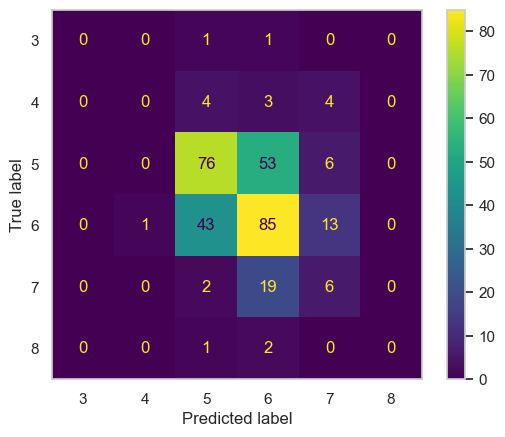

Accuracy MLP NN Classifier on red training is: 0.44566067240031276
Accuracy of MLP NN Classifier on red test data is: 0.4625


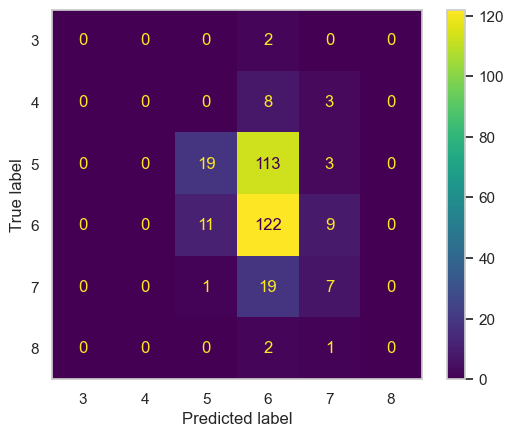

Accuracy MLP NN Classifier on red training is: 0.6098514464425332
Accuracy of MLP NN Classifier on red test data is: 0.609375


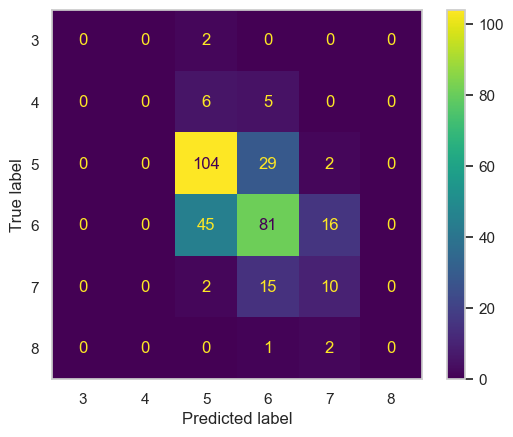

Accuracy MLP NN Classifier on red training is: 0.5684128225175918
Accuracy of MLP NN Classifier on red test data is: 0.584375


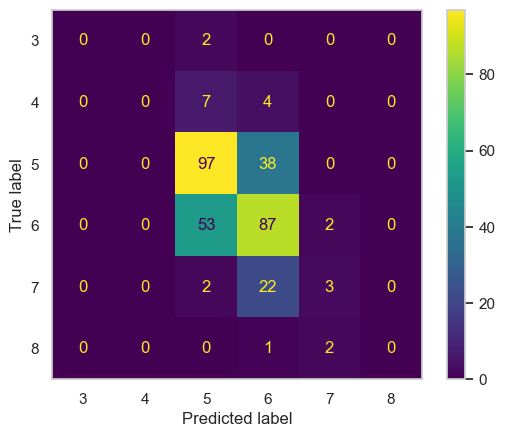

Accuracy MLP NN Classifier on red training is: 0.6168881939014855
Accuracy of MLP NN Classifier on red test data is: 0.625


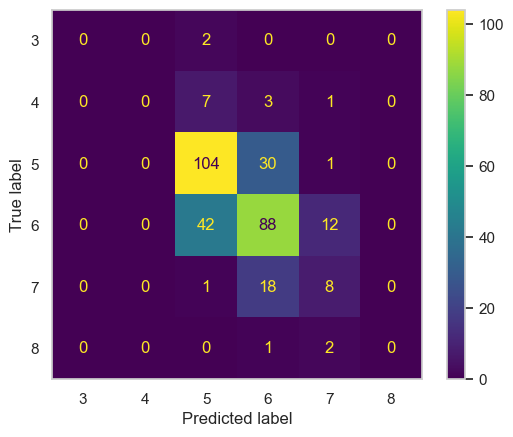

Accuracy MLP NN Classifier on red training is: 0.5785770132916341
Accuracy of MLP NN Classifier on red test data is: 0.609375


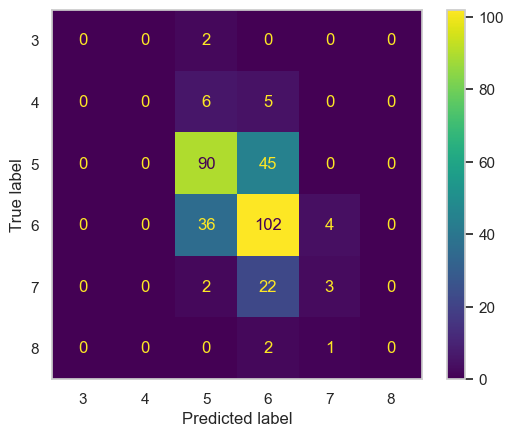

Accuracy MLP NN Classifier on red training is: 0.5910867865519938
Accuracy of MLP NN Classifier on red test data is: 0.5875


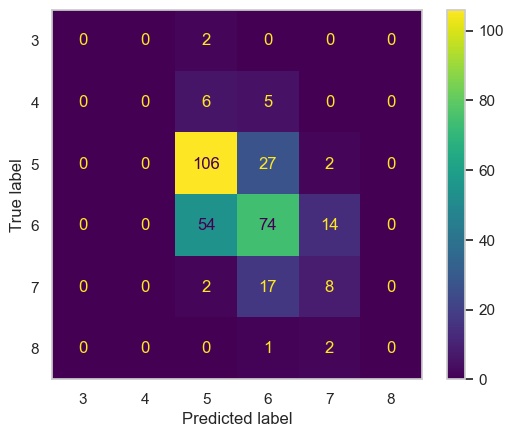

Accuracy MLP NN Classifier on red training is: 0.5496481626270524
Accuracy of MLP NN Classifier on red test data is: 0.578125


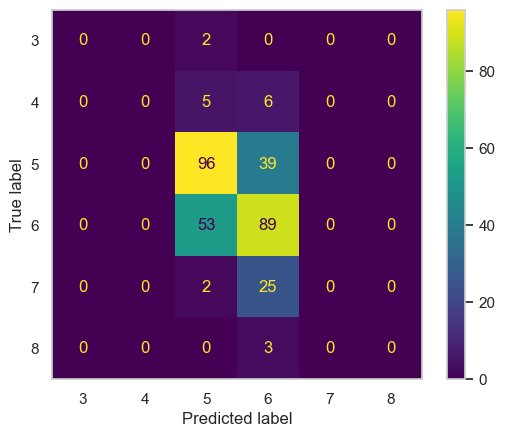

Accuracy MLP NN Classifier on red training is: 0.5269741985926505
Accuracy of MLP NN Classifier on red test data is: 0.553125


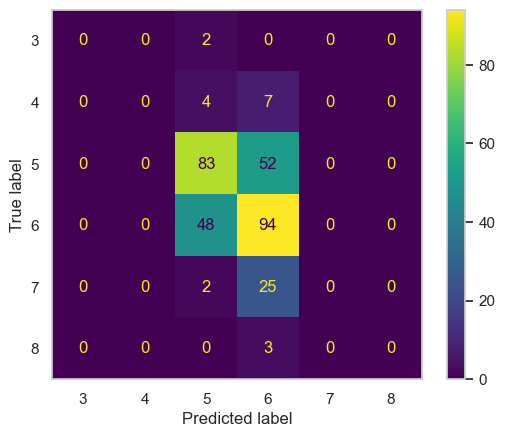

Accuracy MLP NN Classifier on red training is: 0.5003909304143862
Accuracy of MLP NN Classifier on red test data is: 0.515625


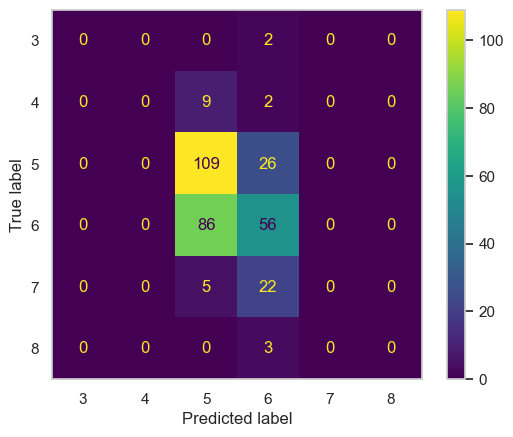

Accuracy MLP NN Classifier on red training is: 0.5215011727912432
Accuracy of MLP NN Classifier on red test data is: 0.540625


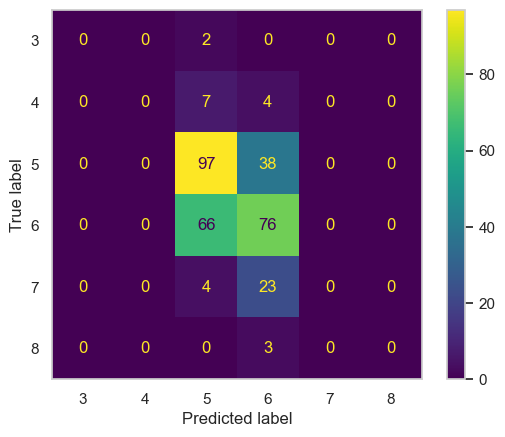

Accuracy MLP NN Classifier on red training is: 0.5605942142298671
Accuracy of MLP NN Classifier on red test data is: 0.596875


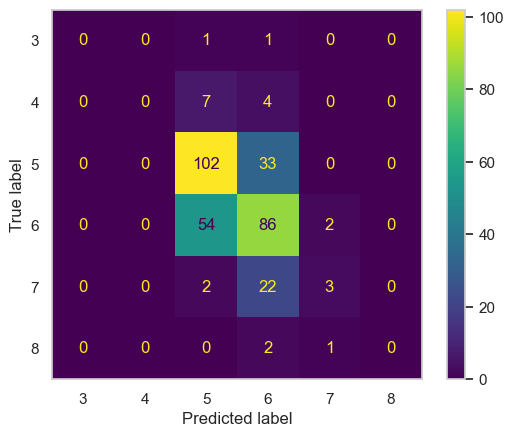

Accuracy MLP NN Classifier on red training is: 0.5488663017982799
Accuracy of MLP NN Classifier on red test data is: 0.58125


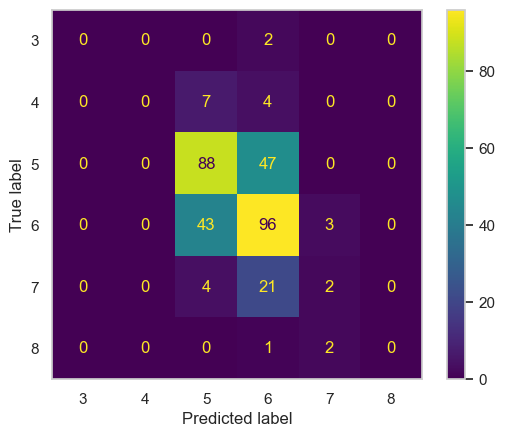

Accuracy MLP NN Classifier on red training is: 0.6215793588741204
Accuracy of MLP NN Classifier on red test data is: 0.603125


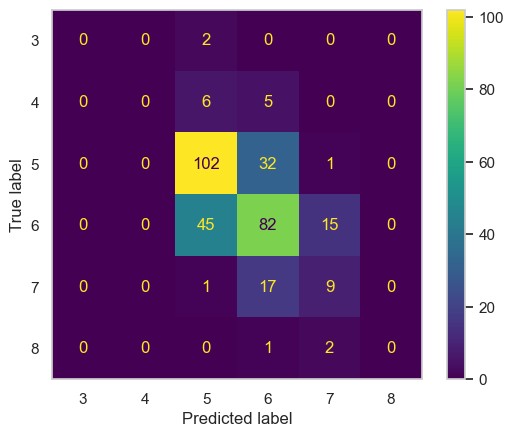

Accuracy MLP NN Classifier on red training is: 0.5801407349491791
Accuracy of MLP NN Classifier on red test data is: 0.5875


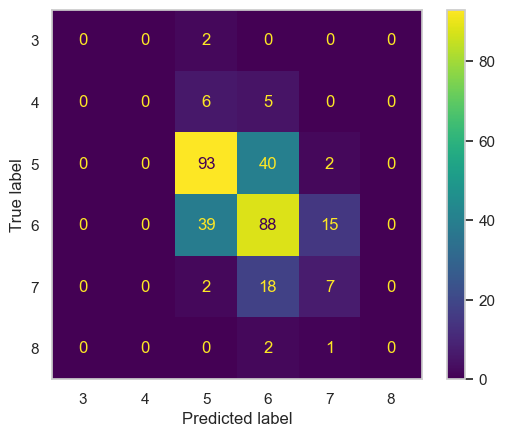

Accuracy MLP NN Classifier on red training is: 0.6043784206411259
Accuracy of MLP NN Classifier on red test data is: 0.615625


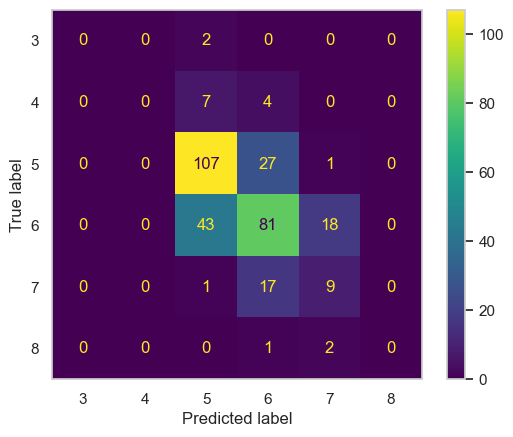

Accuracy MLP NN Classifier on red training is: 0.6145426114151681
Accuracy of MLP NN Classifier on red test data is: 0.6125


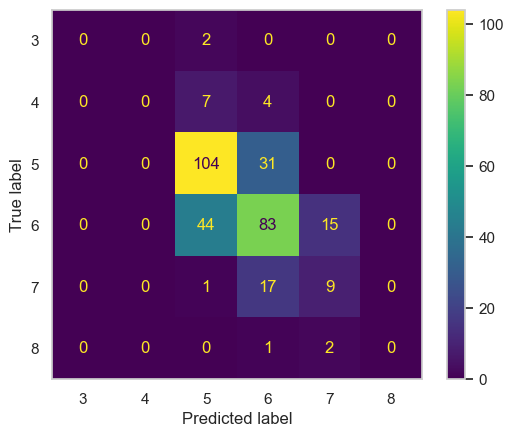

In [745]:
for i in range(5): 
    mlp(redwinedata, redwinelabels, "red", "none")
for i in range(5): 
    mlp(scaledred, redwinelabels, "red", "standard")
for i in range(5): 
    mlp(logscalered, redwinelabels, "red", "log")
for i in range(5): 
    mlp(logscalereddf, redwinelabels, "red", "logstd")

In [746]:
#Define a function to give us a list of scores specific to one model
def splitscores(model):
    score = performance_scores[performance_scores['Model_Type']== model]
    return scores

#Define a function to give us a list of scores specific to one model and winetype
def splitscoreswine(model, winetype):
    modelscore = performance_scores[performance_scores['Model_Type']== model]
    scores = modelscore[modelscore['Wine_Type'] == winetype]
    return scores

def splitscoresdat(model, winetype, dat):
    modelscore = performance_scores[performance_scores['Model_Type']== model]
    datamodscore = modelscore[modelscore['Data_Scale'] == dat]
    scores = datamodscore[datamodscore['Wine_Type'] == winetype]
    return scores

def getaves():
    aves = average_scores[average_scores['Data_Scale'] == 'average']
    return aves
    

In [755]:
average_scores = pd.DataFrame(columns=['Model_Type',
                                           'Wine_Type', 
                                           'Training_Score', 
                                           'Test_Score',
                                           'Data_Scale'])
best_scores = pd.DataFrame(columns=['Model_Type',       
                                    'Wine_Type',
                                    'Training_Score',
                                    'Test_Score',
                                    'Data_Scale'])

In [756]:
performance_scores.iloc[105:120,:]

Model_Type Wine_Type  Training_Score  Test_Score Data_Scale
105  Polynomial SVC       red        0.741204    0.628125   standard
106  Polynomial SVC       red        0.741204    0.628125   standard
107  Polynomial SVC       red        0.741204    0.628125   standard
108  Polynomial SVC       red        0.741204    0.628125   standard
109  Polynomial SVC       red        0.741204    0.628125   standard
110  Polynomial SVC       red        0.588741    0.621875        log
111  Polynomial SVC       red        0.588741    0.621875        log
112  Polynomial SVC       red        0.588741    0.621875        log
113  Polynomial SVC       red        0.588741    0.621875        log
114  Polynomial SVC       red        0.588741    0.621875        log
115  Polynomial SVC       red        0.764660    0.618750     logstd
116  Polynomial SVC       red        0.764660    0.618750     logstd
117  Polynomial SVC       red        0.764660    0.618750     logstd
118  Polynomial SVC       red        0.764660    0.618750     logstd
119  Polynomial SVC       red        0.764660    0.618750     logstd

In [757]:
def makeaverages():
    for model in 'Random Forest', 'Linear SVC', 'Polynomial SVC', 'K-Nearest Neighbor', 'SGD Classifier', 'MultiLayer Perceptron':
        for winetype in 'red','white':
            for dattype in 'none','standard','log','logstd':
                avetrainscore = splitscoresdat(model,winetype,dattype).loc[:, 'Training_Score'].mean()
                avetestscore = splitscoresdat(model,winetype,dattype).loc[:, 'Test_Score'].mean()
                #import ave scores into dataframe
                average_scores.loc[len(average_scores)] = [model, winetype, avetrainscore, avetestscore, dattype]
            datavetrain=splitscoreswine(model,winetype).loc[:, 'Training_Score'].mean()
            datavetest=splitscoreswine(model,winetype).loc[:, 'Test_Score'].mean()
            average_scores.loc[len(average_scores)] = [model, winetype, datavetrain, datavetest, 'average']


In [758]:
def getbest():
    for model in 'Random Forest', 'Linear SVC', 'Polynomial SVC', 'K-Nearest Neighbor', 'SGD Classifier', 'MultiLayer Perceptron':
        for winetype in 'red','white':
            for dattype in 'none','standard','log','logstd':
                best = splitscoreswine(model,winetype).loc[:, 'Test_Score'].idxmax()
                #import ave scores into dataframe
            best_scores.loc[len(best_scores)] = performance_scores.iloc[best]
    return best_scores

In [759]:
makeaverages()

In [760]:
display(average_scores)

Model_Type Wine_Type  Training_Score  Test_Score Data_Scale
0           Random Forest       red        1.000000    0.724375       none
1           Random Forest       red        1.000000    0.715625   standard
2           Random Forest       red        1.000000    0.720000        log
3           Random Forest       red        1.000000    0.720000     logstd
4           Random Forest       red        1.000000    0.720000    average
5           Random Forest     white        1.000000    0.651633       none
6           Random Forest     white        1.000000    0.656735   standard
7           Random Forest     white        0.999949    0.654082        log
8           Random Forest     white        1.000000    0.652041     logstd
9           Random Forest     white        0.999987    0.653622    average
10             Linear SVC       red        0.580141    0.628125       none
11             Linear SVC       red        0.587177    0.631250   standard
12             Linear SVC       red        0.593432    0.631250        log
13             Linear SVC       red        0.591869    0.625000     logstd
14             Linear SVC       red        0.588155    0.628906    average
15             Linear SVC     white        0.538030    0.491837       none
16             Linear SVC     white        0.537264    0.493878   standard
17             Linear SVC     white        0.534967    0.493878        log
18             Linear SVC     white        0.535733    0.494898     logstd
19             Linear SVC     white        0.536498    0.493622    average
20         Polynomial SVC       red        0.509773    0.528125       none
21         Polynomial SVC       red        0.741204    0.628125   standard
22         Polynomial SVC       red        0.588741    0.621875        log
23         Polynomial SVC       red        0.764660    0.618750     logstd
24         Polynomial SVC       red        0.651095    0.599219    average
25         Polynomial SVC     white        0.465033    0.431633       none
26         Polynomial SVC     white        0.631445    0.522449   standard
27         Polynomial SVC     white        0.539051    0.488776        log
28         Polynomial SVC     white        0.640633    0.502041     logstd
29         Polynomial SVC     white        0.569040    0.486224    average
30     K-Nearest Neighbor       red        1.000000    0.599681       none
31     K-Nearest Neighbor       red        1.000000    0.675000   standard
32     K-Nearest Neighbor       red        1.000000    0.696875        log
33     K-Nearest Neighbor       red        1.000000    0.671875     logstd
34     K-Nearest Neighbor       red        1.000000    0.648622    average
35     K-Nearest Neighbor     white             NaN         NaN       none
36     K-Nearest Neighbor     white        1.000000    0.641837   standard
37     K-Nearest Neighbor     white        1.000000    0.604082        log
38     K-Nearest Neighbor     white        1.000000    0.635714     logstd
39     K-Nearest Neighbor     white        1.000000    0.627211    average
40         SGD Classifier       red        0.469742    0.474375       none
41         SGD Classifier       red        0.563409    0.563125   standard
42         SGD Classifier       red        0.479281    0.458125        log
43         SGD Classifier       red        0.566224    0.571875     logstd
44         SGD Classifier       red        0.519664    0.516875    average
45         SGD Classifier     white        0.395814    0.393061       none
46         SGD Classifier     white        0.530168    0.491429   standard
47         SGD Classifier     white        0.469168    0.444694        log
48         SGD Classifier     white        0.506228    0.481224     logstd
49         SGD Classifier     white        0.475345    0.452602    average
50  MultiLayer Perceptron       red        0.481157    0.504375       none
51  MultiLayer Perceptron       red        0.592963    0.603125   standard
52  MultiLayer Perceptron       red     

In [761]:
display(getaves())

Model_Type Wine_Type  Training_Score  Test_Score Data_Scale
4           Random Forest       red        1.000000    0.720000    average
9           Random Forest     white        0.999987    0.653622    average
14             Linear SVC       red        0.588155    0.628906    average
19             Linear SVC     white        0.536498    0.493622    average
24         Polynomial SVC       red        0.651095    0.599219    average
29         Polynomial SVC     white        0.569040    0.486224    average
34     K-Nearest Neighbor       red        1.000000    0.648622    average
39     K-Nearest Neighbor     white        1.000000    0.627211    average
44         SGD Classifier       red        0.519664    0.516875    average
49         SGD Classifier     white        0.475345    0.452602    average
54  MultiLayer Perceptron       red        0.549961    0.566094    average
59  MultiLayer Perceptron     white        0.539267    0.490459    average

In [713]:
display(getbest())

Model_Type Wine_Type Training_Score Test_Score Data_Scale
0           Random Forest       red            1.0    0.74375   standard
1           Random Forest     white            1.0   0.666327        log
2              Linear SVC       red       0.587177    0.63125   standard
3              Linear SVC     white       0.535733   0.494898     logstd
4          Polynomial SVC       red       0.741204   0.628125   standard
5          Polynomial SVC     white       0.631445   0.522449   standard
6      K-Nearest Neighbor       red            1.0   0.696875        log
7      K-Nearest Neighbor     white            1.0   0.641837   standard
8          SGD Classifier       red       0.582486    0.61875        log
9          SGD Classifier     white       0.531138   0.508163     logstd
10  MultiLayer Perceptron       red        0.59656     0.6375   standard
11  MultiLayer Perceptron     white        0.59367   0.539796   standard

In [762]:
#Report:  
PDF('Exercise3.pdf',size=(800,1200))